In [1]:
import pandas as pd
from pandas import DataFrame as df
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import wntr as wn
import networkx as nx
from collections import defaultdict
import tensorflow as tf
import math

in2_ft2 = 0.0005787

In [2]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

In [3]:
#toplevelpath = "/Users/kavyaub/Documents/mySubjects/ConEdison"
toplevelpath = "/Users/aya/Documents/code-pfs/gas-nx"

all_datadir = "/NYU_LeakData"

def ask_user_path(pathinput, datadirinput):
    ask_user_path_text = 'FilePath for Data is: ' + pathinput + datadirinput + ' OK? y / n '
    response = 'y'
    user_inputYN = input(ask_user_path_text)
    if user_inputYN.lower() not in response:
        new_input = 'PASTE FULL PATH TO YOUR DATA DIRECTORY HERE: '
        newpath = input(new_input)
        return newpath
    elif user_inputYN in response:
        response2 = pathinput + datadirinput
        return response2

#datadirpath = ask_user_path(toplevelpath, all_datadir)
get_file_datadirpath = ask_user_path(toplevelpath, all_datadir)


FilePath for Data is: /Users/aya/Documents/code-pfs/gas-nx/NYU_LeakData OK? y / n 


In [4]:

anomalyFreeNode = toplevelpath + all_datadir + "/LeakData_ZeroDegrees/NYU Anamoly Data_ZeroDeg_Nodes.csv"
nodeArr=pd.read_csv(anomalyFreeNode)

anomalyFree = toplevelpath + all_datadir + "/LeakData_ZeroDegrees/NYU Anamoly Data_ZeroDeg_Pipes.csv"
nFile0=pd.read_csv(anomalyFree)

anomaly = toplevelpath + all_datadir + "/LeakData_ZeroDegrees/NYU Anamoly Data_ZeroDeg_Pipes_Leak1.csv"
nFile1=pd.read_csv(anomaly)


/Users/aya/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (105) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
def get_file(name):
    anomaly = get_file_datadirpath+name
    nFile=pd.read_csv(anomaly)
    return nFile

In [6]:
def flowDeviation_vel(file0, file1):
    res_arr = file1
    res_arr['VELOpipeFPS']= file1.VELOpipeFPS
    dividend = max(file0['VELOpipeFPS'])
    res_arr.VELOpipeFPS = abs(res_arr.VELOpipeFPS.subtract(file0.VELOpipeFPS))/dividend
    return res_arr

In [7]:
preDir = "/ReducedNodeSet/"
name500="CECnodes_500_TableToExcel"
filetype = ".csv"
nodes500 = get_file(preDir+name500+filetype)

In [8]:
preDir = "/ReducedNodeSet/"
name200="CECnodes_200_TableToExcel"
filetype = ".csv"
nodes200 = get_file(preDir+name200+filetype)

In [9]:
def calculations(input_arr):
    final_temp_arr = np.array([input_arr['NAME'],input_arr['FacilityFromNodeName'],input_arr['FacilityToNodeName'],input_arr['NAME'],[0]*input_arr.NAME.size,[0]*input_arr.NAME.size,[0]*input_arr.NAME.size,[0]*input_arr.NAME.size,[0]*input_arr.NAME.size,[0]*input_arr.NAME.size])

    anomalyFreeNode = toplevelpath + all_datadir + "/LeakData_ZeroDegrees/NYU Anamoly Data_ZeroDeg_Nodes.csv"
    nodeArr=pd.read_csv(anomalyFreeNode)
    setOfNames = set(nodeArr['NAME'])

    for i in range(0,final_temp_arr[1].size):
        if final_temp_arr[1][i] in setOfNames:
            temp = nodeArr.loc[nodeArr['NAME']==final_temp_arr[1][i]]
            final_temp_arr[4][i]=temp.iloc[0][3]
            final_temp_arr[5][i]=temp.iloc[0][2]
        if final_temp_arr[2][i] in setOfNames:
            temp = nodeArr.loc[nodeArr['NAME']==final_temp_arr[2][i]]
            final_temp_arr[6][i]=temp.iloc[0][3]
            final_temp_arr[7][i]=temp.iloc[0][2]
            
    mid_elem_x=(final_temp_arr[4]+final_temp_arr[6])/2.0
    mid_elem_y=(final_temp_arr[5]+final_temp_arr[7])/2.0
    
    final_temp_arr[8]=mid_elem_x
    final_temp_arr[9]=mid_elem_y
    input_arr['mid_point_x']=mid_elem_x
    input_arr['mid_point_y']=mid_elem_y

In [10]:
def reducer(input_arr):
    
    unique_nodes = nodes200.NAME.unique()
    reduced_nodeArr = input_arr[input_arr.FacilityFromNodeName.isin(unique_nodes)]
    reduced_nodeArr1 = input_arr[input_arr.FacilityToNodeName.isin(unique_nodes)]
    
    reduced_nodeArr.reset_index(inplace = True, drop = True)
    reduced_nodeArr1.reset_index(inplace = True, drop = True)

    df=pd.merge(reduced_nodeArr,reduced_nodeArr1)
    df_new=df.drop_duplicates()
    return df_new
    

In [199]:
anomlay0_500

,NAME,TYPE,PipeWallThickness,PipeAutomatedDesignTotalCost,FacilityToNodePressureSegmentName,FacilityToNodePressure,FacilityToNodeName,FacilityThermalFlow,PipeTemperature,FacilitySymbolName,...,PipeThermalLayerNumber(0),PipeThermalLayerNumber(1),PipeThermalLayerNumber(2),PipeThermalLayerNumber(3),PipeThermalLayerThickness(0),PipeThermalLayerThickness(1),PipeThermalLayerThickness(2),PipeThermalLayerThickness(3),AREApipeFT2,VELOpipeFPS
0,2FBDEBD9,Pipes,NaN,0.0,NaN,6.863069,0BEC4F6E,0.053652,40.0,Default Pipe,...,1.0,2.0,3.0,4.0,NaN,NaN,NaN,NaN,0.0133568,46.4912
1,2FBDEBDF,Pipes,NaN,0.0,NaN,6.875233,0BEC4F6D,0.053652,40.0,Default Pipe,...,1.0,2.0,3.0,4.0,NaN,NaN,NaN,NaN,0.0133568,46.4912
2,0BF5ADF2,Pipes,NaN,0.0,NaN,6.881170,0BEC4F6C,0.047578,40.0,Default Pipe,...,1.0,2.0,3.0,4.0,NaN,NaN,NaN,NaN,0.0133568,41.2279
3,2FBE4ABC,Pipes,NaN,0.0,NaN,6.926879,0BEC4F68,0.034738,40.0,Default Pipe,...,1.0,2.0,3.0,4.0,NaN,NaN,NaN,NaN,0.0133568,30.1022
4,0BF5ADE8,Pipes,NaN,0.0,NaN,6.962416,0BEC4F88,-0.013155,40.0,Default Pipe,...,1.0,2.0,3.0,4.0,NaN,NaN,NaN,NaN,0.0133568,11.3994
5,0BF5B2A3,Pipes,NaN,0.0,NaN,6.933998,0BEC4FA2,-0.018954,40.0,Default Pipe,...,1.0,2.0,3.0,4.0,NaN,NaN,NaN,NaN,0.007367,29.7793
6,0BF5B2AA,Pipes,NaN,0.0,NaN,6.998068,0BEC4FA7,0.012747,40.0,Default Pipe,...,1.0,2.0,3.0,4.0,NaN,NaN,NaN,NaN,0.007367,20.0273
7,0BF5B2AB,Pipes,NaN,0.0,NaN,6.996526,0BEC4FA8,0.012030,40.0,Default Pipe,...,1.0,2.0,3.0,4.0,NaN,NaN,NaN,NaN,0.007367,18.9011
8,0BF5B291,Pipes,NaN,0.0,NaN,6.988172,0BEC4F8E,-0.015033,40.0,Default Pipe,...,1.0,2.0,3.0,4.0,NaN,NaN,NaN,NaN,0.007367,23.6191
9,0BF5B2AC,Pipes,NaN,0.0,NaN,6.988561,0BEC4F8F,0.009919,40.0,Default Pipe,...,1.0,2.0,3.0,4.0,NaN,NaN,NaN,NaN,0.007367,15.5837


In [214]:
anomlay0_500=reducer(anomlay0)


In [180]:
ctr=0
temps2=[]
j=0
for i in temp:
    if i not in anomlay0_500.NAME.to_list():
        temps2.append(i)
        ctr+=1


['0BF5ADF6',
 '0BF5B2C1',
 '0BF5B693',
 '0BF5BB7C',
 '0BF5C3FD',
 '0BF5CC00',
 '0BF5ADE9',
 '2FBDA760',
 '2FBD1C54',
 '2FBE4AB8',
 '0BF5B2A9',
 '0BF5B2B2',
 '0BF5B690',
 '0BF5B691',
 '0BF5BB6B',
 '0BF5BB5A',
 '0BF5C08E',
 '0BF5CBF1',
 '0BF5CBF3',
 '0BF5CC06',
 '2FBD9089',
 '2FBDA23C',
 '2FBCC2AA',
 '2FBCAEC0',
 '2FBF39FB',
 '2FC05AB0']

In [19]:
preDir = "/LeakData_ZeroDegrees/"
name0_11="NYU Anamoly Data_ZeroDeg_Pipes_Leak11"
name0_21="NYU Anamoly Data_ZeroDeg_Pipes_Leak21"
name0_31="NYU Anamoly Data_ZeroDeg_Pipes_Leak31"
name0_41="NYU Anamoly Data_ZeroDeg_Pipes_Leak41"
filetype = ".csv"

leak0_11 = get_file(preDir+name0_11+filetype)
leak0_21 = get_file(preDir+name0_21+filetype)
leak0_31 = get_file(preDir+name0_31+filetype)
leak0_41 = get_file(preDir+name0_41+filetype)

In [64]:
setOfNames = set(leak0_41['NAME'])
def pipe_velocity_calc(pipedf):
    final_pipedf = np.array([pipedf['NAME'],pipedf['FacilityFromNodeName'],pipedf['FacilityToNodeName'],pipedf['FacilityFlowAbsolute'],pipedf['PipeDiameter'],[0]*pipedf.NAME.size,[0]*pipedf.NAME.size,[0]*pipedf.NAME.size,[0]*pipedf.NAME.size,[0]*pipedf.NAME.size,[0]*pipedf.NAME.size])

    for i in range(0,final_pipedf[1].size):
        if final_pipedf[0][i] in setOfNames:
            temp = pipedf.loc[pipedf['NAME']==final_pipedf[0][i]]
            final_pipedf[5][i]=temp.iloc[0][90]
            final_pipedf[6][i]=temp.iloc[0][94]

    ## Creating the Velocity Rate Column ##
    elem_AREApipeFT2 = (final_pipedf[6]**2/4*math.pi*in2_ft2)
    elem_VELOpipeFPS = (final_pipedf[5]/elem_AREApipeFT2*1000/3600)
    print(elem_VELOpipeFPS)
    final_pipedf[8] = elem_AREApipeFT2
    final_pipedf[9] = elem_VELOpipeFPS
    pipedf['AREApipeFT2'] = elem_AREApipeFT2
    pipedf['VELOpipeFPS'] = elem_VELOpipeFPS

    return pipedf

In [42]:
preDir = "/LeakData_16Degrees/"
name1="NYU Anamoly Data_16Deg_Pipes_Leak1.csv"
name11="NYU Anamoly Data_16Deg_Pipes_Leak11.csv"
name21="NYU Anamoly Data_16Deg_Pipes_Leak21.csv"
name31="NYU Anamoly Data_16Deg_Pipes_Leak31.csv"
name41="NYU Anamoly Data_16Deg_Pipes_Leak41.csv"

leak1=get_file(preDir+name1)
leak11 = get_file(preDir+name11)
leak21 = get_file(preDir+name21)
leak31 = get_file(preDir+name31)
leak41 = get_file(preDir+name41)

In [43]:
preDir = "/LeakData_32Degrees/"
leakFree32 = "NYU Anamoly Data_32Deg_Nodes.csv"
name32_01="NYU Anamoly Data_32Deg_Pipes_Leak1.csv"
name32_11="NYU Anamoly Data_32Deg_Pipes_Leak11.csv"
name32_21="NYU Anamoly Data_32Deg_Pipes_Leak21.csv"
name32_31="NYU Anamoly Data_32Deg_Pipes_Leak31.csv"
name32_41="NYU Anamoly Data_32Deg_Pipes_Leak41.csv"

leak32_00 = get_file(preDir+leakFree32)
leak32_01 = get_file(preDir+name32_01)
leak32_11 = get_file(preDir+name32_11)
leak32_21 = get_file(preDir+name32_21)
leak32_31 = get_file(preDir+name32_31)
leak32_41 = get_file(preDir+name32_41)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (105) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


In [25]:
preDir = "/LeakData_48Degrees/"
leakFree48 = "NYU Anamoly Data_48Deg_Nodes.csv"
name48_01="NYU Anamoly Data_48Deg_Pipes_Leak1.csv"
name48_11="NYU Anamoly Data_48Deg_Pipes_Leak11.csv"
name48_21="NYU Anamoly Data_48Deg_Pipes_Leak21.csv"
name48_31="NYU Anamoly Data_48Deg_Pipes_Leak31.csv"
name48_41="NYU Anamoly Data_48Deg_Pipes_Leak41.csv"

leak48_00 = get_file(preDir+leakFree48)
leak48_01 = get_file(preDir+name48_01)
leak48_11 = get_file(preDir+name48_11)
leak48_21 = get_file(preDir+name48_21)
leak48_31 = get_file(preDir+name48_31)
leak48_41 = get_file(preDir+name48_41)


In [26]:
preDir = "/LeakData_64Degrees/"
leakFree48 = "NYU Anamoly Data_64Deg_Nodes.csv"
name64_01="NYU Anamoly Data_64Deg_Pipes_Leak1.csv"
name64_11="NYU Anamoly Data_64Deg_Pipes_Leak11.csv"
name64_21="NYU Anamoly Data_64Deg_Pipes_Leak21.csv"
name64_31="NYU Anamoly Data_64Deg_Pipes_Leak31.csv"
name64_41="NYU Anamoly Data_64Deg_Pipes_Leak41.csv"

leak64_00 = get_file(preDir+leakFree48)
leak64_01 = get_file(preDir+name64_01)
leak64_11 = get_file(preDir+name64_11)
leak64_21 = get_file(preDir+name64_21)
leak64_31 = get_file(preDir+name64_31)
leak64_41 = get_file(preDir+name64_41)


In [27]:
# max(an_free.VELOpipeFPS)
# max(anomlay4.VELOpipeFPS)

In [40]:
anomlay4 = pipe_velocity_calc(leak0_41)
an_free = pipe_velocity_calc(nFile0)
#max(anomlay4.VELOpipeFPS-an_free.VELOpipeFPS)
# anomlay4[anomlay4.VELOpipeFPS>(an_free.VELOpipeFPS+5)]

0.51058
0.365096
0.365096
0.417596
0.851526
0.827376
0.803226
0.840899
0.0
0.840899
0.0
0.013647
0.579581
0.085526
3.7712830000000004
0.085526
3.8568089999999997
3.8568089999999997
3.9870370000000004
3.8505580000000004
0.027295
3.6403800000000004
0.19300799999999999
3.550304
0.6547649999999999
3.550304
2.895538
0.5919840000000001
0.381806
0.041279
2.759059
2.62258
2.4861
1.7929509999999997
0.7584380000000001
1.01963
0.234573
2.5959659999999998
0.46914700000000004
0.549243
1.510996
2.7179439999999997
0.422232
2.975975
0.0
3.609325
3.4050540000000002
0.20427
1.74557
0.20427
0.235096
0.235096
2.441922
9.155804
4.892846
5.322756
0.0
3.8330480000000002
3.8330480000000002
3.8330480000000002
3.754573
0.060899
0.024149
0.59143
1.0153299999999998
0.47144899999999995
16.990070000000003
1.634829
2.170328
15.509625
1.961397
0.527845
15.509625
13.322653
2.0170470000000003
2.161089
13.068291
12.837133999999999
10.820087
10.820087
0.0
0.0
0.0
10.820087
10.820087
10.721386
9.302184
2.385577
7.947947
0

0.228954
0.0
1.491643
1.5257129999999999
1.5556379999999999
1.944465
1.944465
3.8740309999999996
0.29984
1.287425
3.680306
1.287425
0.121077
1.2712809999999999
2.0568009999999997
2.0568009999999997
1.2551370000000002
2.037114
1.2551370000000002
1.2551370000000002
0.0
3.622207
3.059551
0.032269
0.032269
3.103817
3.103817
3.103817
3.103817
3.103817
3.103817
2.88184
2.514571
2.397529
1.8483889999999998
1.781452
1.678093
1.592329
3.268459
0.209758
3.1732110000000002
1.435482
1.409889
1.352795
1.259279
0.0
2.855701
1.611186
1.693716
1.585435
1.3905290000000001
1.206451
0.270123
1.7352169999999998
0.270123
0.48668500000000003
0.012461
0.463975
0.23329899999999998
0.475204
1.037615
0.547511
0.339661
1.1428200000000002
1.235843
1.276817
0.581078
0.622053
1.347041
1.347041
0.750057
1.523441
8.628966
1.0976629999999998
2.487993
2.689986
2.6958919999999997
0.9481370000000001
0.955519
8.727895
0.955519
8.727895
0.955519
9.402746
0.285099
0.4047
0.3102
0.4803
0.52755
0.031170999999999997
9.410128
1

1.384774
1.7304549999999999
1.7304549999999999
2.1736419999999996
3.0144610000000003
3.4576480000000003
3.4576480000000003
2.409395
3.6159550000000005
0.0
0.0
3.234493
3.234493
0.0
0.740348
3.234493
2.280982
0.0
0.740348
0.740348
3.234493
0.740348
0.149592
3.234493
3.0379970000000003
0.550218
2.011045
3.234493
3.048012
3.234493
3.234493
0.8683690000000001
0.900769
5.163182
5.163182
5.163182
3.096088
2.044478
6.169322
6.2033760000000004
8.483161
8.483161
3.1441630000000003
8.483161
6.989617
3.906706
12.304382
8.397675
12.304382
6.989617
3.906706
12.304382
12.304382
12.304382
12.304382
2.331836
6.804601
2.245732
6.581613000000001
3.906706
0.0
6.402519
2.1616009999999997
2.130953
2.0373069999999998
1.680273
1.94713
1.938325
6.251721
1.158015
0.25126
0.577408
0.762568
1.9731349999999999
1.9731349999999999
1.176715
1.783043
1.597587
1.4771
0.055518
9.1304
0.22867600000000002
0.22867600000000002
32.188537
32.844219
0.218137
0.066937
0.023624000000000003
0.0
0.0
0.0
0.375374
0.213937
0.375374

5.419142
5.4737160000000005
4.876323
0.58441
3.3835330000000003
0.6274069999999999
0.772976
0.759746
45.712055
27.615945
0.0
17.853085999999998
0.0
17.853085999999998
17.837099
0.569692
0.11083900000000001
0.659033
0.043772000000000005
0.025581
0.612987
0.23230100000000004
0.234575
0.23684899999999998
0.23684899999999998
0.302792
0.838467
1.136242
1.132644
1.0858780000000001
45.801589
0.0
0.713648
0.713648
1.0379129999999999
0.713648
1.0379129999999999
0.324265
0.713648
0.610189
0.324265
0.324265
0.621559
0.827097
0.203264
45.801589
0.0
0.324265
0.306278
0.0
0.0
45.801589
0.0
45.801589
0.306278
0.0
0.22899899999999998
0.22047199999999997
0.22047199999999997
0.202352
0.202352
0.200078
0.037707
0.048499
0.188708
0.009593
0.034469
0.7401760000000001
2.744818
2.032635
2.035873
2.029038
1.7610669999999997
1.732288
1.706706
1.706706
1.706706
1.690718
0.0031969999999999998
0.0063950000000000005
0.736939
1.3814879999999998
1.3814879999999998
0.686212
0.682975
1.432215
0.6797770000000001
0.6797

9.437722
2.372884
2.372884
2.372884
2.372884
2.372884
4.171247
2.372884
2.490263
2.490263
2.490263
2.490263
16.446487
14.291735999999998
4.053866999999999
14.291735999999998
4.053866999999999
14.427147
3.918456
3.918456
1.263737
2.654718
2.1547509999999996
2.1547509999999996
1.263737
3.418489
3.418489
3.418489
0.0
0.15546500000000002
0.502313
0.502313
0.502313
0.821491
0.15546500000000002
0.47464300000000004
0.008999
0.15546500000000002
0.141965
0.821491
0.141965
0.821491
0.141965
0.0
0.9444899999999999
0.925524
0.581699
0.5638489999999999
0.235188
0.249757
0.013518
0.273907
0.284407
0.0
0.0
0.0
0.001049
0.006299
0.011549
0.012598999999999999
0.017849
42.412109
0.020999
0.016898
0.006562
0.967872
2.182919
2.182919
2.186069
2.189218
0.007873999999999999
0.007873999999999999
2.321168
0.00464
0.0
0.007734
0.0
2.637023
1.621229
1.621229
1.621229
1.621229
1.621229
1.614383
28.844709
28.844709
1.008059
1.614383
0.0
27.230325
0.0
0.0
1.614383
2.622442
27.230325
29.852769
29.852769
27.09106400

0.183749
0.183749
1.927154
0.129398
0.129398
0.129398
0.129398
0.0
0.0
2.365242
2.365242
2.365242
20.678639999999998
3.455147
3.455147
3.455147
3.455147
3.455147
13.02295
13.02295
44.47359
19.294797
25.178794
0.5580069999999999
0.5580069999999999
25.178794
24.590927
23.893592
8.388173
11.75873
13.886207
11.75873
0.0
0.9322959999999999
0.9322959999999999
0.9322959999999999
0.9322959999999999
0.341881
0.341881
2.164366
2.164366
2.164366
2.164366
2.490263
2.490263
2.490263
2.490263
2.490263
5.285897
5.285897
2.5871869999999997
5.544576999999999
5.544576999999999
5.544576999999999
5.544576999999999
5.544576999999999
10.614485
10.614485
10.614485
6.8438300000000005
6.8438300000000005
6.8438300000000005
6.8438300000000005
6.8438300000000005
6.8438300000000005
9.444837
9.444837
9.444837
0.7949609999999999
0.7949609999999999
0.149569
0.149569
0.149569
0.149569
1.5223389999999999
1.5223389999999999
1.5223389999999999
1.359807
1.359807
2.849663
1.139805
2.8821470000000002
3.680306
3.680306
3.680

0.0
0.0
0.0
0.0
29.967775
4.539282
4.539282
0.039171
25.428495
13.761935000000001
25.428495
25.428495
0.363
0.363
0.0
1.788013
1.1866510000000001
1.1866510000000001
0.9899950000000001
0.0
0.010499
1.253113
2.63687
2.654718
9.381649000000001
1.3329870000000001
8.0165
6.0005
57.132228000000005
1.2778479999999999
1.480445
0.926977
0.926977
0.926977
0.055211
0.7427779999999999
0.7427779999999999
11.530989
11.530989
12.250358
12.250358
7.686555
7.686555
5.3966709999999996
18.952337
17.617347
21.571298000000002
3.050379
79.261787
5.870706
2.189622
3.8430699999999995
1.4560799999999998
3.321444
3.046245
2.10795
10.777197
7.59505
117.31345300000001
3.188924
4.16441
1.380873
3.7168980000000005
3.0701009999999997
1.598198
3.244318
54.000690000000006
1.209108
6.2336540000000005
17.147653
12.22505
10.420444
21.048679
17.147653
30.349653000000004
10.83234
8.862950999999999
2.02544
2.032372
2.032372
6.694595
15.640597
12.157005
0.827715
26.478948
12.22505
21.034051
0.754652
0.055649000000000004
7.95

In [29]:
anomlay3 = pipe_velocity_calc(leak0_31)
# max(anomlay3.VELOpipeFPS-an_free.VELOpipeFPS)

In [30]:
anomlay2 = pipe_velocity_calc(leak0_21)
# max(anomlay2.VELOpipeFPS-an_free.VELOpipeFPS)

In [31]:
anomlay1 = pipe_velocity_calc(leak0_11)


In [66]:
#anomlay0 = pipe_velocity_calc(nFile1)
anomlay0[anomlay0.NAME=="2FBDEBD9"].VELOpipeFPS

1177    46.4912
Name: VELOpipeFPS, dtype: object

In [23]:
res0_1 = pipe_velocity_calc(nFile1)
normal_vel_1 = pipe_velocity_calc(nFile0)
cal_diff0_1 = flowDeviation_vel(normal_vel_1,res0_1)
calculations(cal_diff0_1)

res0_11 = pipe_velocity_calc(leak0_11)
normal_vel_11 = pipe_velocity_calc(nFile0)
cal_diff0_11 = flowDeviation_vel(normal_vel_11,res0_11)
calculations(cal_diff0_11)

res0_21 = pipe_velocity_calc(leak0_21)
normal_vel_21 = pipe_velocity_calc(nFile0)
cal_diff0_21 = flowDeviation_vel(normal_vel_21,res0_21)
calculations(cal_diff0_21)

res0_31 = pipe_velocity_calc(leak0_31)
normal_vel_31 = pipe_velocity_calc(nFile0)
cal_diff0_31 = flowDeviation_vel(normal_vel_31,res0_31)
calculations(cal_diff0_31)

res0_41 = pipe_velocity_calc(leak0_41)
normal_vel_41 = pipe_velocity_calc(nFile0)
cal_diff0_41 = flowDeviation_vel(normal_vel_41,res0_41)
calculations(cal_diff0_41)

cal_diff0_1 = cal_diff0_1.fillna(value=0.0)
cal_diff0_11 = cal_diff0_11.fillna(value=0.0)
cal_diff0_21 = cal_diff0_21.fillna(value=0.0)
cal_diff0_31 = cal_diff0_31.fillna(value=0.0)
cal_diff0_41 = cal_diff0_41.fillna(value=0.0)

cal_diff0_1_500=reducer(cal_diff0_1)
cal_diff0_11_500=reducer(cal_diff0_11)
cal_diff0_21_500=reducer(cal_diff0_21)
cal_diff0_31_500=reducer(cal_diff0_31)
cal_diff0_41_500=reducer(cal_diff0_41)

In [24]:
#len(res0_41.VELOpipeFPS)

In [25]:
anomalyFree = toplevelpath + all_datadir + "/LeakData_16Degrees/NYU Anamoly Data_16Deg_Pipes.csv"
nFile0=pd.read_csv(anomalyFree)

anomaly = toplevelpath + all_datadir + "/LeakData_16Degrees/NYU Anamoly Data_16Deg_Pipes_Leak1.csv"
nFile1=pd.read_csv(anomaly)

res1 = pipe_velocity_calc(nFile1)
normal_vel_1 = pipe_velocity_calc(nFile0)
cal_diff1 = flowDeviation_vel(normal_vel_1,res1)
calculations(cal_diff1)

res11 = pipe_velocity_calc(leak11)
normal_vel_11 = pipe_velocity_calc(nFile0)
cal_diff11 = flowDeviation_vel(normal_vel_11,res11)
calculations(cal_diff11)

res21 = pipe_velocity_calc(leak21)
normal_vel_21 = pipe_velocity_calc(nFile0)
cal_diff21 = flowDeviation_vel(normal_vel_21,res21)
calculations(cal_diff21)

res31 = pipe_velocity_calc(leak31)
normal_vel_31 = pipe_velocity_calc(nFile0)
cal_diff31 = flowDeviation_vel(normal_vel_31,res31)
calculations(cal_diff31)

res41 = pipe_velocity_calc(leak41)
normal_vel_41 = pipe_velocity_calc(nFile0)
cal_diff41 = flowDeviation_vel(normal_vel_41,res41)
calculations(cal_diff41)

cal_diff1 = cal_diff1.fillna(value=0.0)
cal_diff11 = cal_diff11.fillna(value=0.0)
cal_diff21 = cal_diff21.fillna(value=0.0)
cal_diff31 = cal_diff31.fillna(value=0.0)
cal_diff41 = cal_diff41.fillna(value=0.0)


cal_diff1_500=reducer(cal_diff1)
cal_diff11_500=reducer(cal_diff11)
cal_diff21_500=reducer(cal_diff21)
cal_diff31_500=reducer(cal_diff31)
cal_diff41_500=reducer(cal_diff41)

In [26]:
cal_diff0_1.VELOpipeFPS[0]

7.604636543767339e-05

In [27]:
anomalyFree = toplevelpath + all_datadir + "/LeakData_32Degrees/NYU Anamoly Data_32Deg_Pipes.csv"
nFile0=pd.read_csv(anomalyFree)

anomaly = toplevelpath + all_datadir + "/LeakData_32Degrees/NYU Anamoly Data_32Deg_Pipes_Leak1.csv"
nFile1=pd.read_csv(anomaly)

res32_1 = pipe_velocity_calc(nFile1)
normal_vel_1 = pipe_velocity_calc(nFile0)
cal_diff32_1 = flowDeviation_vel(normal_vel_1,res32_1)
calculations(cal_diff32_1)

res32_11 = pipe_velocity_calc(leak32_11)
normal_vel_11 = pipe_velocity_calc(nFile0)
cal_diff32_11 = flowDeviation_vel(normal_vel_11,res32_11)
calculations(cal_diff32_11)

res32_21 = pipe_velocity_calc(leak32_21)
normal_vel_21 = pipe_velocity_calc(nFile0)
cal_diff32_21 = flowDeviation_vel(normal_vel_21,res32_21)
calculations(cal_diff32_21)

res32_31 = pipe_velocity_calc(leak32_31)
normal_vel_31 = pipe_velocity_calc(nFile0)
cal_diff32_31 = flowDeviation_vel(normal_vel_31,res32_31)
calculations(cal_diff32_31)

res32_41 = pipe_velocity_calc(leak32_41)
normal_vel_41 = pipe_velocity_calc(nFile0)
cal_diff32_41 = flowDeviation_vel(normal_vel_41,res32_41)
calculations(cal_diff32_41)

cal_diff32_1 = cal_diff32_1.fillna(value=0.0)
cal_diff32_11 = cal_diff32_11.fillna(value=0.0)
cal_diff32_21 = cal_diff32_21.fillna(value=0.0)
cal_diff32_31 = cal_diff32_31.fillna(value=0.0)
cal_diff32_41 = cal_diff32_41.fillna(value=0.0)

cal_diff32_1_500=reducer(cal_diff32_1)
cal_diff32_11_500=reducer(cal_diff32_11)
cal_diff32_21_500=reducer(cal_diff32_21)
cal_diff32_31_500=reducer(cal_diff32_31)
cal_diff32_41_500=reducer(cal_diff32_41)

In [28]:
anomalyFree = toplevelpath + all_datadir + "/LeakData_48Degrees/NYU Anamoly Data_48Deg_Pipes.csv"
nFile0=pd.read_csv(anomalyFree)

anomaly = toplevelpath + all_datadir + "/LeakData_48Degrees/NYU Anamoly Data_48Deg_Pipes_Leak1.csv"
nFile1=pd.read_csv(anomaly)

res48_1 = pipe_velocity_calc(nFile1)
normal_vel_1 = pipe_velocity_calc(nFile0)
cal_diff48_1 = flowDeviation_vel(normal_vel_1,res48_1)
calculations(cal_diff48_1)

res48_11 = pipe_velocity_calc(leak48_11)
normal_vel_11 = pipe_velocity_calc(nFile0)
cal_diff48_11 = flowDeviation_vel(normal_vel_11,res48_11)
calculations(cal_diff48_11)

res48_21 = pipe_velocity_calc(leak48_21)
normal_vel_21 = pipe_velocity_calc(nFile0)
cal_diff48_21 = flowDeviation_vel(normal_vel_21,res48_21)
calculations(cal_diff48_21)

res48_31 = pipe_velocity_calc(leak48_31)
normal_vel_31 = pipe_velocity_calc(nFile0)
cal_diff48_31 = flowDeviation_vel(normal_vel_31,res48_31)
calculations(cal_diff48_31)

res48_41 = pipe_velocity_calc(leak48_41)
normal_vel_41 = pipe_velocity_calc(nFile0)
cal_diff48_41 = flowDeviation_vel(normal_vel_41,res48_41)
calculations(cal_diff48_41)

cal_diff48_1 = cal_diff48_1.fillna(value=0.0)
cal_diff48_11 = cal_diff48_11.fillna(value=0.0)
cal_diff48_21 = cal_diff48_21.fillna(value=0.0)
cal_diff48_31 = cal_diff48_31.fillna(value=0.0)
cal_diff48_41 = cal_diff48_41.fillna(value=0.0)

cal_diff48_1_500=reducer(cal_diff48_1)
cal_diff48_11_500=reducer(cal_diff48_11)
cal_diff48_21_500=reducer(cal_diff48_21)
cal_diff48_31_500=reducer(cal_diff48_31)
cal_diff48_41_500=reducer(cal_diff48_41)

In [29]:
anomalyFree = toplevelpath + all_datadir + "/LeakData_64Degrees/NYU Anamoly Data_64Deg_Pipes.csv"
nFile0=pd.read_csv(anomalyFree)

anomaly = toplevelpath + all_datadir + "/LeakData_64Degrees/NYU Anamoly Data_64Deg_Pipes_Leak1.csv"
nFile1=pd.read_csv(anomaly)

res64_1 = pipe_velocity_calc(nFile1)
normal_vel_1 = pipe_velocity_calc(nFile0)
cal_diff64_1 = flowDeviation_vel(normal_vel_1,res64_1)
calculations(cal_diff64_1)

res64_11 = pipe_velocity_calc(leak64_11)
normal_vel_11 = pipe_velocity_calc(nFile0)
cal_diff64_11 = flowDeviation_vel(normal_vel_11,res64_11)
calculations(cal_diff64_11)

res64_21 = pipe_velocity_calc(leak64_21)
normal_vel_21 = pipe_velocity_calc(nFile0)
cal_diff64_21 = flowDeviation_vel(normal_vel_21,res64_21)
calculations(cal_diff64_21)

res64_31 = pipe_velocity_calc(leak64_31)
normal_vel_31 = pipe_velocity_calc(nFile0)
cal_diff64_31 = flowDeviation_vel(normal_vel_31,res64_31)
calculations(cal_diff64_31)

res64_41 = pipe_velocity_calc(leak64_41)
normal_vel_41 = pipe_velocity_calc(nFile0)
cal_diff64_41 = flowDeviation_vel(normal_vel_41,res64_41)
calculations(cal_diff64_41)

cal_diff64_1 = cal_diff64_1.fillna(value=0.0)
cal_diff64_11 = cal_diff64_11.fillna(value=0.0)
cal_diff64_21 = cal_diff64_21.fillna(value=0.0)
cal_diff64_31 = cal_diff64_31.fillna(value=0.0)
cal_diff64_41 = cal_diff64_41.fillna(value=0.0)

cal_diff64_1_500=reducer(cal_diff64_1)
cal_diff64_11_500=reducer(cal_diff64_11)
cal_diff64_21_500=reducer(cal_diff64_21)
cal_diff64_31_500=reducer(cal_diff64_31)
cal_diff64_41_500=reducer(cal_diff64_41)

In [30]:
#np.mean(cal_diff0_1.VELOpipeFPS)

In [31]:
#def hightlightColor(r):
#    if r['sumLeaks']>3:
#        return ['background-color: red']*6
#    elif r['sumLeaks']>2:
#        return ['background-color: orange']*6
#    elif r['sumLeaks']>1:
#        return ['background-color: yellow']*6
#    elif r['sumLeaks']>0:
#        return ['background-color: green']*6
#    else:
#        return ['background-color: blue']*6

In [32]:
#leakTable.style.apply(hightlightColor, axis=1)

In [33]:
anomalyFreeNode = toplevelpath + all_datadir + "/LeakData_ZeroDegrees/NYU Anamoly Data_ZeroDeg_Nodes.csv"

nodeArr=pd.read_csv(anomalyFreeNode)

#dirpltpath = "/Users/aya/Documents/code-pfs/gas-nx/plots/04012020--finalVel"
dirpltpath = "/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/screenshotsPipe_32Deg"

In [34]:
from mpl_toolkits.mplot3d import Axes3D

def draw_3d(graphArr):
    cntrlnd = '0BEC50B8'
    unique_node=graphArr.FacilityToNodeName.unique()
    u_n_2 = graphArr.FacilityFromNodeName.unique()
    unique_node=np.append(unique_node,u_n_2)
    unique_node=np.unique(unique_node)
    anomalyFreeNode = toplevelpath + all_datadir + "/LeakData_ZeroDegrees/NYU Anamoly Data_ZeroDeg_Nodes.csv"
    nodeArr=pd.read_csv(anomalyFreeNode)
    nodeArr = nodeArr[nodeArr.NAME.isin(unique_node)]

    G = nx.Graph()

    graphArr['mid_point_names']="mid_point"+graphArr.NAME



    temp_arr = np.array([graphArr.NAME, graphArr.FacilityFromNodeName, graphArr.FacilityToNodeName, graphArr.mid_point_names, graphArr.mid_point_x, graphArr.mid_point_y, [0]*graphArr.NAME.size,[0]*graphArr.NAME.size,[0]*graphArr.NAME.size])
    edges=np.array([['','']])
    m=0
    for i,j in enumerate(temp_arr[3]):
        tmp_src=temp_arr[1][i]
        tmp_dest=temp_arr[2][i]
        srcs = np.where(temp_arr[1]==tmp_src)
        dests = np.where(temp_arr[2] == tmp_src)
        for r in srcs[0]:
            src_node=temp_arr[3][i]
            dest_node=temp_arr[3][r]
            edges = np.vstack([edges, [src_node,dest_node]])
        for k in dests[0]:
            src_node=temp_arr[3][i]
            dest_node=temp_arr[3][k]
            edges = np.vstack([edges, [src_node,dest_node]])
    edges=np.delete(edges,(0), axis=0)

    pos_dict = defaultdict(list)
    mid_pos_dict = defaultdict(list)
    for i, j, k in zip(graphArr.mid_point_names,graphArr.mid_point_x,graphArr.mid_point_y):
        mid_pos_dict[i].append(j)
        mid_pos_dict[i].append(k)
    
    for i,j,k in zip(nodeArr.NAME,nodeArr.NodeXCoordinate,nodeArr.NodeYCoordinate):
        pos_dict[i].append(j)
        pos_dict[i].append(k)
    pos_dict0 = dict(pos_dict)

    mid_post_dict0=dict(mid_pos_dict)


    temp_0=[0]*graphArr.NAME.size


    node_dict0 = {val:item for val, item in zip(nodeArr.NAME,graphArr.VELOpipeFPS)}
    edgeflow_dict0 = {val:item for val, item in zip(graphArr.mid_point_names, graphArr.VELOpipeFPS)}

    d3pos_dict = defaultdict(list)
    midpos_dict = defaultdict(list)

    for d in (mid_post_dict0, edgeflow_dict0): # you can list as many input dicts as you want here
        for key, value in d.items():
            midpos_dict[key].append(value)
    midpos_dict0 = dict(midpos_dict)

    for d in (pos_dict0, node_dict0): # you can list as many input dicts as you want here
        for key, value in d.items():
            d3pos_dict[key].append(value)
    d3pos_dict0 = dict(d3pos_dict)


    edge_list = list(graphArr.mid_point_names)
    node_list = list(nodeArr.NAME)
    temp = list(pos_dict0.keys())
    temp2 = list(mid_post_dict0.keys())
    keys_all=np.append(temp,temp2)

    G.add_nodes_from(keys_all)

    for n in node_list:
        G.nodes[n]['pos'] = pos_dict0[n]
        G.nodes[n]['flow'] = 0
    
    for n in edge_list:
        G.nodes[n]['pos'] = mid_post_dict0[n]
        G.nodes[n]['flow'] = edgeflow_dict0[n]
    

    for i in edges:
        pdest = i[1]
        psource = i[0]
        name = i[0]
        G.add_edge(psource, pdest, n = name)


    def network_plot_3D(G, angle, save=True):
    
        lower = min(cal_diff0_41['VELOpipeFPS'])
        upper = max(cal_diff0_41['VELOpipeFPS'])
        tp_arr = (graphArr['VELOpipeFPS']-lower)/(upper-lower)
        tp2 = [float(i) for i in tp_arr]
        
        colors = ["#1a1aff", "#00cc00", "#ffff00", "#ffa500", "#ff4d4d"]
        cmap= matplotlib.colors.ListedColormap(colors)
        cmap.set_under("crimson")
        cmap.set_over("w")
        norm= matplotlib.colors.Normalize(vmin=lower,vmax=upper)
        mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
        cc = cmap(tp2)


        # 3D network plot
        with plt.style.context(('ggplot')):

            fig = plt.figure(figsize=(30,30))
            ax = Axes3D(fig)
            ax.set_xlabel('x-coordinates',fontsize=30)
            ax.set_ylabel('y-coordinates',fontsize=30)
            ax.set_zlabel('Flow Deviation', fontsize=30)
            ax.set_zlim(lower,upper)
            
            ctr=0
            for key, value in midpos_dict0.items():
                xi = value[0][0]
                yi = value[0][1]
                zi = value[1]

                p = ax.scatter(xi, yi, zi, c=cc[ctr], alpha=0.7, s=80,cmap=cmap)
                ctr=ctr+1
            d3pos_dict0.update(midpos_dict0)

        
            for i in edges:
                x = np.array((d3pos_dict0[i[0]][0][0],d3pos_dict0[i[1]][0][0] ))
                y = np.array((d3pos_dict0[i[0]][0][1], d3pos_dict0[i[1]][0][1]))
                z = np.array((d3pos_dict0[i[0]][1], d3pos_dict0[i[1]][1]))

                ax.plot(x, y, z, c='gray',alpha=0.5)
            #fig.colorbar(p)


        # Set the initial view
        angleVerticle = 30
        ax.view_init(angleVerticle, angle)
        ax.zaxis.set_tick_params(labelsize='22',pad=17)
        ax.zaxis.labelpad = 40
        ax.xaxis.labelpad = 20
        ax.yaxis.labelpad = 20
        

        if save is not False:
            plt.savefig(d3plotname)
            plt.show()
        else:
            plt.show()

        return

    network_plot_3D(G, 60)

In [35]:
def draw_2d_flow(graphArr):
    cntrlnd = '0BEC50B8'
    unique_node=graphArr.FacilityToNodeName.unique()
    u_n_2 = graphArr.FacilityFromNodeName.unique()
    unique_node=np.append(unique_node,u_n_2)
    unique_node=np.unique(unique_node)
    anomalyFreeNode = toplevelpath + all_datadir + "/LeakData_ZeroDegrees/NYU Anamoly Data_ZeroDeg_Nodes.csv"
    nodeArr=pd.read_csv(anomalyFreeNode)
    nodeArr = nodeArr[nodeArr.NAME.isin(unique_node)]

    G = nx.Graph()

    graphArr['mid_point_names']="mid_point"+graphArr.NAME

    temp_arr = np.array([graphArr.NAME, graphArr.FacilityFromNodeName, graphArr.FacilityToNodeName, graphArr.mid_point_names, graphArr.mid_point_x, graphArr.mid_point_y, [0]*graphArr.NAME.size,[0]*graphArr.NAME.size,[0]*graphArr.NAME.size])
    edges=np.array([['','',5]])
    m=0
    for i,j in enumerate(temp_arr[3]):
        tmp_src=temp_arr[1][i]
        tmp_dest=temp_arr[2][i]
        srcs = np.where(temp_arr[1]==tmp_src)
        dests = np.where(temp_arr[2] == tmp_src)
        for r in srcs[0]:
            src_node=temp_arr[3][i]
            dest_node=temp_arr[3][r]
            flow=temp_arr[6][i]
            edges = np.vstack([edges, [src_node,dest_node,flow]])
        for k in dests[0]:
            src_node=temp_arr[3][i]
            dest_node=temp_arr[3][k]
            flow=temp_arr[6][i]
            edges = np.vstack([edges, [src_node,dest_node,flow]])
    edges=np.delete(edges,(0), axis=0)

    pos_dict = defaultdict(list)
    mid_pos_dict = defaultdict(list)
    for i, j, k in zip(graphArr.mid_point_names,graphArr.mid_point_x,graphArr.mid_point_y):
        mid_pos_dict[i].append(j)
        mid_pos_dict[i].append(k)
    
    for i,j,k in zip(nodeArr.NAME,nodeArr.NodeXCoordinate,nodeArr.NodeYCoordinate):
        pos_dict[i].append(j)
        pos_dict[i].append(k)
    pos_dict0 = dict(pos_dict)

    mid_post_dict0=dict(mid_pos_dict)


    temp_0=[0]*graphArr.NAME.size


    node_dict0 = {val:item for val, item in zip(nodeArr.NAME,graphArr.VELOpipeFPS)}
    edgeflow_dict0 = {val:item for val, item in zip(graphArr.mid_point_names, graphArr.VELOpipeFPS)}

    d3pos_dict = defaultdict(list)
    midpos_dict = defaultdict(list)

    for d in (mid_post_dict0, edgeflow_dict0): # you can list as many input dicts as you want here
        for key, value in d.items():
            midpos_dict[key].append(value)
    midpos_dict0 = dict(midpos_dict)

    for d in (pos_dict0, node_dict0): # you can list as many input dicts as you want here
        for key, value in d.items():
            d3pos_dict[key].append(value)
    d3pos_dict0 = dict(d3pos_dict)


    edge_list = list(graphArr.mid_point_names)
    node_list = list(nodeArr.NAME)
    temp = list(pos_dict0.keys())
    temp2 = list(mid_post_dict0.keys())
    keys_all=np.append(temp,temp2)

    G.add_nodes_from(edge_list)
    
    for n in edge_list:
        G.nodes[n]['pos'] = mid_post_dict0[n]
        G.nodes[n]['flow'] = edgeflow_dict0[n]
    

    for i in edges:
        pdest = i[1]
        psource = i[0]
        flow = i[2]
        name = i[0]
        G.add_edge(psource, pdest,p=flow, n = name)


    n_data = list(G.nodes(data=True))
    p_data = list(G.edges(data=True))

    edgeinfo = nx.get_node_attributes(G, 'flow')

    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 30
    fig_size[1] = 30
    plt.rcParams["figure.figsize"] = fig_size
    print("Current size:", fig_size)

    labels = {}
    labels['mid_point0BF5C083'] = r'$\delta$'
    labels['mid_point0BF5C2D7'] = r'$\delta$'
    labels['mid_point0BF5C2D7'] = r'$\delta$'
    lower = min(cal_diff0_41.VELOpipeFPS)
    upper = max(cal_diff0_41.VELOpipeFPS)
    
    colors = ["#1a1aff", "#00cc00", "#ffff00", "#ffa500", "#ff4d4d"]
    cmap= matplotlib.colors.ListedColormap(colors)
    cmap.set_under("crimson")
    cmap.set_over("w")
    norm= matplotlib.colors.Normalize(vmin=lower,vmax=upper)

    nodes = G.nodes()
    ec = nx.draw_networkx_edges(G, pos = mid_post_dict0, alpha=1)
    nc = nx.draw_networkx_nodes(G, pos = mid_post_dict0, nodelist=nodes, node_color=graphArr['VELOpipeFPS'], with_labels=False, node_size=25, cmap=cmap, vmin=lower, vmax=upper)
    lc = nx.draw_networkx_labels(G, pos = mid_post_dict0, labels = labels, font_size=32, font_color='r')
    
    plt.colorbar(nc)
    plt.axis('off')
    plt.savefig(d2plotname)
    plt.show()

In [36]:
simple_calc = pipe_velocity_calc(leak0_41)
print(max(simple_calc['VELOpipeFPS']))

1636.2226718578963


In [37]:
color_picker=np.array([[0,0,0,0,0],[0,0,1,1,1],[0,1,2,2,2],[1,2,2,3,3],[1,2,3,3,4],[2,2,3,4,4]])
color_picker
def color_indexer(input_arr):
    out_arr=np.array(input_arr)
    for i in range(0,input_arr[0].size):
        out_arr[0,i]=color_picker[input_arr[0,i]][0]
        out_arr[1,i]=color_picker[input_arr[1,i]][1]
        out_arr[2,i]=color_picker[input_arr[2,i]][2]
        out_arr[3,i]=color_picker[input_arr[3,i]][3]
        out_arr[4,i]=color_picker[input_arr[4,i]][4]

    return out_arr

In [38]:
scaled_vals=np.array([cal_diff0_1.VELOpipeFPS ,cal_diff0_11.VELOpipeFPS,cal_diff0_21.VELOpipeFPS,cal_diff0_31.VELOpipeFPS, cal_diff0_41.VELOpipeFPS])
scaled_vals[scaled_vals > 0.1] = 5
scaled_vals[scaled_vals <=0.01] = 6
scaled_vals[scaled_vals <=0.02] = 1
scaled_vals[scaled_vals <=0.04] = 2
scaled_vals[scaled_vals <=0.07] = 3
scaled_vals[scaled_vals <=0.1] = 4
scaled_vals[scaled_vals == 6] = 0
scaled_vals=scaled_vals.astype(int)
colors_array = color_indexer(scaled_vals)
color_indexed0_41=cal_diff0_41
color_indexed0_41['color']=colors_array[4]
color_indexed0_31=cal_diff0_31
color_indexed0_31['color']=colors_array[3]
color_indexed0_21=cal_diff0_21
color_indexed0_21['color']=colors_array[2]
color_indexed0_11=cal_diff0_11
color_indexed0_11['color']=colors_array[1]
color_indexed0_1=cal_diff0_1
color_indexed0_1['color']=colors_array[0]


In [39]:
scaled_vals=np.array([cal_diff0_1_500.VELOpipeFPS ,cal_diff0_11_500.VELOpipeFPS,cal_diff0_21_500.VELOpipeFPS,cal_diff0_31_500.VELOpipeFPS, cal_diff0_41_500.VELOpipeFPS])
scaled_vals[scaled_vals > 0.1] = 5
scaled_vals[scaled_vals <=0.01] = 6
scaled_vals[scaled_vals <=0.02] = 1
scaled_vals[scaled_vals <=0.04] = 2
scaled_vals[scaled_vals <=0.07] = 3
scaled_vals[scaled_vals <=0.1] = 4
scaled_vals[scaled_vals == 6] = 0
scaled_vals=scaled_vals.astype(int)
colors_array = color_indexer(scaled_vals)
color_indexed0_41_500=cal_diff0_41_500
color_indexed0_41_500['color']=colors_array[4]
color_indexed0_31_500=cal_diff0_31_500
color_indexed0_31_500['color']=colors_array[3]
color_indexed0_21_500=cal_diff0_21_500
color_indexed0_21_500['color']=colors_array[2]
color_indexed0_11_500=cal_diff0_11_500
color_indexed0_11_500['color']=colors_array[1]
color_indexed0_1_500=cal_diff0_1_500
color_indexed0_1_500['color']=colors_array[0]

In [40]:
scaled_vals=np.array([cal_diff0_1.VELOpipeFPS ,cal_diff0_11.VELOpipeFPS,cal_diff0_21.VELOpipeFPS,cal_diff0_31.VELOpipeFPS, cal_diff0_41.VELOpipeFPS])
scaled_vals[scaled_vals >0.095] = 5
scaled_vals[scaled_vals <=0.01] = 6
scaled_vals[scaled_vals <=0.025] = 1
scaled_vals[scaled_vals <=0.05] = 2
scaled_vals[scaled_vals <=0.075] = 3
scaled_vals[scaled_vals <=0.095] = 4
scaled_vals[scaled_vals == 6] = 0
scaled_vals=scaled_vals.astype(int)
colors_array = color_indexer(scaled_vals)
color_indexed0_41=cal_diff0_41
color_indexed0_41['color']=colors_array[4]
color_indexed0_31=cal_diff0_31
color_indexed0_31['color']=colors_array[3]
color_indexed0_21=cal_diff0_21
color_indexed0_21['color']=colors_array[2]
color_indexed0_11=cal_diff0_11
color_indexed0_11['color']=colors_array[1]
color_indexed0_1=cal_diff0_1
color_indexed0_1['color']=colors_array[0]



scaled_vals=np.array([cal_diff0_1_500.VELOpipeFPS ,cal_diff0_11_500.VELOpipeFPS,cal_diff0_21_500.VELOpipeFPS,cal_diff0_31_500.VELOpipeFPS, cal_diff0_41_500.VELOpipeFPS])
scaled_vals[scaled_vals >0.095] = 5
scaled_vals[scaled_vals <=0.01] = 6
scaled_vals[scaled_vals <=0.025] = 1
scaled_vals[scaled_vals <=0.05] = 2
scaled_vals[scaled_vals <=0.075] = 3
scaled_vals[scaled_vals <=0.095] = 4
scaled_vals[scaled_vals == 6] = 0
scaled_vals=scaled_vals.astype(int)
colors_array = color_indexer(scaled_vals)
color_indexed0_41_500=cal_diff0_41_500
color_indexed0_41_500['color']=colors_array[4]
color_indexed0_31_500=cal_diff0_31_500
color_indexed0_31_500['color']=colors_array[3]
color_indexed0_21_500=cal_diff0_21_500
color_indexed0_21_500['color']=colors_array[2]
color_indexed0_11_500=cal_diff0_11_500
color_indexed0_11_500['color']=colors_array[1]
color_indexed0_1_500=cal_diff0_1_500
color_indexed0_1_500['color']=colors_array[0]

In [41]:
scaled_vals=np.array([cal_diff1.VELOpipeFPS ,cal_diff11.VELOpipeFPS,cal_diff21.VELOpipeFPS,cal_diff31.VELOpipeFPS, cal_diff41.VELOpipeFPS])
scaled_vals[scaled_vals > 0.1] = 5
scaled_vals[scaled_vals <=0.01] = 6
scaled_vals[scaled_vals <=0.02] = 1
scaled_vals[scaled_vals <=0.04] = 2
scaled_vals[scaled_vals <=0.07] = 3
scaled_vals[scaled_vals <=0.1] = 4
scaled_vals[scaled_vals == 6] = 0
scaled_vals=scaled_vals.astype(int)
colors_array = color_indexer(scaled_vals)
color_indexed41=cal_diff41
color_indexed41['color']=colors_array[4]
color_indexed31=cal_diff31
color_indexed31['color']=colors_array[3]
color_indexed21=cal_diff21
color_indexed21['color']=colors_array[2]
color_indexed11=cal_diff11
color_indexed11['color']=colors_array[1]
color_indexed1=cal_diff1
color_indexed1['color']=colors_array[0]

In [42]:
scaled_vals=np.array([cal_diff1_500.VELOpipeFPS ,cal_diff11_500.VELOpipeFPS,cal_diff21_500.VELOpipeFPS,cal_diff31_500.VELOpipeFPS, cal_diff41_500.VELOpipeFPS])
scaled_vals[scaled_vals > 0.1] = 5
scaled_vals[scaled_vals <=0.01] = 6
scaled_vals[scaled_vals <=0.02] = 1
scaled_vals[scaled_vals <=0.04] = 2
scaled_vals[scaled_vals <=0.07] = 3
scaled_vals[scaled_vals <=0.1] = 4
scaled_vals[scaled_vals == 6] = 0
scaled_vals=scaled_vals.astype(int)
colors_array = color_indexer(scaled_vals)
color_indexed41_500=cal_diff41_500
color_indexed41_500['color']=colors_array[4]
color_indexed31_500=cal_diff31_500
color_indexed31_500['color']=colors_array[3]
color_indexed21_500=cal_diff21_500
color_indexed21_500['color']=colors_array[2]
color_indexed11_500=cal_diff11_500
color_indexed11_500['color']=colors_array[1]
color_indexed1_500=cal_diff1_500
color_indexed1_500['color']=colors_array[0]

In [43]:
scaled_vals=np.array([cal_diff32_1.VELOpipeFPS ,cal_diff32_11.VELOpipeFPS,cal_diff32_21.VELOpipeFPS,cal_diff32_31.VELOpipeFPS, cal_diff32_41.VELOpipeFPS])
scaled_vals[scaled_vals > 0.1] = 5
scaled_vals[scaled_vals <=0.01] = 6
scaled_vals[scaled_vals <=0.02] = 1
scaled_vals[scaled_vals <=0.04] = 2
scaled_vals[scaled_vals <=0.07] = 3
scaled_vals[scaled_vals <=0.1] = 4
scaled_vals[scaled_vals == 6] = 0
scaled_vals=scaled_vals.astype(int)
colors_array = color_indexer(scaled_vals)
color_indexed32_41=cal_diff32_41
color_indexed32_41['color']=colors_array[4]
color_indexed32_31=cal_diff32_31
color_indexed32_31['color']=colors_array[3]
color_indexed32_21=cal_diff32_21
color_indexed32_21['color']=colors_array[2]
color_indexed32_11=cal_diff32_11
color_indexed32_11['color']=colors_array[1]
color_indexed32_1=cal_diff32_1
color_indexed32_1['color']=colors_array[0]

In [44]:
scaled_vals=np.array([cal_diff32_1_500.VELOpipeFPS ,cal_diff32_11_500.VELOpipeFPS,cal_diff32_21_500.VELOpipeFPS,cal_diff32_31_500.VELOpipeFPS, cal_diff32_41_500.VELOpipeFPS])
scaled_vals[scaled_vals > 0.1] = 5
scaled_vals[scaled_vals <=0.01] = 6
scaled_vals[scaled_vals <=0.02] = 1
scaled_vals[scaled_vals <=0.04] = 2
scaled_vals[scaled_vals <=0.07] = 3
scaled_vals[scaled_vals <=0.1] = 4
scaled_vals[scaled_vals == 6] = 0
scaled_vals=scaled_vals.astype(int)
colors_array = color_indexer(scaled_vals)
color_indexed32_41_500=cal_diff32_41_500
color_indexed32_41_500['color']=colors_array[4]
color_indexed32_31_500=cal_diff32_31_500
color_indexed32_31_500['color']=colors_array[3]
color_indexed32_21_500=cal_diff32_21_500
color_indexed32_21_500['color']=colors_array[2]
color_indexed32_11_500=cal_diff32_11_500
color_indexed32_11_500['color']=colors_array[1]
color_indexed32_1_500=cal_diff32_1_500
color_indexed32_1_500['color']=colors_array[0]

In [45]:
scaled_vals=np.array([cal_diff48_1.VELOpipeFPS ,cal_diff48_11.VELOpipeFPS,cal_diff48_21.VELOpipeFPS,cal_diff48_31.VELOpipeFPS, cal_diff48_41.VELOpipeFPS])
scaled_vals[scaled_vals > 0.1] = 5
scaled_vals[scaled_vals <=0.01] = 6
scaled_vals[scaled_vals <=0.02] = 1
scaled_vals[scaled_vals <=0.04] = 2
scaled_vals[scaled_vals <=0.07] = 3
scaled_vals[scaled_vals <=0.1] = 4
scaled_vals[scaled_vals == 6] = 0
scaled_vals=scaled_vals.astype(int)
colors_array = color_indexer(scaled_vals)
color_indexed48_41=cal_diff48_41
color_indexed48_41['color']=colors_array[4]
color_indexed48_31=cal_diff48_31
color_indexed48_31['color']=colors_array[3]
color_indexed48_21=cal_diff48_21
color_indexed48_21['color']=colors_array[2]
color_indexed48_11=cal_diff48_11
color_indexed48_11['color']=colors_array[1]
color_indexed48_1=cal_diff48_1
color_indexed48_1['color']=colors_array[0]

In [46]:
scaled_vals=np.array([cal_diff48_1_500.VELOpipeFPS ,cal_diff48_11_500.VELOpipeFPS,cal_diff48_21_500.VELOpipeFPS,cal_diff48_31_500.VELOpipeFPS, cal_diff48_41_500.VELOpipeFPS])
scaled_vals[scaled_vals > 0.1] = 5
scaled_vals[scaled_vals <=0.01] = 6
scaled_vals[scaled_vals <=0.02] = 1
scaled_vals[scaled_vals <=0.04] = 2
scaled_vals[scaled_vals <=0.07] = 3
scaled_vals[scaled_vals <=0.1] = 4
scaled_vals[scaled_vals == 6] = 0
scaled_vals=scaled_vals.astype(int)
colors_array = color_indexer(scaled_vals)
color_indexed48_41_500=cal_diff48_41_500
color_indexed48_41_500['color']=colors_array[4]
color_indexed48_31_500=cal_diff48_31_500
color_indexed48_31_500['color']=colors_array[3]
color_indexed48_21_500=cal_diff48_21_500
color_indexed48_21_500['color']=colors_array[2]
color_indexed48_11_500=cal_diff48_11_500
color_indexed48_11_500['color']=colors_array[1]
color_indexed48_1_500=cal_diff48_1_500
color_indexed48_1_500['color']=colors_array[0]

In [47]:
scaled_vals=np.array([cal_diff64_1_500.VELOpipeFPS ,cal_diff64_11_500.VELOpipeFPS,cal_diff64_21_500.VELOpipeFPS,cal_diff64_31_500.VELOpipeFPS, cal_diff64_41_500.VELOpipeFPS])
scaled_vals[scaled_vals > 0.1] = 5
scaled_vals[scaled_vals <=0.01] = 6
scaled_vals[scaled_vals <=0.02] = 1
scaled_vals[scaled_vals <=0.04] = 2
scaled_vals[scaled_vals <=0.07] = 3
scaled_vals[scaled_vals <=0.1] = 4
scaled_vals[scaled_vals == 6] = 0
scaled_vals=scaled_vals.astype(int)
colors_array = color_indexer(scaled_vals)
color_indexed64_41_500=cal_diff64_41_500
color_indexed64_41_500['color']=colors_array[4]
color_indexed64_31_500=cal_diff64_31_500
color_indexed64_31_500['color']=colors_array[3]
color_indexed64_21_500=cal_diff64_21_500
color_indexed64_21_500['color']=colors_array[2]
color_indexed64_11_500=cal_diff64_11_500
color_indexed64_11_500['color']=colors_array[1]
color_indexed64_1_500=cal_diff64_1_500
color_indexed64_1_500['color']=colors_array[0]

In [48]:
scaled_vals=np.array([cal_diff64_1.VELOpipeFPS ,cal_diff64_11.VELOpipeFPS,cal_diff64_21.VELOpipeFPS,cal_diff64_31.VELOpipeFPS, cal_diff64_41.VELOpipeFPS])
scaled_vals[scaled_vals > 0.1] = 5
scaled_vals[scaled_vals <=0.01] = 6
scaled_vals[scaled_vals <=0.02] = 1
scaled_vals[scaled_vals <=0.04] = 2
scaled_vals[scaled_vals <=0.07] = 3
scaled_vals[scaled_vals <=0.1] = 4
scaled_vals[scaled_vals == 6] = 0
scaled_vals=scaled_vals.astype(int)
colors_array = color_indexer(scaled_vals)
color_indexed64_41=cal_diff64_41
color_indexed64_41['color']=colors_array[4]
color_indexed64_31=cal_diff64_31
color_indexed64_31['color']=colors_array[3]
color_indexed64_21=cal_diff64_21
color_indexed64_21['color']=colors_array[2]
color_indexed64_11=cal_diff64_11
color_indexed64_11['color']=colors_array[1]
color_indexed64_1=cal_diff64_1
color_indexed64_1['color']=colors_array[0]

In [49]:
def draw_2d_flow_color(graphArr,d2plotname):
    cntrlnd = '0BEC50B8'
    unique_node=graphArr.FacilityToNodeName.unique()
    u_n_2 = graphArr.FacilityFromNodeName.unique()
    unique_node=np.append(unique_node,u_n_2)
    unique_node=np.unique(unique_node)
    anomalyFreeNode = toplevelpath + all_datadir + "/LeakData_ZeroDegrees/NYU Anamoly Data_ZeroDeg_Nodes.csv"
    nodeArr=pd.read_csv(anomalyFreeNode)
    nodeArr = nodeArr[nodeArr.NAME.isin(unique_node)]

    G = nx.Graph()

    graphArr['mid_point_names']="mid_point"+graphArr.NAME

    temp_arr = np.array([graphArr.NAME, graphArr.FacilityFromNodeName, graphArr.FacilityToNodeName, graphArr.mid_point_names, graphArr.mid_point_x, graphArr.mid_point_y, [0]*graphArr.NAME.size,[0]*graphArr.NAME.size,[0]*graphArr.NAME.size])
    edges=np.array([['','',5]])
    m=0
    for i,j in enumerate(temp_arr[3]):
        tmp_src=temp_arr[1][i]
        tmp_dest=temp_arr[2][i]
        srcs = np.where(temp_arr[1]==tmp_src)
        dests = np.where(temp_arr[2] == tmp_src)
        for r in srcs[0]:
            src_node=temp_arr[3][i]
            dest_node=temp_arr[3][r]
            flow=temp_arr[6][i]
            edges = np.vstack([edges, [src_node,dest_node,flow]])
        for k in dests[0]:
            src_node=temp_arr[3][i]
            dest_node=temp_arr[3][k]
            flow=temp_arr[6][i]
            edges = np.vstack([edges, [src_node,dest_node,flow]])
    edges=np.delete(edges,(0), axis=0)

    pos_dict = defaultdict(list)
    mid_pos_dict = defaultdict(list)
    for i, j, k in zip(graphArr.mid_point_names,graphArr.mid_point_x,graphArr.mid_point_y):
        mid_pos_dict[i].append(j)
        mid_pos_dict[i].append(k)
    
    for i,j,k in zip(nodeArr.NAME,nodeArr.NodeXCoordinate,nodeArr.NodeYCoordinate):
        pos_dict[i].append(j)
        pos_dict[i].append(k)
    pos_dict0 = dict(pos_dict)

    mid_post_dict0=dict(mid_pos_dict)


    temp_0=[0]*graphArr.NAME.size


    node_dict0 = {val:item for val, item in zip(nodeArr.NAME,graphArr.color)}
    edgeflow_dict0 = {val:item for val, item in zip(graphArr.mid_point_names, graphArr.color)}

    d3pos_dict = defaultdict(list)
    midpos_dict = defaultdict(list)

    for d in (mid_post_dict0, edgeflow_dict0): # you can list as many input dicts as you want here
        for key, value in d.items():
            midpos_dict[key].append(value)
    midpos_dict0 = dict(midpos_dict)

    for d in (pos_dict0, node_dict0): # you can list as many input dicts as you want here
        for key, value in d.items():
            d3pos_dict[key].append(value)
    d3pos_dict0 = dict(d3pos_dict)


    edge_list = list(graphArr.mid_point_names)
    node_list = list(nodeArr.NAME)
    temp = list(pos_dict0.keys())
    temp2 = list(mid_post_dict0.keys())
    keys_all=np.append(temp,temp2)

    G.add_nodes_from(edge_list)
    
    for n in edge_list:
        G.nodes[n]['pos'] = mid_post_dict0[n]
        G.nodes[n]['flow'] = edgeflow_dict0[n]
    

    for i in edges:
        pdest = i[1]
        psource = i[0]
        flow = i[2]
        name = i[0]
        G.add_edge(psource, pdest,p=flow, n = name)


    n_data = list(G.nodes(data=True))
    p_data = list(G.edges(data=True))

    edgeinfo = nx.get_node_attributes(G, 'flow')

    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 30
    fig_size[1] = 30
    plt.rcParams["figure.figsize"] = fig_size
    print("Current size:", fig_size)

    labels = {}
    labels['mid_point0BF5C083'] = r'$\delta$'
    labels['mid_point0BF5C2D7'] = r'$\delta$'
    lower = 0
    upper = 5
    
    colors = ["#1a1aff", "#00cc00", "#ffff00", "#ffa500", "#ff4d4d"]
    cmap= matplotlib.colors.ListedColormap(colors)
    cmap.set_under("crimson")
    cmap.set_over("w")
    norm= matplotlib.colors.Normalize(vmin=lower,vmax=upper)

    nodes = G.nodes()
    ec = nx.draw_networkx_edges(G, pos = mid_post_dict0, alpha=1)
    nc = nx.draw_networkx_nodes(G, pos = mid_post_dict0, nodelist=nodes, node_color=graphArr['color'], with_labels=False, node_size=25, cmap=cmap, vmin=lower, vmax=upper)
    lc = nx.draw_networkx_labels(G, pos = mid_post_dict0, labels = labels, font_size=32, font_color='r')
    
    plt.colorbar(nc)
    plt.axis('off')
    #plt.savefig(d2plotname)
    plt.show()

In [50]:
#draw_2d_flow_color(avgcolor_indexed0_41,"hello")

In [51]:
d2plotname = dirpltpath+"/"+name32_11+"_2D_velo_deviation.png"
print(d2plotname)
#draw_2d_flow_color(color_indexed0_41,d2plotname)

/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/screenshotsPipe_32Deg/NYU Anamoly Data_32Deg_Pipes_Leak11.csv_2D_velo_deviation.png


In [52]:
d2plotname = dirpltpath+"/"+name32_31+"_2D_velo_deviation.png"
print(d2plotname)
#draw_2d_flow_color(color_indexed32_31,d2plotname)

/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/screenshotsPipe_32Deg/NYU Anamoly Data_32Deg_Pipes_Leak31.csv_2D_velo_deviation.png


In [53]:
d2plotname = dirpltpath+"/"+name32_21+"_2D_velo_deviation.png"
print(d2plotname)
#draw_2d_flow_color(color_indexed32_21,d2plotname)

/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/screenshotsPipe_32Deg/NYU Anamoly Data_32Deg_Pipes_Leak21.csv_2D_velo_deviation.png


In [54]:
d2plotname = dirpltpath+"/"+name32_41+"_2D_velo_deviation.png"
print(d2plotname)
#draw_2d_flow_color(color_indexed0_41,d2plotname)

/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/screenshotsPipe_32Deg/NYU Anamoly Data_32Deg_Pipes_Leak41.csv_2D_velo_deviation.png


In [55]:
d2plotname = dirpltpath+"/"+"Data_ZeroDeg_Pipes_Leak1_2D_velo_deviation.png"
print(d2plotname)
#draw_2d_flow_color(color_indexed32_1,d2plotname)

/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/screenshotsPipe_32Deg/Data_ZeroDeg_Pipes_Leak1_2D_velo_deviation.png


In [56]:
from mpl_toolkits.mplot3d import Axes3D

def draw_3d_color(graphArr,d3plotname):
    cntrlnd = '0BEC50B8'
    unique_node=graphArr.FacilityToNodeName.unique()
    u_n_2 = graphArr.FacilityFromNodeName.unique()
    unique_node=np.append(unique_node,u_n_2)
    unique_node=np.unique(unique_node)
    anomalyFreeNode = toplevelpath + all_datadir + "/LeakData_ZeroDegrees/NYU Anamoly Data_ZeroDeg_Nodes.csv"
    nodeArr=pd.read_csv(anomalyFreeNode)
    nodeArr = nodeArr[nodeArr.NAME.isin(unique_node)]

    G = nx.Graph()

    graphArr['mid_point_names']="mid_point"+graphArr.NAME



    temp_arr = np.array([graphArr.NAME, graphArr.FacilityFromNodeName, graphArr.FacilityToNodeName, graphArr.mid_point_names, graphArr.mid_point_x, graphArr.mid_point_y, [0]*graphArr.NAME.size,[0]*graphArr.NAME.size,[0]*graphArr.NAME.size])
    edges=np.array([['','']])
    m=0
    for i,j in enumerate(temp_arr[3]):
        tmp_src=temp_arr[1][i]
        tmp_dest=temp_arr[2][i]
        srcs = np.where(temp_arr[1]==tmp_src)
        dests = np.where(temp_arr[2] == tmp_src)
        for r in srcs[0]:
            src_node=temp_arr[3][i]
            dest_node=temp_arr[3][r]
            edges = np.vstack([edges, [src_node,dest_node]])
        for k in dests[0]:
            src_node=temp_arr[3][i]
            dest_node=temp_arr[3][k]
            edges = np.vstack([edges, [src_node,dest_node]])
    edges=np.delete(edges,(0), axis=0)

    pos_dict = defaultdict(list)
    mid_pos_dict = defaultdict(list)
    for i, j, k in zip(graphArr.mid_point_names,graphArr.mid_point_x,graphArr.mid_point_y):
        mid_pos_dict[i].append(j)
        mid_pos_dict[i].append(k)
    
    for i,j,k in zip(nodeArr.NAME,nodeArr.NodeXCoordinate,nodeArr.NodeYCoordinate):
        pos_dict[i].append(j)
        pos_dict[i].append(k)
    pos_dict0 = dict(pos_dict)

    mid_post_dict0=dict(mid_pos_dict)


    temp_0=[0]*graphArr.NAME.size


    node_dict0 = {val:item for val, item in zip(nodeArr.NAME,graphArr.color)}
    edgeflow_dict0 = {val:item for val, item in zip(graphArr.mid_point_names, graphArr.color)}

    d3pos_dict = defaultdict(list)
    midpos_dict = defaultdict(list)

    for d in (mid_post_dict0, edgeflow_dict0): # you can list as many input dicts as you want here
        for key, value in d.items():
            midpos_dict[key].append(value)
    midpos_dict0 = dict(midpos_dict)

    for d in (pos_dict0, node_dict0): # you can list as many input dicts as you want here
        for key, value in d.items():
            d3pos_dict[key].append(value)
    d3pos_dict0 = dict(d3pos_dict)


    edge_list = list(graphArr.mid_point_names)
    node_list = list(nodeArr.NAME)
    temp = list(pos_dict0.keys())
    temp2 = list(mid_post_dict0.keys())
    keys_all=np.append(temp,temp2)

    G.add_nodes_from(keys_all)

    for n in node_list:
        G.nodes[n]['pos'] = pos_dict0[n]
        G.nodes[n]['flow'] = 0
    
    for n in edge_list:
        G.nodes[n]['pos'] = mid_post_dict0[n]
        G.nodes[n]['flow'] = edgeflow_dict0[n]
    

    for i in edges:
        pdest = i[1]
        psource = i[0]
        name = i[0]
        G.add_edge(psource, pdest, n = name)


    def network_plot_3D(G, angle, save=True):
    
        lower = 0
        upper = 5
        #tp_arr = (graphArr['VELOpipeFPS']-lower)/(upper-lower)
        #tp2 = [float(i) for i in tp_arr]
        
        colors = ["#1a1aff", "#00cc00", "#ffff00", "#ffa500", "#ff4d4d"]
        #cmap= matplotlib.colors.ListedColormap(colors)
        #cmap.set_under("crimson")
        #cmap.set_over("w")
        #norm= matplotlib.colors.Normalize(vmin=lower,vmax=upper)
        #mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
        #cc = cmap(tp2)


        # 3D network plot
        with plt.style.context(('ggplot')):

            fig = plt.figure(figsize=(30,30))
            ax = Axes3D(fig)
            ax.set_xlabel('x-coordinates',fontsize=30)
            ax.set_ylabel('y-coordinates',fontsize=30)
            ax.set_zlabel('Flow Deviation', fontsize=30)
            ax.set_zlim(lower,upper)
            
            ctr=0
            for key, value in midpos_dict0.items():
                xi = value[0][0]
                yi = value[0][1]
                zi = value[1]

                p = ax.scatter(xi, yi, zi, c=colors[zi], alpha=0.7, s=80,cmap=colors)
                ctr=ctr+1
            d3pos_dict0.update(midpos_dict0)

        
            for i in edges:
                x = np.array((d3pos_dict0[i[0]][0][0],d3pos_dict0[i[1]][0][0] ))
                y = np.array((d3pos_dict0[i[0]][0][1], d3pos_dict0[i[1]][0][1]))
                z = np.array((d3pos_dict0[i[0]][1], d3pos_dict0[i[1]][1]))

                ax.plot(x, y, z, c='gray',alpha=0.5)
            #fig.colorbar(p)


        # Set the initial view
        angleVerticle = 30
        ax.view_init(angleVerticle, angle)
        ax.zaxis.set_tick_params(labelsize='22',pad=17)
        ax.zaxis.labelpad = 40
        ax.xaxis.labelpad = 20
        ax.yaxis.labelpad = 20
        

        
        #plt.savefig(d3plotname)
        plt.show()

        return

    network_plot_3D(G, 60)

In [57]:
d3plotname = dirpltpath+"/"+name32_11+"_3D_velo_deviation.png"
print(d3plotname)
#draw_3d_color(color_indexed32_11,d3plotname)

/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/screenshotsPipe_32Deg/NYU Anamoly Data_32Deg_Pipes_Leak11.csv_3D_velo_deviation.png


In [58]:
d3plotname = dirpltpath+"/"+name32_21+"_3D_velo_deviation.png"
print(d3plotname)
#draw_3d_color(color_indexed32_21,d3plotname)

/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/screenshotsPipe_32Deg/NYU Anamoly Data_32Deg_Pipes_Leak21.csv_3D_velo_deviation.png


In [59]:
d3plotname = dirpltpath+"/"+name32_31+"_3D_velo_deviation.png"
print(d3plotname)
#draw_3d_color(color_indexed32_31,d3plotname)

/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/screenshotsPipe_32Deg/NYU Anamoly Data_32Deg_Pipes_Leak31.csv_3D_velo_deviation.png


In [60]:
d3plotname = dirpltpath+"/"+name32_41+"_3D_velo_deviation.png"
print(d3plotname)
#draw_3d_color(color_indexed32_41,d3plotname)

/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/screenshotsPipe_32Deg/NYU Anamoly Data_32Deg_Pipes_Leak41.csv_3D_velo_deviation.png


In [61]:
d3plotname = dirpltpath+"/"+"Data_ZeroDeg_Pipes_Leak1_3D_velo_deviation.png"
print(d3plotname)
#draw_3d_color(color_indexed32_1,d3plotname)

/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/screenshotsPipe_32Deg/Data_ZeroDeg_Pipes_Leak1_3D_velo_deviation.png


In [62]:
max(res64_41.VELOpipeFPS)

0.3388456203725569

In [63]:
def save_data_file(temp):
    if temp == 16:
        arr1=color_indexed1
        arr11=color_indexed11
        arr21=color_indexed21
        arr31=color_indexed31
        arr41=color_indexed41
    elif temp==0:
        arr1=color_indexed0_1
        arr11=color_indexed0_11
        arr21=color_indexed0_21
        arr31=color_indexed0_31
        arr41=color_indexed0_41
    elif temp==32:
        arr1=color_indexed32_1
        arr11=color_indexed32_11
        arr21=color_indexed32_21
        arr31=color_indexed32_31
        arr41=color_indexed32_41
    elif temp==48:
        arr1=color_indexed48_1
        arr11=color_indexed48_11
        arr21=color_indexed48_21
        arr31=color_indexed48_31
        arr41=color_indexed48_41
    elif temp==64:
        arr1=color_indexed64_1
        arr11=color_indexed64_11
        arr21=color_indexed64_21
        arr31=color_indexed64_31
        arr41=color_indexed64_41
    day = np.hstack([[0]*arr1.NAME.size,[1]*arr1.NAME.size,[2]*arr1.NAME.size,[3]*arr1.NAME.size,[4]*arr1.NAME.size])
    p = np.hstack([arr1.FacilityFlowAbsolute,arr11.FacilityFlowAbsolute,arr21.FacilityFlowAbsolute,arr31.FacilityFlowAbsolute,arr41.FacilityFlowAbsolute])
    pd = np.hstack([arr1.VELOpipeFPS,arr11.VELOpipeFPS,arr21.VELOpipeFPS,arr31.VELOpipeFPS,arr41.VELOpipeFPS])
    names = np.hstack([arr1.NAME,arr1.NAME,arr1.NAME,arr1.NAME,arr1.NAME])
    temps=np.hstack([[temp]*arr1.NAME.size,[temp]*arr1.NAME.size,[temp]*arr1.NAME.size,[temp]*arr1.NAME.size,[temp]*arr1.NAME.size])
    color=np.hstack([arr1.color,arr11.color,arr21.color,arr31.color,arr41.color])
    final_file = np.vstack([names.T,p.T,pd.T,temps.T,color.T,day.T])

    ff = np.vstack([p,pd,color,day])
    np.savetxt("./data/pipes/full/vel_"+str(temp)+".csv",ff,delimiter=",",fmt='%s')
    
    labels = np.hstack([[0]*arr1.NAME.size,[0]*arr1.NAME.size,[0]*arr1.NAME.size,[0]*arr1.NAME.size,[0]*arr1.NAME.size])
    labels[np.where(final_file[4]>=1)]=1
    targets=labels
    
    np.savetxt("./data/pipes/full/target_"+str(temp)+".txt", targets.T,fmt='%s')
    
    return final_file, targets


In [64]:
def save_data_file_500(temp):
    if temp == 16:
        arr1=color_indexed1_500
        arr11=color_indexed11_500
        arr21=color_indexed21_500
        arr31=color_indexed31_500
        arr41=color_indexed41_500
    elif temp==0:
        arr1=color_indexed0_1_500
        arr11=color_indexed0_11_500
        arr21=color_indexed0_21_500
        arr31=color_indexed0_31_500
        arr41=color_indexed0_41_500
    elif temp==32:
        arr1=color_indexed32_1_500
        arr11=color_indexed32_11_500
        arr21=color_indexed32_21_500
        arr31=color_indexed32_31_500
        arr41=color_indexed32_41_500
    elif temp==48:
        arr1=color_indexed48_1_500
        arr11=color_indexed48_11_500
        arr21=color_indexed48_21_500
        arr31=color_indexed48_31_500
        arr41=color_indexed48_41_500
    elif temp==64:
        arr1=color_indexed64_1_500
        arr11=color_indexed64_11_500
        arr21=color_indexed64_21_500
        arr31=color_indexed64_31_500
        arr41=color_indexed64_41_500
    day = np.hstack([[0]*arr1.NAME.size,[1]*arr1.NAME.size,[2]*arr1.NAME.size,[3]*arr1.NAME.size,[4]*arr1.NAME.size])
    p = np.hstack([arr1.FacilityFlowAbsolute,arr11.FacilityFlowAbsolute,arr21.FacilityFlowAbsolute,arr31.FacilityFlowAbsolute,arr41.FacilityFlowAbsolute])
    pd = np.hstack([arr1.VELOpipeFPS,arr11.VELOpipeFPS,arr21.VELOpipeFPS,arr31.VELOpipeFPS,arr41.VELOpipeFPS])
    names = np.hstack([arr1.NAME,arr1.NAME,arr1.NAME,arr1.NAME,arr1.NAME])
    temps=np.hstack([[temp]*arr1.NAME.size,[temp]*arr1.NAME.size,[temp]*arr1.NAME.size,[temp]*arr1.NAME.size,[temp]*arr1.NAME.size])
    color=np.hstack([arr1.color,arr11.color,arr21.color,arr31.color,arr41.color])

    final_file = np.vstack([names.T,p.T,pd.T,temps.T,color.T,day.T])
    ff = np.vstack([p,pd,day])
    #np.savetxt("data_pipes_vel"+str(temp)+".txt", final_file.T,fmt='%s')
    #np.savetxt("data_pipes_vel_ind_"+str(temp)+".txt", final_file[2],fmt='%s')
    #np.savetxt("./data/pipes/data_pipes_vel_500_"+str(temp)+".csv",ff,delimiter=",",fmt='%s')

    
    labels = np.hstack([[0]*arr1.NAME.size,[0]*arr1.NAME.size,[0]*arr1.NAME.size,[0]*arr1.NAME.size,[0]*arr1.NAME.size])
    labels[np.where(final_file[4]>=1)]=1
    targets=labels
    
    #np.savetxt("target_nodes"+str(temp)+".txt", targets.T,fmt='%s')
    #np.savetxt("./data/pipes/target_pipes_500_lab4_"+str(temp)+".csv",targets,delimiter=",",fmt='%s')
    
    return final_file, targets



In [65]:
final_file_0_500,target_0_500 = save_data_file_500(0)
#final_file_16_500,target_16_500 = save_data_file_500(16)
#final_file_32_500,target_32_500= save_data_file_500(32)
#final_file_48_500,target_48_500 = save_data_file_500(48)
#final_file_64_500,target_64_500 = save_data_file_500(64)

In [66]:
#Code to transpose input file for ANN
#pd.read_csv("./data/pipes/data_pipes_vel_500_64.csv", header=None).T.to_csv("./data/pipes/data_pipes_vel_500_64.csv", header=False, index=False)
#final_file_0_500[2]

In [67]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn import svm


In [68]:
final_file_0,target_0 = save_data_file(0)
#final_file_16,target_16 = save_data_file(16)
#final_file_32,target_32= save_data_file(32)
#final_file_48,target_48 = save_data_file(48)
#final_file_64,target_64 = save_data_file(64)

label1_values = []
label2_values = []
label3_values = []
label4_values = []

for i in range(0,len(final_file_0_500[4])):
    if final_file_0_500[4][i]==1:
        label1_values.append(final_file_0_500.T[i])
    elif final_file_0_500[4][i]==2:
        label2_values.append(final_file_0_500.T[i])
    elif final_file_0_500[4][i]==3:
        label3_values.append(final_file_0_500.T[i])
    elif final_file_0_500[4][i]==4:
        label4_values.append(final_file_0_500.T[i])
    else:
        label1_values.append(final_file_0_500.T[i])
        label2_values.append(final_file_0_500.T[i])
        label3_values.append(final_file_0_500.T[i])
        label4_values.append(final_file_0_500.T[i])
label1 = np.vstack(label1_values).T
label2 = np.vstack(label2_values).T
label3 = np.vstack(label3_values).T
label4 = np.vstack(label4_values).T

label2[4][label2[4]==2]=1
label3[4][label3[4]==3]=1
label4[4][label4[4]==4]=1

In [69]:
#consolidated_file = np.concatenate((final_file_0,final_file_16,final_file_32,final_file_48,final_file_64),axis=1)
#consolidated_target = np.concatenate((target_0,target_16,target_32,target_48,target_64))
X=np.array([label1[2],label1[5]])
y=label1[4]

np.savetxt("./data/pipes/vel_0_label1.csv",X.T,delimiter=",",fmt='%s')
np.savetxt("./data/pipes/target_0label1.csv",y,delimiter=",",fmt='%s')
X=np.array([label2[2],label2[5]])
y=label2[4]

np.savetxt("./data/pipes/vel_0_label2.csv",X.T,delimiter=",",fmt='%s')
np.savetxt("./data/pipes/target_0label2.csv",y,delimiter=",",fmt='%s')
X=np.array([label3[2],label3[5]])
y=label3[4]
np.savetxt("./data/pipes/vel_0_label3.csv",X.T,delimiter=",",fmt='%s')
np.savetxt("./data/pipes/target_0label3.csv",y,delimiter=",",fmt='%s')
X=np.array([label4[2],label4[5]])
y=label4[4]
np.savetxt("./data/pipes/vel_0_label4.csv",X.T,delimiter=",",fmt='%s')
np.savetxt("./data/pipes/target_0label4.csv",y,delimiter=",",fmt='%s')


label=final_file_0_500[4]
label[label==2]=0
label[label==3]=0
label[label==4]=0
np.unique(label)

label_pred=final_file_0[4]
label_pred[label_pred==2]=0
label_pred[label_pred==3]=0
label_pred[label_pred==4]=0
np.unique(label_pred)

array([0, 1], dtype=object)

In [70]:
np.unique(final_file_0_500[4],return_counts=True)
np.unique(label1[4],return_counts=True)

(array([0, 1], dtype=object), array([745, 134]))

In [71]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler


sess=tf.Session()
X=np.array([final_file_0_500[2],final_file_0_500[5]])
X=X.T

y=label
y = y.astype('int')

ros = RandomUnderSampler(random_state=42)

X_res, y_res = ros.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

y_train=y_train.astype('int')
y_test=y_test.astype('int')
y = y.astype('int')
print(X_train.shape)
np.unique(y, return_counts=True)

Using TensorFlow backend.


AttributeError: module 'tensorflow' has no attribute 'Session'

In [ ]:
svc1 = svm.SVC(probability=False,  kernel="linear", C=10, gamma=.0073,verbose=10)
svc1.fit(X_train,y_train)

In [ ]:
np.unique(y_train,return_counts=True)

In [ ]:
yhat_ts = svc1.predict(X_test)

In [ ]:
acc = np.mean(y_test == yhat_ts)
acc

In [ ]:
validation_set = np.array([final_file_0[2],final_file_0[5]])
yhat_ts_full = svc1.predict(validation_set.T)
label_pred=label_pred.astype('int')
acc = np.mean(label_pred == yhat_ts_full)
acc

In [ ]:
S = svc1.support_vectors_
np.unique(y_test,return_counts=True)

In [ ]:

from sklearn.metrics import confusion_matrix
C = confusion_matrix(label_pred,yhat_ts_full)

# Normalize the confusion matrix
Csum = np.sum(C,1)
C = C / Csum[None,:]

# Print the confusion matrix
print(np.array_str(C, precision=3, suppress_small=True))
plt.imshow(C, interpolation='none')
plt.colorbar()

In [ ]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(verbose=10, solver='lbfgs',\
                                         multi_class='multinomial',max_iter=1000)
logreg.fit(X_train,y_train)

In [ ]:
yhat = logreg.predict(X_test)
acc1 = np.mean(yhat == y_test)
acc1

In [ ]:
#C1 = confusion_matrix(y_test,yhat_ts)

#print(np.array_str(C1, precision=3, suppress_small=True))


In [ ]:
X_multi=np.array([final_file_0_500[2],final_file_0_500[5]])
X_multi=X_multi.T

y_multi = final_file_0_500[4]
y_multi=y_multi.astype('int') 

ros = RandomOverSampler(random_state=42)

X_res, y_res = ros.fit_resample(X_multi, y_multi)

Xm_train, Xm_test, ym_train, ym_test = train_test_split(X_multi, y_multi, test_size=0.20, random_state=42)

np.unique(y_multi, return_counts=True)

In [ ]:
np.savetxt("./data/pipes/vel_0.csv",X_multi,delimiter=",",fmt='%s')
np.savetxt("./data/pipes/target_0.csv",y_multi,delimiter=",",fmt='%s')

In [ ]:
clf = svm.SVC(decision_function_shape='linear',kernel='linear', C=20, gamma=0.073)

In [ ]:
clf.fit(Xm_train, ym_train)

In [ ]:
ymhat = clf.predict(Xm_test)
acc1 = np.mean(ymhat == ym_test)
acc1

In [ ]:
C2 = confusion_matrix(ym_test,ymhat)


# Normalize the confusion matrix
Csum1 = np.sum(C2,1)
C2 = C2[None, :]/Csum1[:,None]

# Print the confusion matrix
print(np.array_str(C2, precision=3, suppress_small=True))
plt.imshow(C2[0], interpolation='none')
plt.colorbar()

In [ ]:
x0_predict_41=np.vstack([final_file_0[2],final_file_0[5]])

ylabel=final_file_0[4]
ylabel=ylabel.astype('int') 

yhat_ts = clf.predict(x0_predict_41.T)

acc= np.mean(yhat_ts == ylabel)
acc

In [ ]:
C2 = confusion_matrix(ylabel,yhat_ts)


# Normalize the confusion matrix
Csum1 = np.sum(C2,1)
C2 = C2[None, :]/Csum1[:,None]

# Print the confusion matrix
print(np.array_str(C2, precision=3, suppress_small=True))
plt.imshow(C2[0], interpolation='none')
plt.colorbar()

In [23]:
def reducer_node(input_df, template_df):
    unique_nodes = template_df.NAME.unique()
    reduced_nodeArr = input_df[input_df.NAME.isin(unique_nodes)]
    reduced_nodeArr.reset_index(inplace = True, drop = True)
    return reduced_nodeArr

In [24]:
fN = "./data/nodes/full/color_indexed0_1.csv"
nodes0_1=pd.read_csv(fN)
fN = "./data/nodes/full/color_indexed0_11.csv"
nodes0_11=pd.read_csv(fN)
fN = "./data/nodes/full/color_indexed0_21.csv"
nodes0_21=pd.read_csv(fN)
fN = "./data/nodes/full/color_indexed0_31.csv"
nodes0_31=pd.read_csv(fN)
fN = "./data/nodes/full/color_indexed0_41.csv"
nodes0_41=pd.read_csv(fN)

preDir = "/ReducedNodeSet/"
name500="CECnodes_200_TableToExcel"
filetype = ".csv"
nodes500 = get_file(preDir+name500+filetype)


nodes0_1_500=reducer_node(nodes0_1,nodes500)
nodes0_11_500=reducer_node(nodes0_11,nodes500)
nodes0_21_500=reducer_node(nodes0_21,nodes500)
nodes0_31_500=reducer_node(nodes0_31,nodes500)
nodes0_41_500=reducer_node(nodes0_41,nodes500)
nodeArr_500=reducer_node(nodeArr,nodes500)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (106) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
anomalyFree = "/Users/kavyaub/Documents/mySubjects/ConEdison/NYU_LeakData/LeakData_ZeroDegrees/NYU Anamoly Data_ZeroDeg_Nodes.csv"
nFile0=pd.read_csv(anomalyFree)

def calculations_press_avg(input_arr,nodeArr):
    final_temp_arr = np.array([input_arr['NAME'],input_arr['FacilityFromNodeName'],input_arr['FacilityToNodeName'],input_arr['NAME'],[0]*input_arr.NAME.size,[0]*input_arr.NAME.size,[0]*input_arr.NAME.size,[0]*input_arr.NAME.size,[0]*input_arr.NAME.size,[0]*input_arr.NAME.size,[0]*input_arr.NAME.size])
    pres1 = 0
    pres2 = 0
    setOfNames = set(nodeArr['NAME'])
    for i in range(0,final_temp_arr[1].size):
        if final_temp_arr[1][i] in setOfNames:
            temp = nodeArr.loc[nodeArr['NAME']==final_temp_arr[1][i]]
            pres1 = temp.color
            final_temp_arr[4][i]=pres1.iloc[0]
            pressure1 = temp.NodePressure
            final_temp_arr[6][i]=pressure1.iloc[0]
            pressure2 = nFile0[nFile0.NAME==final_temp_arr[1][i]].NodePressure
            final_temp_arr[8][i]=pressure2.iloc[0]
        if final_temp_arr[2][i] in setOfNames:
            temp = nodeArr.loc[nodeArr['NAME']==final_temp_arr[2][i]]
            pres2 = temp.color
            final_temp_arr[5][i]=pres2.iloc[0]
            pressure1 = temp.NodePressure
            final_temp_arr[7][i]=pressure1.iloc[0]
            pressure2 = nFile0[nFile0.NAME==final_temp_arr[2][i]].NodePressure
            final_temp_arr[9][i]=pressure2.iloc[0]
            
    fin_anomaly=(final_temp_arr[6]+final_temp_arr[7])/2
    fin_no_anomaly=(final_temp_arr[8]+final_temp_arr[9])/2
    finalPres = (final_temp_arr[4]+final_temp_arr[5])/2
    avg_pressure=abs(fin_anomaly-fin_no_anomaly)/fin_no_anomaly
    
    
    input_arr['pressureColor'] = finalPres.astype(int)
    input_arr['finalVal']=0.6*finalPres+0.4*input_arr.color
    input_arr['avgPressure']=avg_pressure
    

In [ ]:
calculations_press_avg(cal_diff0_1,nodes0_1)
calculations_press_avg(cal_diff0_11,nodes0_11)
calculations_press_avg(cal_diff0_21,nodes0_21)
calculations_press_avg(cal_diff0_31,nodes0_31)
calculations_press_avg(cal_diff0_41,nodes0_41)

In [ ]:
#np.max(cal_diff0_41['pressureColor'])
#nodes0_1.NodePressure

In [ ]:
scaled_vals=np.array([cal_diff0_1.finalVal ,cal_diff0_11.finalVal,cal_diff0_21.finalVal,cal_diff0_31.finalVal, cal_diff0_41.finalVal])
scaled_vals[scaled_vals >= 4] = 40
scaled_vals[scaled_vals <1] = 6
scaled_vals[scaled_vals <2] = 10
scaled_vals[scaled_vals <3] = 20
scaled_vals[scaled_vals <4] = 30
scaled_vals[scaled_vals == 6] = 0

scaled_vals=scaled_vals/10

scaled_vals=scaled_vals.astype(int)

#colors_array = color_indexer(scaled_vals)
avgcolor_indexed0_41=cal_diff0_41
avgcolor_indexed0_41['color']=scaled_vals[4]
avgcolor_indexed0_31=cal_diff0_31
avgcolor_indexed0_31['color']=scaled_vals[3]
avgcolor_indexed0_21=cal_diff0_21
avgcolor_indexed0_21['color']=scaled_vals[2]
avgcolor_indexed0_11=cal_diff0_11
avgcolor_indexed0_11['color']=scaled_vals[1]
avgcolor_indexed0_1=cal_diff0_1
avgcolor_indexed0_1['color']=scaled_vals[0]


avgcolor_indexed0_1_500=reducer(avgcolor_indexed0_1)
avgcolor_indexed0_11_500=reducer(avgcolor_indexed0_11)
avgcolor_indexed0_21_500=reducer(avgcolor_indexed0_21)
avgcolor_indexed0_31_500=reducer(avgcolor_indexed0_31)
avgcolor_indexed0_41_500=reducer(avgcolor_indexed0_41)

In [ ]:
#draw_3d_color(avgcolor_indexed0_41,"hello")

In [ ]:
#draw_2d_flow_color(cal_diff0_41,"hello")

In [ ]:
arr=[1,11,21,31,41]
vals=[np.max(color_indexed0_1.VELOpipeFPS),np.max(color_indexed0_11.VELOpipeFPS),np.max(color_indexed0_21.VELOpipeFPS),np.max(color_indexed0_31.VELOpipeFPS),np.max(color_indexed0_41.VELOpipeFPS)]
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 5
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
#plt.plot(arr, vals)

In [ ]:
def save_data_file_500_avg(temp):
    if temp == 16:
        arr1=color_indexed1_500
        arr11=color_indexed11_500
        arr21=color_indexed21_500
        arr31=color_indexed31_500
        arr41=color_indexed41_500
    elif temp==0:
        arr1=avgcolor_indexed0_1_500
        arr11=avgcolor_indexed0_11_500
        arr21=avgcolor_indexed0_21_500
        arr31=avgcolor_indexed0_31_500
        arr41=avgcolor_indexed0_41_500
    elif temp==32:
        arr1=color_indexed32_1_500
        arr11=color_indexed32_11_500
        arr21=color_indexed32_21_500
        arr31=color_indexed32_31_500
        arr41=color_indexed32_41_500
    elif temp==48:
        arr1=color_indexed48_1_500
        arr11=color_indexed48_11_500
        arr21=color_indexed48_21_500
        arr31=color_indexed48_31_500
        arr41=color_indexed48_41_500
    elif temp==64:
        arr1=color_indexed64_1_500
        arr11=color_indexed64_11_500
        arr21=color_indexed64_21_500
        arr31=color_indexed64_31_500
        arr41=color_indexed64_41_500
    day = np.hstack([[0]*arr1.NAME.size,[1]*arr1.NAME.size,[2]*arr1.NAME.size,[3]*arr1.NAME.size,[4]*arr1.NAME.size])
    p = np.hstack([arr1.FacilityFlowAbsolute,arr11.FacilityFlowAbsolute,arr21.FacilityFlowAbsolute,arr31.FacilityFlowAbsolute,arr41.FacilityFlowAbsolute])
    pd = np.hstack([arr1.VELOpipeFPS,arr11.VELOpipeFPS,arr21.VELOpipeFPS,arr31.VELOpipeFPS,arr41.VELOpipeFPS])
    names = np.hstack([arr1.NAME,arr1.NAME,arr1.NAME,arr1.NAME,arr1.NAME])
    pressures=np.hstack([arr1.avgPressure,arr11.avgPressure,arr21.avgPressure,arr31.avgPressure,arr41.avgPressure])
    temps=np.hstack([[temp]*arr1.NAME.size,[temp]*arr1.NAME.size,[temp]*arr1.NAME.size,[temp]*arr1.NAME.size,[temp]*arr1.NAME.size])
    color=np.hstack([arr1.color,arr11.color,arr21.color,arr31.color,arr41.color])
    print(names.shape)
    print(pressures.shape)
    final_file = np.vstack([names.T,p.T,pd.T,temps.T,color.T,day.T,pressures.T])
    
    #final_file = np.vstack([names.T,p.T,pd.T,temps.T,color.T,day.T])
    ff = np.vstack([pd,day,pressures])
    
    np.savetxt("./data/pipes/data_combined_200_"+str(temp)+".csv",ff,delimiter=",",fmt='%s')

    
    labels = np.hstack([[0]*arr1.NAME.size,[0]*arr1.NAME.size,[0]*arr1.NAME.size,[0]*arr1.NAME.size,[0]*arr1.NAME.size])
    labels[np.where(final_file[4]==1)]=1
    targets=labels
    
    np.savetxt("./data/pipes/target_combined_200_"+str(temp)+".csv",targets,delimiter=",",fmt='%s')
    
    return final_file, targets




In [ ]:
def save_data_file_avg(temp):
    if temp == 16:
        arr1=color_indexed1_500
        arr11=color_indexed11_500
        arr21=color_indexed21_500
        arr31=color_indexed31_500
        arr41=color_indexed41_500
    elif temp==0:
        arr1=avgcolor_indexed0_1
        arr11=avgcolor_indexed0_11
        arr21=avgcolor_indexed0_21
        arr31=avgcolor_indexed0_31
        arr41=avgcolor_indexed0_41
    elif temp==32:
        arr1=color_indexed32_1_500
        arr11=color_indexed32_11_500
        arr21=color_indexed32_21_500
        arr31=color_indexed32_31_500
        arr41=color_indexed32_41_500
    elif temp==48:
        arr1=color_indexed48_1_500
        arr11=color_indexed48_11_500
        arr21=color_indexed48_21_500
        arr31=color_indexed48_31_500
        arr41=color_indexed48_41_500
    elif temp==64:
        arr1=color_indexed64_1_500
        arr11=color_indexed64_11_500
        arr21=color_indexed64_21_500
        arr31=color_indexed64_31_500
        arr41=color_indexed64_41_500
    day = np.hstack([[0]*arr1.NAME.size,[1]*arr1.NAME.size,[2]*arr1.NAME.size,[3]*arr1.NAME.size,[4]*arr1.NAME.size])
    p = np.hstack([arr1.FacilityFlowAbsolute,arr11.FacilityFlowAbsolute,arr21.FacilityFlowAbsolute,arr31.FacilityFlowAbsolute,arr41.FacilityFlowAbsolute])
    pd = np.hstack([arr1.VELOpipeFPS,arr11.VELOpipeFPS,arr21.VELOpipeFPS,arr31.VELOpipeFPS,arr41.VELOpipeFPS])
    pressures=np.hstack([arr1.avgPressure,arr11.avgPressure,arr21.avgPressure,arr31.avgPressure,arr41.avgPressure])
    names = np.hstack([arr1.NAME,arr1.NAME,arr1.NAME,arr1.NAME,arr1.NAME])
    temps=np.hstack([[temp]*arr1.NAME.size,[temp]*arr1.NAME.size,[temp]*arr1.NAME.size,[temp]*arr1.NAME.size,[temp]*arr1.NAME.size])
    color=np.hstack([arr1.color,arr11.color,arr21.color,arr31.color,arr41.color])
    
    final_file = np.vstack([names.T,p.T,pd.T,temps.T,color.T,day.T,pressures.T])
    #final_file = np.vstack([names.T,p.T,pd.T,temps.T,color.T,day.T])
    ff = np.vstack([p,pd,day])

    
    labels = np.hstack([[0]*arr1.NAME.size,[0]*arr1.NAME.size,[0]*arr1.NAME.size,[0]*arr1.NAME.size,[0]*arr1.NAME.size])
    labels[np.where(final_file[4]>=1)]=1
    targets=labels
    
    return final_file, targets


In [ ]:
avg_0_500,avg_tgt_0_500 = save_data_file_500_avg(0)
avg_0,avg_tgt_0 = save_data_file_avg(0)

In [ ]:
# sess=tf.Session()
# X=np.array([avg_0_500[2],avg_0_500[5],avg_0_500[6]])
# X=X.T
# labels1 = np.hstack([[0]*avgcolor_indexed0_1_500.NAME.size,[0]*avgcolor_indexed0_1_500.NAME.size,[0]*avgcolor_indexed0_1_500.NAME.size,[0]*avgcolor_indexed0_1_500.NAME.size,[0]*avgcolor_indexed0_1_500.NAME.size])


# #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [ ]:
# svc = svm.SVC(probability=False,  kernel="linear", C=2.8, gamma=.0073,verbose=10)

In [ ]:
# #labels1[avg_0_500[4]==1]=1
# #y=labels1
# #svc.fit(X,y)

# #labels1[avg_0_500[4]==3]=1
# #y=labels1
# #svc.fit(X,y)

# #labels1[avg_0_500[4]==2]=1
# #y=labels1
# #svc.fit(X,y)

# #labels1[avg_0_500[4]==1]=1
# #y=labels1
# #svc.fit(X,y)

# label1_values = []
# label2_values = []
# label3_values = []
# label4_values = []
# label123_value = []
# label234_value = []

# for i in range(0,len(avg_0_500[4])):
#     if avg_0_500[4][i]==1:
#         label1_values.append(avg_0_500.T[i])
#         label123_value.append(avg_0_500.T[i])
#     elif avg_0_500[4][i]==2:
#         label2_values.append(avg_0_500.T[i])
#         label123_value.append(avg_0_500.T[i])
#         label234_value.append(avg_0_500.T[i])
#     elif avg_0_500[4][i]==3:
#         label3_values.append(avg_0_500.T[i])
#         label123_value.append(avg_0_500.T[i])
#         label234_value.append(avg_0_500.T[i])
#     elif avg_0_500[4][i]==4:
#         label4_values.append(avg_0_500.T[i])
#         label234_value.append(avg_0_500.T[i])
#     else:
#         label1_values.append(avg_0_500.T[i])
#         label2_values.append(avg_0_500.T[i])
#         label3_values.append(avg_0_500.T[i])
#         label4_values.append(avg_0_500.T[i])
#         label123_value.append(avg_0_500.T[i])
#         label234_value.append(avg_0_500.T[i])
# label1 = np.vstack(label1_values).T
# label2 = np.vstack(label2_values).T
# label3 = np.vstack(label3_values).T
# label4 = np.vstack(label4_values).T
# label123 = np.vstack(label123_value).T
# label234 = np.vstack(label234_value).T

# #label2[4][label2[4]==2]=1
# #label3[4][label3[4]==3]=1
# #label4[4][label4[4]==4]=1

In [ ]:
# X = np.array([label123[2],label123[5],label123[6]])
# X=X.T

# y=label123[4]

# y=y.astype('int')
# ros = RandomUnderSampler(random_state=42)

# X_res, y_res = ros.fit_resample(X, y)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# svc123 = svm.SVC(probability=False,  kernel="linear", C=2.3, gamma=.0073,verbose=10)
# svc123.fit(X_train,y_train)

# yhat_ts = svc123.predict(X_test)

# acc = np.mean(yhat_ts == y_test)
# acc


In [ ]:
# X = np.array([label234[2],label234[5],label234[6]])
# X=X.T

# y=label234[4]

# y=y.astype('int')
# ros = RandomUnderSampler(random_state=42)

# X_res, y_res = ros.fit_resample(X, y)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# svc234 = svm.SVC(probability=False,  kernel="linear", C=2.3, gamma=.0073,verbose=10)
# svc234.fit(X_train,y_train)

# yhat_ts = svc234.predict(X_test)

# acc = np.mean(yhat_ts == y_test)
# acc


In [ ]:
# #green
# X = np.array([label1[2],label1[5],label1[6]])
# X=X.T

# y=label1[4]

# y=y.astype('int')
# ros = RandomUnderSampler(random_state=42)

# X_res, y_res = ros.fit_resample(X, y)

# X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20, random_state=42)

# svc1 = svm.SVC(probability=False,  kernel="linear", C=10, gamma=.0073,verbose=10)
# svc1.fit(X_train,y_train)

# yhat_ts = svc1.predict(X_test)

# acc = np.mean(yhat_ts == y_test)
# np.unique(y_res, return_counts=True)
# acc

In [ ]:
# #Yellow
# X = np.array([label2[2],label2[5],label2[6]])
# X=X.T

# y=label2[4]

# y=y.astype('int')

# ros = RandomUnderSampler(random_state=42)

# X_res, y_res = ros.fit_resample(X, y)

# X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20, random_state=42)

# svc2 = svm.SVC(probability=False,  kernel="linear", C=5, gamma=.0073,verbose=10)
# svc2.fit(X_train,y_train)

# yhat_ts = svc2.predict(X_test)

# acc = np.mean(yhat_ts == y_test)
# acc

In [ ]:
# #Cyan
# X = np.array([label3[2],label3[5],label3[6]])
# X=X.T

# y=label3[4]

# y=y.astype('int')

# ros = RandomUnderSampler(random_state=42)

# X_res, y_res = ros.fit_resample(X, y)

# X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20, random_state=42)

# svc3 = svm.SVC(probability=False,  kernel="linear", C=1, gamma=.0073,verbose=10)
# svc3.fit(X_train,y_train)

# yhat_ts = svc3.predict(X_test)

# acc = np.mean(yhat_ts == y_test) 
# print(acc)
# np.unique(y, return_counts=True)

In [ ]:
# #Red
# X = np.array([label4[2],label4[5],label4[6]])
# X=X.T

# y=label4[4]

# y=y.astype('int')
# ros = RandomUnderSampler(random_state=42)

# X_res, y_res = ros.fit_resample(X, y)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# svc4 = svm.SVC(probability=False,  kernel="linear", C=2.3, gamma=.0073,verbose=10)
# svc4.fit(X_train,y_train)

# yhat_ts = svc4.predict(X_test)

# acc = np.mean(yhat_ts == y_test)
# acc


In [ ]:
# np.unique(y_test,return_counts=True)

In [ ]:
# C = confusion_matrix(y_test,yhat_ts)

# # Normalize the confusion matrix
# Csum = np.sum(C,1)
# C = C / Csum[None,:]

# # Print the confusion matrix
# print(np.array_str(C, precision=3, suppress_small=True))
# plt.imshow(C, interpolation='none')
# plt.colorbar()

In [ ]:
# from sklearn.preprocessing import MultiLabelBinarizer
# from sklearn.multiclass import OneVsOneClassifier
# from sklearn.svm import LinearSVC

# y=avg_0_500[4]
# y=y.astype('int')


#MultiLabelBinarizer().fit_transform(y)



In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

X = np.array([avg_0_500[2],avg_0_500[5],avg_0_500[6]])
X=X.T

y=avg_0_500[4]

y=y.astype('int')

ros = RandomOverSampler(random_state=109)

X_res, y_res = ros.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20, random_state=42)

clf = svm.SVC(decision_function_shape='linear',probability=False,  kernel="linear", C=20, gamma=.0073,verbose=10)

clf.fit(X_train,y_train)

ovo = OneVsRestClassifier(LinearSVC(random_state=42)).fit(X_train, y_train)


yhat_ts = clf.predict(X_test)
#yhat_ts = ovo.predict(X_test)


#scores = cross_val_score(clf, X_res, y_res, cv=10)

acc = np.mean(yhat_ts == y_test)
#scores
acc

In [ ]:
# import  sklearn.model_selection
# import numpy.polynomial.polynomial as poly

# # Create a k-fold object
# nfold = 10
# kf = sklearn.model_selection.KFold(n_splits=nfold,shuffle=True)

# # Model orders to be tested
# dtest = np.arange(0,20)
# nd = len(dtest)

# RSSts = np.zeros((nd,nfold))

# # Loop over the folds
# for isplit, Ind in enumerate(kf.split(X_res)):
        
#     # Get the training data in the split
#     Itr, Its = Ind 
#     #kf.split( ) returns Ind, which contains the indices to the training and testing data for each fold 
#     xtr = X_res[Itr]
#     ytr = y_res[Itr]
#     xts = X_res[Its]
#     yts = y_res[Its]
#     # Loop over the model order
#     for it, d in enumerate(dtest):
#         clf = svm.SVC(decision_function_shape='linear',probability=False,  kernel="linear", C=d+1, gamma=.0073,verbose=10)
    
#         # Fit data on training data
#         clf.fit(xtr,ytr)
        
#         # Measure RSS on test data
#         yhat = clf.predict(xts)
#         RSSts[it,isplit] = np.mean((yhat-yts)**2)

In [ ]:
#RSS_mean = np.mean(RSSts,axis=1) #note mean is taken over the second dimension, i.e. all folds for the same model order
#RSS_std  = np.std(RSSts,axis=1)/np.sqrt(nfold-1)
#plt.errorbar(dtest, RSS_mean, yerr=RSS_std, fmt='-')
#plt.ylim(0,1.5)
#plt.xlabel('Model order')
#plt.ylabel('Test RSS')
#plt.grid()
#RSSts

In [ ]:
C = confusion_matrix(y_test,yhat_ts)

# Normalize the confusion matrix
Csum = np.sum(C,1)
C = C / Csum[None,:]

# Print the confusion matrix
print(np.array_str(C, precision=3, suppress_small=True))
plt.imshow(C, interpolation='none')
plt.colorbar()

In [ ]:
ipmulti=np.array([avg_0[2],avg_0[5],avg_0[6]])
ymulti=avg_0[4]
ymulti=ymulti.astype(int)

yhat_ts = clf.predict(ipmulti.T)

acc = np.mean(ymulti == yhat_ts)
acc

In [ ]:
C = confusion_matrix(ymulti,yhat_ts)

# Normalize the confusion matrix
Csum = np.sum(C,1)
C = C / Csum[None,:]

# Print the confusion matrix
print(np.array_str(C, precision=3, suppress_small=True))
plt.imshow(C, interpolation='none')
plt.colorbar()

In [ ]:
def visualize_spread(arr1,y_test):
    col = []
    for i in range(0,len(arr1[0])):
        if y_test[i] == 1:
            col.append('g')
        elif y_test[i] == 2:
            col.append('y')
        elif y_test[i] == 3:
            col.append('cyan')
        elif y_test[i] == 4:
            col.append('r')
        else:
            col.append('b')
    
    plt.scatter(np.arange(len(arr1[1])),arr1[0],c=col)


In [ ]:
visualize_spread(ipmulti,yhat_ts)
#np.unique(yfinal,return_counts=True)

In [ ]:
visualize_spread(ipmulti,ymulti)

In [ ]:
#visualize_spread(ip,yxp) 

In [ ]:
#visualize_spread(X_train.T,y_train) 


In [ ]:
# #labels1[avg_0_500[4]==1]=1
# #y=labels1
# #svc.fit(X,y)

# #labels1[avg_0_500[4]==3]=1
# #y=labels1
# #svc.fit(X,y)

# #labels1[avg_0_500[4]==2]=1
# #y=labels1
# #svc.fit(X,y)

# #labels1[avg_0_500[4]==1]=1
# #y=labels1
# #svc.fit(X,y)

# label1_values = []
# label2_values = []
# label3_values = []
# label4_values = []


# for i in range(0,len(avg_0[4])):
#     if avg_0[4][i]==1:
#         label1_values.append(avg_0.T[i])
#     elif avg_0[4][i]==2:
#         label2_values.append(avg_0.T[i])
#     elif avg_0[4][i]==3:
#         label3_values.append(avg_0.T[i])
#     elif avg_0[4][i]==4:
#         label4_values.append(avg_0.T[i])
#     else:
#         label1_values.append(avg_0.T[i])
#         label2_values.append(avg_0.T[i])
#         label3_values.append(avg_0.T[i])
#         label4_values.append(avg_0.T[i])
# label1 = np.vstack(label1_values).T
# label2 = np.vstack(label2_values).T
# label3 = np.vstack(label3_values).T
# label4 = np.vstack(label4_values).T

# label2[4][label2[4]==2]=1
# label3[4][label3[4]==3]=1
# label4[4][label4[4]==4]=1

In [ ]:
# np.unique(yfinal, return_counts=True)

In [ ]:
# C = confusion_matrix(yxp,yfinal)

# # Normalize the confusion matrix
# Csum = np.sum(C,1)
# C = C / Csum[None,:]

# # Print the confusion matrix
# print(np.array_str(C, precision=3, suppress_small=True))
# plt.imshow(C, interpolation='none')
# plt.colorbar()

In [ ]:
#ip = np.array([avg_0[2],avg_0[5],avg_0[6]])

# yip123 = svc123.predict(ip.T)
# yip234 = svc234.predict(ip.T)

# yxp = avg_0[4]
# yxp = yxp.astype('int')

# yfinal = np.zeros(len(yxp))

# acc123= np.mean(yxp == yip123)
# acc234= np.mean(yxp == yip234)

# yfinal[np.where(yip123==1)]=1
# yfinal[np.where(yip123==2)]=2
# yfinal[np.where(yip123==3)]=3
# yfinal[np.where(yip234==2)]=2
# yfinal[np.where(yip234==3)]=3
# yfinal[np.where(yip234==4)]=4

# acc=np.mean(yfinal==yxp)
# acc


In [ ]:
#C = confusion_matrix(yxp,yfinal)

# Normalize the confusion matrix
#Csum = np.sum(C,1)
#C = C / Csum[None,:]

# Print the confusion matrix
#print(np.array_str(C, precision=3, suppress_small=True))
#plt.imshow(C, interpolation='none')
#plt.colorbar()

In [ ]:
#Method 2

color_picker=np.array([[0,0,0,0,0],[0,0,1,1,1],[0,1,2,2,2],[1,2,2,3,3],[1,2,3,3,4],[2,2,3,4,4]])
color_picker
def color_indexer(input_arr):
    out_arr=np.array(input_arr)
    for i in range(0,input_arr[0].size):
        out_arr[0,i]=color_picker[input_arr[0,i]][0]
        out_arr[1,i]=color_picker[input_arr[1,i]][1]
        out_arr[2,i]=color_picker[input_arr[2,i]][2]
        out_arr[3,i]=color_picker[input_arr[3,i]][3]
        out_arr[4,i]=color_picker[input_arr[4,i]][4]

    return out_arr


scaled_vals=np.array([cal_diff0_1.VELOpipeFPS ,cal_diff0_11.VELOpipeFPS,cal_diff0_21.VELOpipeFPS,cal_diff0_31.VELOpipeFPS, cal_diff0_41.VELOpipeFPS])
scaled_vals[scaled_vals > 0.1] = 5
scaled_vals[scaled_vals <=0.01] = 6
scaled_vals[scaled_vals <=0.02] = 1
scaled_vals[scaled_vals <=0.04] = 2
scaled_vals[scaled_vals <=0.07] = 3
scaled_vals[scaled_vals <=0.1] = 4
scaled_vals[scaled_vals == 6] = 0
scaled_vals=scaled_vals.astype(int)
colors_array = color_indexer(scaled_vals)
color_indexed0_41=cal_diff0_41
color_indexed0_41['color']=colors_array[4]
color_indexed0_31=cal_diff0_31
color_indexed0_31['color']=colors_array[3]
color_indexed0_21=cal_diff0_21
color_indexed0_21['color']=colors_array[2]
color_indexed0_11=cal_diff0_11
color_indexed0_11['color']=colors_array[1]
color_indexed0_1=cal_diff0_1
color_indexed0_1['color']=colors_array[0]



In [ ]:
# a1=np.array([[1,2,3,4,5]])
# a2=np.array([[5,4,3,2,1]])
# a3 = np.matmul(a1.T,a2)
# a3 = a3.T

color_picker_new=np.array([[0,0,1,1,1],[0,1,2,2,2],[1,2,2,3,3],[1,2,3,3,4],[2,2,3,4,4]])


def color_indexer_new(input_arr):
    out_arr=np.zeros(len(input_arr))
    for i in range(0,len(input_arr)):
        
        out_arr[i]=(color_picker_new[input_arr[i][0]][input_arr[i][1]])
    return out_arr

In [ ]:
presColor_500 = np.hstack([avgcolor_indexed0_1_500['pressureColor'], avgcolor_indexed0_11_500['pressureColor'],avgcolor_indexed0_21_500['pressureColor'],avgcolor_indexed0_31_500['pressureColor'],avgcolor_indexed0_41_500['pressureColor']])
ip_arr_0=np.array([presColor_500,avg_0_500[4]])
ip_arr_0 = ip_arr_0.T

final_combined_index_500 = color_indexer_new(ip_arr_0)

presColor = np.hstack([avgcolor_indexed0_1['pressureColor'], avgcolor_indexed0_11['pressureColor'],avgcolor_indexed0_21['pressureColor'],avgcolor_indexed0_31['pressureColor'],avgcolor_indexed0_41['pressureColor']])
ip_arr=np.array([presColor,avg_0[4]])
ip_arr = ip_arr.T

final_combined_index = color_indexer_new(ip_arr)

np.unique(final_combined_index)

In [ ]:
X = np.array([avg_0_500[2],avg_0_500[5],avg_0_500[6]])
X=X.T

y=final_combined_index_500

y=y.astype('int')

ros = RandomOverSampler(random_state=109)

X_res, y_res = ros.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20, random_state=42)

clf = svm.SVC(decision_function_shape='linear',probability=False,  kernel="linear", C=20, gamma=.0073,verbose=10)

clf.fit(X_train,y_train)


yhat_ts = clf.predict(X_test)

acc = np.mean(yhat_ts == y_test)

acc

In [ ]:
C = confusion_matrix(y_test,yhat_ts)

# Normalize the confusion matrix
Csum = np.sum(C,1)
C = C / Csum[None,:]

# Print the confusion matrix
print(np.array_str(C, precision=3, suppress_small=True))
plt.imshow(C, interpolation='none')
plt.colorbar()

In [ ]:
visualize_spread(X_test.T,y_test) 

In [ ]:
visualize_spread(X.T,y) 

In [ ]:
ipmulti=np.array([avg_0[2],avg_0[5],avg_0[6]])
ymulti=final_combined_index
ymulti=ymulti.astype(int)

yhat_ts = clf.predict(ipmulti.T)

acc = np.mean(ymulti == yhat_ts)
acc

In [ ]:
C = confusion_matrix(ymulti,yhat_ts)

# Normalize the confusion matrix
Csum = np.sum(C,1)
C = C / Csum[None,:]

# Print the confusion matrix
print(np.array_str(C, precision=3, suppress_small=True))
plt.imshow(C, interpolation='none')
plt.colorbar()

In [ ]:
# 0.095] = 5
# scaled_vals[scaled_vals <=0.01] = 6
# scaled_vals[scaled_vals <=0.025] = 1
# scaled_vals[scaled_vals <=0.05] = 2
# scaled_vals[scaled_vals <=0.075] = 3
# scaled_vals[scaled_vals <=0.095] = 4
# scaled_vals[scaled_vals == 6] =

In [87]:
color_picker=np.array([[0,0,0,0,0],[0,0,1,1,1],[0,1,2,2,2],[1,2,2,3,3],[1,2,3,3,4],[2,2,3,4,4]])
color_picker
def color_indexer(input_arr):
    out_arr=np.array(input_arr)
    for i in range(0,input_arr[0].size):
        out_arr[0,i]=color_picker[input_arr[0,i]][0]
        out_arr[1,i]=color_picker[input_arr[1,i]][1]
        out_arr[2,i]=color_picker[input_arr[2,i]][2]
        out_arr[3,i]=color_picker[input_arr[3,i]][3]
        out_arr[4,i]=color_picker[input_arr[4,i]][4]

    return out_arr

In [88]:
#Trying the data split the way prof mentioned with the std deviattions


def color_assigner(input_arr):
    lim1 = 0.06
    lim2 = 0.04
    lim3 = 0.02
    lim4 = 0.01
    lim5 = 0.01
    out_arr=np.zeros(len(input_arr))
    j=0
    
    for i in range(0, len(input_arr), 5):
        #red label
        if input_arr[i] >= lim1:
            out_arr[i]=3
            
        if input_arr[i+1]>=lim1:
            if input_arr[i] >= lim1:
                out_arr[i+1]=4
                
        if input_arr[i+2]>=lim1:
            if input_arr[i+1] >= lim1:
                if input_arr[i] >= lim1:
                    out_arr[i+2]=4
                else:
                    out_arr[i+2]=4
            else:
                out_arr[i+2]=3
        
        if input_arr[i+3]>=lim1:
            if input_arr[i+2]>=lim1:
                if input_arr[i+1] >= lim1:
                    if input_arr[i] >= lim1:
                        out_arr[i+3]=4
                    else:
                        out_arr[i+3]=4
                else:
                    out_arr[i+3]=4
            else:
                out_arr[i+3]=3
        
        if input_arr[i+4]>=lim1:
            if input_arr[i+3]>=lim1:
                if input_arr[i+2]>=lim1:
                    if input_arr[i+1] >= lim1:
                        if input_arr[i] >= lim1:
                            out_arr[i+4]=4
                        else:
                            out_arr[i+4]=4
                    else:
                        out_arr[i+4]=4
                else:
                    out_arr[i+4]=4
            else:
                out_arr[i+4]=3        
        
        #orange
        
        if input_arr[i] < lim1 and input_arr[i]>=lim2:
            out_arr[i]=2
            
        if input_arr[i+1] < lim1 and input_arr[i+1]>=lim2:
            if input_arr[i] < lim1 and input_arr[i]>=lim2:
                out_arr[i+1]=3
                
        if input_arr[i+2] < lim1 and input_arr[i+2]>=lim2:
            if input_arr[i+1] < lim1 and input_arr[i+1]>=lim2:
                if input_arr[i] < lim1 and input_arr[i]>=lim2:
                    out_arr[i+2]=4
                else:
                    out_arr[i+2]=3
            else:
                out_arr[i+2]=2
        
        if input_arr[i+3] < lim1 and input_arr[i+3]>=lim2:
            if input_arr[i+2] < lim1 and input_arr[i+2]>=lim2:
                if input_arr[i+1] < lim1 and input_arr[i+1]>=lim2:
                    if input_arr[i] < lim1 and input_arr[i]>=lim2:
                        out_arr[i+3]=4
                    else:
                        out_arr[i+3]=4
                else:
                    out_arr[i+3]=3
            else:
                out_arr[i+3]=2
        
        if input_arr[i+4] < lim1 and input_arr[i+4]>=lim2:
            if input_arr[i+3] < lim1 and input_arr[i+3]>=lim2:
                if input_arr[i+2] < lim1 and input_arr[i+2]>=lim2:
                    if input_arr[i+1] < lim1 and input_arr[i+1]>=lim2:
                        if input_arr[i] < lim1 and input_arr[i]>=lim2:
                            out_arr[i+3]=4
                        else:
                            out_arr[i+4]=4
                    else:
                        out_arr[i+4]=4
                else:
                    out_arr[i+4]=3
            else:
                out_arr[i+4]=2 
        
        # yellow
        
        if input_arr[i] < lim2 and input_arr[i]>=lim3:
            out_arr[i]=1
        
        if input_arr[i+1] < lim2 and input_arr[i+1]>=lim3:
            if input_arr[i] < lim2 and input_arr[i]>=lim3:
                out_arr[i+1]=2
                
        if input_arr[i+2] < lim2 and input_arr[i+2]>=lim3:
            if input_arr[i+1] < lim2 and input_arr[i+1]>=lim3:
                if input_arr[i] < lim2 and input_arr[i]>=lim3:
                    out_arr[i+2]=3
                else:
                    out_arr[i+2]=2
            else:
                out_arr[i+2]=1
        
        if input_arr[i+3] < lim2 and input_arr[i+3]>=lim3:
            if input_arr[i+2] < lim2 and input_arr[i+2]>=lim3:
                if input_arr[i+1] < lim2 and input_arr[i+1]>=lim3:
                    if input_arr[i] < lim2 and input_arr[i]>=lim3:
                        out_arr[i+3]=4
                    else:
                        out_arr[i+3]=3
                else:
                    out_arr[i+3]=2
            else:
                out_arr[i+3]=1
        
        if input_arr[i+4] < lim2 and input_arr[i+4]>=lim3:
            if input_arr[i+3] < lim2 and input_arr[i+3]>=lim3:
                if input_arr[i+2] < lim2 and input_arr[i+2]>=lim3:
                    if input_arr[i+1] < lim2 and input_arr[i+1]>=lim3:
                        if input_arr[i] < lim2 and input_arr[i]>=lim3:
                            out_arr[i+4]=4
                        else:
                            out_arr[i+4]=3
                    else:
                        out_arr[i+4]=3
                else:
                    out_arr[i+4]=2
            else:
                out_arr[i+4]=1
        
        #green
        
        if input_arr[i] < lim3 and input_arr[i]>=lim4:
            out_arr[i]=0
        
        if input_arr[i+1] < lim3 and input_arr[i+1]>=lim4:
            if input_arr[i] < lim3 and input_arr[i]>=lim4:
                out_arr[i+1]=1
                
        if input_arr[i+2] < lim3 and input_arr[i+2]>=lim4:
            if input_arr[i+1] < lim3 and input_arr[i+1]>=lim4:
                if input_arr[i] < lim3 and input_arr[i]>=lim4:
                    out_arr[i+2]=2
                else:
                    out_arr[i+2]=1
            else:
                out_arr[i+2]=0
        
        if input_arr[i+3] < lim3 and input_arr[i+3]>=lim4:
            if input_arr[i+2] < lim3 and input_arr[i+2]>=lim4:
                if input_arr[i+1] < lim3 and input_arr[i+1]>=lim4:
                    if input_arr[i] < lim3 and input_arr[i]>=lim4:
                        out_arr[i+3]=3
                    else:
                        out_arr[i+3]=2
                else:
                    out_arr[i+3]=1
            else:
                out_arr[i+3]=0
        
        if input_arr[i+4] < lim3 and input_arr[i+4]>=lim4:
            if input_arr[i+3] < lim3 and input_arr[i+3]>=lim4:
                if input_arr[i+2] < lim3 and input_arr[i+2]>=lim4:
                    if input_arr[i+1] < lim3 and input_arr[i+1]>=lim4:
                        if input_arr[i] < lim3 and input_arr[i]>=lim4:
                            out_arr[i+4]=3
                        else:
                            out_arr[i+4]=3
                    else:
                        out_arr[i+4]=2
                else:
                    out_arr[i+4]=1
            else:
                out_arr[i+4]=0
    
    
        #blue
        if input_arr[i] < lim4:
            out_arr[i]=0
            
        if input_arr[i+1]<lim4:
            if input_arr[i] < lim4:
                out_arr[i+1]=0
                
        if input_arr[i+2]<lim4:
            if input_arr[i+1] < lim4:
                if input_arr[i] < lim4:
                    out_arr[i+2]=1
                else:
                    out_arr[i+2]=0
            else:
                out_arr[i+2]=0
        
        if input_arr[i+3]<lim4:
            if input_arr[i+2]<lim4:
                if input_arr[i+1] < lim4:
                    if input_arr[i] < lim4:
                        out_arr[i+3]=2
                    else:
                        out_arr[i+3]=1
                else:
                    out_arr[i+3]=0
            else:
                out_arr[i+3]=0
        
        if input_arr[i+4]<lim4:
            if input_arr[i+3]<lim4:
                if input_arr[i+2]<lim4:
                    if input_arr[i+1] < lim4:
                        if input_arr[i] < lim4:
                            out_arr[i+4]=2
                        else:
                            out_arr[i+4]=2
                    else:
                        out_arr[i+4]=1
                else:
                    out_arr[i+4]=0
            else:
                out_arr[i+4]=0
        
        
        
    return out_arr
        

In [89]:
scaled_temp=np.vstack([cal_diff0_1.VELOpipeFPS,cal_diff0_11.VELOpipeFPS,cal_diff0_21.VELOpipeFPS,cal_diff0_31.VELOpipeFPS,cal_diff0_41.VELOpipeFPS])
#vals=color_assigner(scaled_temp)
#np.unique(vals)
#np.unique(scaled_temp[2,:]>=0.1)

In [90]:
newArr=np.ndarray((len(avg_0_500[5]),2))
o=0
for i,j,k,l,m in zip(cal_diff0_1_500.VELOpipeFPS,cal_diff0_11_500.VELOpipeFPS,cal_diff0_21_500.VELOpipeFPS,cal_diff0_31_500.VELOpipeFPS,cal_diff0_41_500.VELOpipeFPS):
    newArr[o]=[i,0]
    o+=1
    newArr[o]=[j,1]
    o+=1
    newArr[o]=[k,2]
    o+=1
    newArr[o]=[l,3]
    o+=1
    newArr[o]=[m,4]
    o+=1
vals=color_assigner(newArr[:,0])
np.unique(vals, return_counts=True)

(array([0., 1., 2., 3., 4.]), array([499, 233, 268,  19,   6]))

In [91]:
newArr_test=np.ndarray((len(avg_0[5]),2))
o=0
for i,j,k,l,m in zip(cal_diff0_1.VELOpipeFPS,cal_diff0_11.VELOpipeFPS,cal_diff0_21.VELOpipeFPS,cal_diff0_31.VELOpipeFPS,cal_diff0_41.VELOpipeFPS):
    newArr_test[o]=[i,0]
    o+=1
    newArr_test[o]=[j,1]
    o+=1
    newArr_test[o]=[k,2]
    o+=1
    newArr_test[o]=[l,3]
    o+=1
    newArr_test[o]=[m,4]
    o+=1
validation_labels=color_assigner(newArr_test[:,0])


In [ ]:
np.savetxt("./data/myDataTesting.txt",newArr[:,0],delimiter=",",fmt='%s')

In [ ]:

X=newArr

y=vals

ros = RandomUnderSampler(random_state=42)

#X_res, y_res = ros.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#y_train=y_train.astype('int')
#y_test=y_test.astype('int')
#y = y.astype('int')

svc1 = svm.SVC(probability=False,  kernel="linear", C=2.3, gamma=.0073,verbose=10)
svc1.fit(X_train,y_train)


yhat_ts = svc1.predict(X_test)

acc = np.mean(y_test == yhat_ts)
acc

In [ ]:
print(newArr[0:5,0])
vals[0:5]

In [ ]:
C = confusion_matrix(y_test,yhat_ts)

# Normalize the confusion matrix
Csum = np.sum(C,1)
C = C / Csum[None,:]

# Print the confusion matrix
print(np.array_str(C, precision=3, suppress_small=True))
plt.imshow(C, interpolation='none')
plt.colorbar()

In [ ]:
yhat_ts_full = svc1.predict(newArr_test)

acc = np.mean(validation_labels== yhat_ts_full)
print(acc)

C = confusion_matrix(validation_labels,yhat_ts_full)

# Normalize the confusion matrix
Csum = np.sum(C,1)
C = C / Csum[None,:]

# Print the confusion matrix
print(np.array_str(C, precision=3, suppress_small=True))
plt.imshow(C, interpolation='none')
plt.colorbar()

In [92]:
np.max(cal_diff0_41_500.VELOpipeFPS)
np.max(cal_diff0_31_500.VELOpipeFPS)
np.max(cal_diff0_11_500.VELOpipeFPS)
k=0
for i in cal_diff0_31.VELOpipeFPS:
    if i>=0.07:
        k+=1
k


4

In [93]:
arr1 = np.loadtxt('./data/nodes/day5.txt')
arr2 = np.loadtxt('./data/nodes/day4.txt')
arr3 = np.loadtxt('./data/nodes/day3.txt')
arr4 = np.loadtxt('./data/nodes/day2.txt')
arr5 = np.loadtxt('./data/nodes/day1.txt')

final_arr=np.ndarray((len(arr1)*5))
o=0
for i,j,k,l,m in zip(arr1,arr2,arr3,arr4,arr5):
    final_arr[o]=i
    o+=1
    final_arr[o]=j
    o+=1
    final_arr[o]=k
    o+=1
    final_arr[o]=l
    o+=1
    final_arr[o]=m
    o+=1
np.savetxt('./data/nodes/combined_training_testing.txt',final_arr,delimiter=",",fmt='%s')



In [94]:
an_free = np.loadtxt('./data/nodes/an_free.txt')
final_arr=np.ndarray((len(an_free)*5))
o=0
for i in an_free:
    final_arr[o]=i
    o+=1
    final_arr[o]=i
    o+=1
    final_arr[o]=i
    o+=1
    final_arr[o]=i
    o+=1
    final_arr[o]=i
    o+=1
np.savetxt('./data/nodes/combined_an_free.txt',final_arr,delimiter=",",fmt='%s')


In [96]:
def color_assigner_greater(input_arr):
    lim1 = 0.07
    lim2 = 0.05
    lim3 = 0.03
    lim4 = 0.01
    lim5 = 0.01
    out_arr=np.zeros(len(cal_diff0_41_500.VELOpipeFPS))
    k=0
    for i in range(0, len(input_arr), 5):
        ctr=0
        for j in range(i,i+5):
            if input_arr[j]>=lim1:
                ctr+=1
        if ctr == 1:
            out_arr[k]=3
        elif ctr>=2:
            out_arr[k]=4
            
        ctr=0
        for j in range(i,i+5):
            if input_arr[j]>=lim2:
                ctr+=1
        if ctr >= 4 and out_arr[k] < 4:
            out_arr[k]=4
        elif ctr >= 2 and out_arr[k] < 3:
            out_arr[k]=3
        elif ctr == 1 and out_arr[k] < 2:
            out_arr[k]=2
            
        ctr=0
        for j in range(i,i+5):
            if input_arr[j]>=lim3:
                ctr+=1
        if ctr >=4 and out_arr[k] <3:
            out_arr[k] = 3
        elif ctr >=2 and out_arr[k] <2:
            out_arr[k] = 2
        elif ctr == 1 and out_arr[k] <1:
            out_arr[k]=1
        #elif ctr == 1 and out_arr[k] <1:
        #    out_arr[k]=1
        
        ctr=0
        for j in range(i,i+5):
            if input_arr[j]>=lim4:
                ctr+=1
        if ctr >= 4 and out_arr[k] <2:
            out_arr[k]=2
        elif ctr>=2 and out_arr[k] <1:
            out_arr[k]=1
        #elif ctr==2 and out_arr[k] < 1:
        #    out_arr[k]=1
        
        
        ctr=0
        for j in range(i,i+5):
            if input_arr[j]<lim4:
                ctr+=1
        if ctr >=4 and out_arr[k] < 1:
            out_arr[k] = 1
        
        k+=1
    
    return out_arr

In [97]:
newArr=np.ndarray((len(avg_0_500[5]),2))
o=0
for i,j,k,l,m in zip(cal_diff0_1_500.VELOpipeFPS,cal_diff0_11_500.VELOpipeFPS,cal_diff0_21_500.VELOpipeFPS,cal_diff0_31_500.VELOpipeFPS,cal_diff0_41_500.VELOpipeFPS):
    newArr[o]=[i,0]
    o+=1
    newArr[o]=[j,1]
    o+=1
    newArr[o]=[k,2]
    o+=1
    newArr[o]=[l,3]
    o+=1
    newArr[o]=[m,4]
    o+=1
vals=color_assigner_greater(newArr[:,0])
np.unique(vals, return_counts=True)

(array([1., 2., 3., 4.]), array([161,  39,   1,   4]))

In [98]:
newArr[425:430,0]

array([0.004, 0.037, 0.066, 0.092, 0.122])

In [99]:
#newArr and vals

from sklearn.model_selection import cross_val_score

X=newArr

y=vals

ros = RandomUnderSampler(random_state=42)

#X_res, y_res = ros.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#y_train=y_train.astype('int')
#y_test=y_test.astype('int')
#y = y.astype('int')


clf = svm.SVC(probability=False,  kernel="linear", C=10, gamma=.0073,verbose=10)
clf.fit(X_train,y_train)


yhat_ts = clf.predict(X_test)



ValueError: Found input variables with inconsistent numbers of samples: [1025, 205]

In [ ]:
scores = cross_val_score(clf, X, y, cv=10)
scores

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn import preprocessing

X_multi=np.array([final_file_0_500[2],final_file_0_500[5]])
X_multi=X_multi.T

y_multi = final_file_0_500[4]
y_multi = y_multi.astype('int') 

#cv = ShuffleSplit(n_splits=20, test_size=0.3, random_state=0)
#cross_val_score(clf, X_multi, y_multi, cv=cv)

#X_multi=newArr
#y_multi=vals

X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size=0.3, random_state=0)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)
clf = svm.SVC(C=1,probability=True).fit(X_train_transformed, y_train)
X_test_transformed = scaler.transform(X_test)
clf.score(X_test_transformed, y_test)

In [ ]:
X_multi_test=np.array([final_file_0[2],final_file_0[5]])
X_multi_test=X_multi_test.T

y_multi_test = final_file_0[4]
y_multi_test=y_multi_test.astype('int') 
#clf.predict(X_multi_test)
clf.score(X_multi_test, y_multi_test)

In [100]:
#Trying the data split the way prof mentioned with the std deviattions


def color_assigner_latest(input_arr):
    lim1 = 0.075
    lim2 = 0.055
    lim3 = 0.025
    lim4 = 0.01
    lim5 = 0.01
    lenIp = len(input_arr)
    out_arr=np.zeros(int(lenIp/5))
    
    k=0
    for i in range(0, lenIp, 5):
        #red label
        for j in range(i,i+5):
            
            if (j+1)<lenIp:
                if input_arr[j+1]>=lim1 and (j+1)<(i+5):
                    if input_arr[j] >= lim1:
                        out_arr[k]=4

                    
            if input_arr[j] >= lim1 and out_arr[k]<3:
                out_arr[k]=3

            if (j+2)<lenIp:
                if input_arr[j+2]>=lim1 and (j+2)<(i+5) and out_arr[k]<3:
                    if input_arr[j+1] >= lim1 and (j+1)<(i+5):
                        if input_arr[j] >= lim1:
                            out_arr[k]=4

                        else:
                            out_arr[k]=4

                    elif out_arr[k]<3:
                        out_arr[k]=3
                        
            if (j+3)<lenIp:
                if input_arr[j+3]>=lim1 and (j+3)<(i+5):
                    if input_arr[j+2]>=lim1:
                        if input_arr[j+1] >= lim1:
                            if input_arr[j] >= lim1:
                                out_arr[k]=4
                            else:
                                out_arr[k]=4
                        else:
                            out_arr[k]=4
                    elif out_arr[k]<3:
                        out_arr[k]=3

            if (j+4)<lenIp:
                if input_arr[j+4]>=lim1 and (j+4)<(i+5):
                    if input_arr[j+3]>=lim1 :
                        if input_arr[j+2]>=lim1 :
                            if input_arr[j+1] >= lim1:
                                if input_arr[j] >= lim1:
                                    out_arr[k]=4
                                else:
                                    out_arr[k]=4
                            else:
                                out_arr[k]=4
                        else:
                            out_arr[k]=4
                    elif out_arr[k]<3:
                        out_arr[k]=3  
                

            #orange

            if input_arr[j] < lim1 and input_arr[j]>=lim2 and out_arr[k]<2 :
                out_arr[k]=2
            
            if (j+1)<lenIp:
                if input_arr[j+1] < lim1 and input_arr[j+1]>=lim2 and (j+1)<(i+5):
                    if input_arr[j] < lim1 and input_arr[j]>=lim2 and out_arr[k]<3:
                        out_arr[k]=3
            
            
            if (j+2)<lenIp:
                if input_arr[j+2] < lim1 and input_arr[j+2]>=lim2 and (j+2)<(i+5):
                    if input_arr[j+1] < lim1 and input_arr[j+1]>=lim2:
                        if input_arr[j] < lim1 and input_arr[j]>=lim2 and out_arr[k]<3:
                            out_arr[k]=3
                    elif out_arr[k]<3:
                        out_arr[k]=3
                elif out_arr[k]<2:
                    out_arr[k]=2
            
            if (j+3)<lenIp:
                if input_arr[j+3] < lim1 and input_arr[i+3]>=lim2 and (j+3)<(i+5):
                    if input_arr[j+2] < lim1 and input_arr[j+2]>=lim2 :
                        if input_arr[j+1] < lim1 and input_arr[j+1]>=lim2:
                            if input_arr[j] < lim1 and input_arr[j]>=lim2 and out_arr[k]<3:
                                out_arr[k]=3
                            elif out_arr[k]<3:
                                out_arr[k]=3
                        elif out_arr[k]<3:
                            out_arr[k]=3
                    elif out_arr[k]<2:
                        out_arr[k]=2
            
            if (j+4)<lenIp:
                if input_arr[j+4] < lim1 and input_arr[j+4]>=lim2 and (j+4)<(i+5):
                    if input_arr[j+3] < lim1 and input_arr[j+3]>=lim2 :
                        if input_arr[j+2] < lim1 and input_arr[j+2]>=lim2:
                            if input_arr[j+1] < lim1 and input_arr[j+1]>=lim2:
                                if input_arr[j] < lim1 and input_arr[j]>=lim2:
                                    out_arr[k]=4
                                elif out_arr[k]<3:
                                    out_arr[k]=3
                            elif out_arr[k]<3:
                                out_arr[k]=3
                        elif out_arr[k]<3:
                            out_arr[k]=3
                    elif out_arr[k]<2:
                        out_arr[k]=2 

            # yellow

            if input_arr[j] < lim2 and input_arr[j]>=lim3 and out_arr[k]<1:
                out_arr[i]=1
            
            if (j+1)<lenIp:
                if input_arr[j+1] < lim2 and input_arr[j+1]>=lim3 and (j+1)<(i+5):
                    if input_arr[j] < lim2 and input_arr[j]>=lim3 and out_arr[k]<2 :
                        out_arr[k]=2
            
            if (j+2)<lenIp:
                if input_arr[j+2] < lim2 and input_arr[j+2]>=lim3 and (j+2)<(i+5):
                    if input_arr[j+1] < lim2 and input_arr[j+1]>=lim3:
                        if input_arr[j] < lim2 and input_arr[j]>=lim3 and out_arr[k] < 2:
                            out_arr[k]=2
                        elif out_arr[k] < 2:
                            out_arr[k]=2
                    else:
                        out_arr[k]=1

            if (j+3)<lenIp:
                if input_arr[j+3] < lim2 and input_arr[j+3]>=lim3 and (j+3)<(1+5):
                    if input_arr[j+2] < lim2 and input_arr[j+2]>=lim3:
                        if input_arr[j+1] < lim2 and input_arr[j+1]>=lim3:
                            if input_arr[j] < lim2 and input_arr[j]>=lim3 and out_arr[k]<2:
                                out_arr[k]=2
                            elif out_arr[k]<2:
                                out_arr[k]=2
                        elif out_arr[k]<2:
                            out_arr[k]=2
                    elif out_arr[k]<1:
                        out_arr[k]=1
                        
            if (j+4)<lenIp:
                if input_arr[j+4] < lim2 and input_arr[i+4]>=lim3 and (j+4)<(i+5):
                    if input_arr[i+3] < lim2 and input_arr[i+3]>=lim3:
                        if input_arr[i+2] < lim2 and input_arr[i+2]>=lim3:
                            if input_arr[i+1] < lim2 and input_arr[i+1]>=lim3:
                                if input_arr[i] < lim2 and input_arr[i]>=lim3 and out_arr[k]<3:
                                    out_arr[k]=3
                                elif out_arr[k]<2:
                                    out_arr[k]=2
                            elif out_arr[k]<2:
                                out_arr[k]=2
                        elif out_arr[k]<2:
                            out_arr[k]=2
                    elif out_arr[k]<1:
                        out_arr[k]=1

            #green

            #if input_arr[j] < lim3 and input_arr[j]>=lim4:
            #    out_arr[i]=0
            if (j+1)<lenIp:
                if input_arr[j+1] < lim3 and input_arr[j+1]>=lim4 and (j+1)<(i+5) :
                    if input_arr[j] < lim3 and input_arr[j]>=lim4 and out_arr[k]<1:
                        out_arr[k]=1
            if (j+2)<lenIp:
                if input_arr[j+2] < lim3 and input_arr[j+2]>=lim4 and (j+2)<(i+5):
                    if input_arr[j+1] < lim3 and input_arr[j+1]>=lim4:
                        if input_arr[i] < lim3 and input_arr[i]>=lim4 and out_arr[k]<1:
                            out_arr[k]=1
                        elif out_arr[k]<1:
                            out_arr[k]=1
                    #else:
                    #    out_arr[k]=0
            if (j+3)<lenIp:
                if input_arr[j+3] < lim3 and input_arr[j+3]>=lim4 and (j+3)<(i+5):
                    if input_arr[j+2] < lim3 and input_arr[j+2]>=lim4:
                        if input_arr[j+1] < lim3 and input_arr[j+1]>=lim4:
                            if input_arr[j] < lim3 and input_arr[j]>=lim4 and out_arr[k]<1:
                                out_arr[k]=1
                            elif out_arr[k]<1:
                                out_arr[k]=1
                        elif out_arr[k]<1:
                            out_arr[k]=1
                    #else:
                    #    out_arr[i+3]=0
            if (j+4)<lenIp:
                if input_arr[j+4] < lim3 and input_arr[j+4]>=lim4 and (j+4)<(i+5):
                    if input_arr[j+3] < lim3 and input_arr[j+3]>=lim4:
                        if input_arr[j+2] < lim3 and input_arr[j+2]>=lim4:
                            if input_arr[j+1] < lim3 and input_arr[j+1]>=lim4:
                                if input_arr[j] < lim3 and input_arr[j]>=lim4 and out_arr[k]<2:
                                    out_arr[k]=2
                                elif out_arr[k]<1:
                                    out_arr[k]=1
                            elif out_arr[k]<1:
                                out_arr[k]=1
                        elif out_arr[k]<1:
                            out_arr[k]=1
                    #else:
                    #    out_arr[i+4]=0


            #blue
            #if input_arr[j] < lim4:
            #    out_arr[j]=0

            #if input_arr[j+1]<lim4:
            #    if input_arr[j] < lim4:
            #        out_arr[j+1]=0
#             if (j+2)<lenIp:
#                 if input_arr[j+2]<lim4 and (j+2)<(i+5):
#                     if input_arr[j+1] < lim4:
#                         if input_arr[j] < lim4 and out_arr[k]<1:
#                             out_arr[k]=1
                        #else:
                        #    out_arr[j+2]=0
                    #else:
                    #    out_arr[j+2]=0
                    
#             if (j+3)<lenIp:
#                 if input_arr[j+3]<lim4 and (j+3)<(i+5):
#                     if input_arr[j+2]<lim4:
#                         if input_arr[j+1] < lim4:
#                             if input_arr[j] < lim4 and out_arr[k]<1:
#                                 out_arr[k]=1
#                             elif out_arr[k]<1:
#                                 out_arr[k]=1
                        #else:
                        #    out_arr[i+3]=0
                    #else:
                        #out_arr[i+3]=0
            if (j+4)<lenIp:
                if input_arr[j+4]<lim4 and (j+4)<(i+5):
                    if input_arr[j+3]<lim4:
                        if input_arr[j+2]<lim4:
                            if input_arr[j+1] < lim4:
                                if input_arr[j] < lim4 and out_arr[k]<2:
                                    out_arr[k]=2
                                elif out_arr[k]<1:
                                    out_arr[k]=1
                            elif out_arr[k]<1:
                                out_arr[k]=1
                        #else:
                        #    out_arr[i+4]=0
                    #else:
                    #    out_arr[i+4]=0
        
        k+=1
        
    return out_arr
        

In [101]:
newArr=np.ndarray((len(anomlay0_500.VELOpipeFPS)*4,2))
o=0
for j,k,l,m in zip(anomlay1_500.VELOpipeFPS,anomlay2_500.VELOpipeFPS,anomlay3_500.VELOpipeFPS,anomlay4_500.VELOpipeFPS):
    newArr[o]=[j,1]
    o+=1
    newArr[o]=[k,2]
    o+=1
    newArr[o]=[l,3]
    o+=1
    newArr[o]=[m,4]
    o+=1

np.savetxt("./data/combined_flows_4.txt", newArr,fmt='%s')
#vals=color_assigner_latest(newArr[:,0])
#np.unique(vals, return_counts=True)

NameError: name 'anomlay0_500' is not defined

In [102]:
newArr=np.ndarray((len(nodes0_1_500.NodePressure)*4))
o=0
for j,k,l,m in zip(nodes0_11_500.NodePressure,nodes0_21_500.NodePressure,nodes0_31_500.NodePressure,nodes0_41_500.NodePressure):
    newArr[o]=j
    o+=1
    newArr[o]=k
    o+=1
    newArr[o]=l
    o+=1
    newArr[o]=m
    o+=1
    
np.savetxt("./data/combined_pressure.txt", newArr,fmt='%s')

In [103]:
newArr=np.ndarray((len(nodeArr_500.NodePressure)*4))
o=0
for j,k,l,m in zip(nodeArr_500.NodePressure,nodeArr_500.NodePressure,nodeArr_500.NodePressure,nodeArr_500.NodePressure):

    newArr[o]=j
    o+=1
    newArr[o]=k
    o+=1
    newArr[o]=l
    o+=1
    newArr[o]=m
    o+=1
    
np.savetxt("./data/anomaly_free.txt", newArr,fmt='%s')

In [104]:
np.savetxt("./data/validation_pressure_name.txt", nodes0_41.NAME,fmt='%s')

In [105]:
fN = "./data/day1.csv"
day1=pd.read_csv(fN)
fN = "./data/day2.csv"
day2=pd.read_csv(fN)
fN = "./data/day3.csv"
day3=pd.read_csv(fN)
fN = "./data/day4.csv"
day4=pd.read_csv(fN)


In [106]:
newArr=np.ndarray((len(day1.Pressure)*4))
o=0
for j,k,l,m in zip(day1.Pressure,day2.Pressure,day3.Prerssure,day4.Pressure):
    newArr[o]=j
    o+=1
    newArr[o]=k
    o+=1
    newArr[o]=l
    o+=1
    newArr[o]=m
    o+=1
# np.savetxt("./data/combined_training.txt", newArr,fmt='%s')

In [107]:
fN = "./data/an_free_ind_val.csv"
an_free=pd.read_csv(fN)

newArr=np.ndarray((len(an_free.Pressure)))
o=0
for i in an_free.Pressure:
    newArr[o]=i
    o+=1

np.savetxt("./data/an_free_ind_val.txt", newArr,fmt='%s')

In [263]:
fN = "./data/labels.csv"
labels=pd.read_csv(fN)
newArr=np.zeros((int(len(labels)/5)))
j=0
for i in range(0,len(labels),5):
    if labels.Color[i]==1 or labels.Color[i+1]==1 or labels.Color[i+2]==1 or labels.Color[i+3]==1 or labels.Color[i+4]==1:
        newArr[j]=1
    j+=1
np.unique(newArr,return_counts=True)

(array([0., 1.]), array([158,  46]))

In [264]:
for i in newArr:
    print(int(i))
    

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
0
0
0
0
0
1
1
1
1
1
1
0
1
1
1
1
0
0
0
0
0
0
0
0
0
0
1
0
1
1
1
0
1
1
0
1
1
1
1
1
1
0
0
0
0
0
1
1
1
1
1
1
0
1
1
1
1
1
0
0
0
0
0
0
0
0
0
1
0
1
1
1
1
1
1
0


In [110]:
fN = "./data/An_free_node_epanet.csv"
an_free=pd.read_csv(fN)

an_pressure=np.ndarray((len(an_free_500.Pressure)*4))
o=0
for i in an_free.Pressure:
    an_pressure[o]=i
    o+=1
    an_pressure[o]=i
    o+=1
    an_pressure[o]=i
    o+=1
    an_pressure[o]=i
    o+=1
#np.savetxt("./data/an_free_ind_val.txt", newArr,fmt='%s')

NameError: name 'an_free_500' is not defined

In [111]:
#normal_vel_1 = pipe_velocity_calc(nFile0)
#an_free_500=reducer(normal_vel_1)
#anomalyFreeNode_500=reducer_node(anomalyFreeNode,nodes500)

In [112]:
newArr=np.ndarray((len(an_free_500.VELOpipeFPS)*5,2))
o=0
for i in an_free_500.VELOpipeFPS:
    newArr[o]=[i,0]
    o+=1
    newArr[o]=[i,1]
    o+=1
    newArr[o]=[i,2]
    o+=1
    newArr[o]=[i,3]
    o+=1
    newArr[o]=[i,3]
    o+=1
    
np.savetxt("./data/anomaly_free_pipes.txt", newArr,fmt='%s')

NameError: name 'an_free_500' is not defined

In [113]:
newArr=np.ndarray((len(nodes0_11_500.NodePressure)*4,2))
o=0
for i,j,k,l in zip(nodes0_11_500.NodePressure,nodes0_21_500.NodePressure,nodes0_31_500.NodePressure,nodes0_41_500.NodePressure):
    newArr[o]=[i,0]
    o+=1
    newArr[o]=[j,1]
    o+=1
    newArr[o]=[k,2]
    o+=1
    newArr[o]=[l,3]
    o+=1
#vals=color_assigner_latest(newArr[:,0])
#np.unique(vals, return_counts=True)
np.savetxt("./data/combined_pressures_4.txt", newArr,fmt='%s')

In [114]:
flow0_1 = pipe_velocity_calc(nFile1)

flow0_11 = pipe_velocity_calc(leak0_11)

flow0_21 = pipe_velocity_calc(leak0_21)

flow0_31 = pipe_velocity_calc(leak0_31)

flow0_41 = pipe_velocity_calc(leak0_41)

In [115]:
flow0_1_500=reducer(flow0_1)
flow0_11_500=reducer(flow0_11)
flow0_21_500=reducer(flow0_21)
flow0_31_500=reducer(flow0_31)
flow0_41_500=reducer(flow0_41)

In [116]:
for i in an_free_500.VELOpipeFPS:
    print(i)

NameError: name 'an_free_500' is not defined

In [ ]:
#47.3409
#46.4912
#36.3787
#186.5734383057958
#140.42229765166198
#100.54533059135716
#56.452610581961125
#5.502386616287922

In [ ]:
#ndarray of shape (n_class,)


In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn import preprocessing

X_multi=np.array([final_file_0_500[2],final_file_0_500[5]])
X_multi=X_multi.T

y_multi = final_file_0_500[4]
y_multi = y_multi.astype('int') 

#cv = ShuffleSplit(n_splits=20, test_size=0.3, random_state=0)
#cross_val_score(clf, X_multi, y_multi, cv=cv)

#X_multi=newArr
#y_multi=vals

X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size=0.3, random_state=0)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)
clf = svm.SVC(C=1,probability=True, class_weight=np.ndarray([0,1,2,6,10])).fit(X_train_transformed, y_train)
X_test_transformed = scaler.transform(X_test)
clf.score(X_test_transformed, y_test)

In [550]:
# anomlay0_500=reducer(anomlay0)
# anomlay1_500=reducer(anomlay1)
# anomlay2_500=reducer(anomlay2)
# anomlay3_500=reducer(anomlay3)
# anomlay4_500=reducer(anomlay4)
# an_free_500=reducer(an_free)
# temps=np.vstack([anomlay0_500.VELOpipeFPS,anomlay1_500.VELOpipeFPS,anomlay2_500.VELOpipeFPS,anomlay3_500.VELOpipeFPS,anomlay4_500.VELOpipeFPS])
# temps.T.shape
# an_free_1=np.hstack([an_free_500.VELOpipeFPS,an_free_500.VELOpipeFPS,an_free_500.VELOpipeFPS,an_free_500.VELOpipeFPS,an_free_500.VELOpipeFPS])

In [271]:
anomlay0_500=reducer(anomlay0)
anomlay1_500=reducer(anomlay1)
anomlay2_500=reducer(anomlay2)
anomlay3_500=reducer(anomlay3)
anomlay4_500=reducer(anomlay4)
an_free_500=reducer(an_free)
temps=np.vstack([anomlay0_500.VELOpipeFPS,anomlay1_500.VELOpipeFPS,anomlay2_500.VELOpipeFPS,anomlay3_500.VELOpipeFPS,anomlay4_500.VELOpipeFPS])
temps.T.shape
an_free_1=np.hstack([an_free_500.VELOpipeFPS,an_free_500.VELOpipeFPS,an_free_500.VELOpipeFPS,an_free_500.VELOpipeFPS,an_free_500.VELOpipeFPS])
temps.T

array([[46.491243325921225, 36.378660761984555, 22.37315670871354, 8.650654731562717, 1.550085225133611],
       [46.491243325921225, 36.378660761984555, 22.37315670871354, 8.650654731562717, 1.550085225133611],
       [41.22794126605016, 43.52544063093123, 46.3456037360425, 53.83014350492068, 56.417383090591464],
       [30.10222457951862, 50.644706409144, 75.04448490767504, 94.72267490297654, 109.35517995514141],
       [11.399422618616917, 1.1106916431033844, 9.713742630380453, 13.245237526468712, 19.794838925707037],
       [29.779330221794307, 3.299811194402936, 42.42486732198152, 64.53267853571055, 86.37134671903738],
       [20.027250373919173, 37.32649594963173, 48.247715324500525, 59.23254415471937, 71.17275910210421],
       [18.90113300967261, 36.20037858538516, 47.121597960253965, 58.10642679047281, 70.04664173785764],
       [23.619091936837794, 4.965044144064265, 14.660226144800575, 21.063062672627314, 32.937820587120825],
       [15.583675564467171, 32.882921140179725, 4

In [125]:
temps1=np.hstack([anomlay0_500.VELOpipeFPS,anomlay1_500.VELOpipeFPS,anomlay2_500.VELOpipeFPS,anomlay3_500.VELOpipeFPS,anomlay4_500.VELOpipeFPS])


newArr=np.ndarray((len(anomlay0_500.VELOpipeFPS)*5,2))
o=0
for i,j,k,l,m in zip(anomlay0_500.VELOpipeFPS,anomlay1_500.VELOpipeFPS,anomlay2_500.VELOpipeFPS,anomlay3_500.VELOpipeFPS,anomlay4_500.VELOpipeFPS):
    newArr[o]=[i,0]
    o+=1
    
    newArr[o]=[j,1]
    o+=1
    newArr[o]=[k,2]
    o+=1
    newArr[o]=[l,3]
    o+=1
    newArr[o]=[m,4]
    o+=1

np.savetxt("day5.txt", newArr,fmt='%s')


In [268]:
temps=temps.T
#temps[4,2]
mins=min(temps[4])
temps[4,2]-mins

56.417383090591464

In [272]:
temps=temps.T
new_arr = temps
for i in range(0,len(temps)):
    mins=min(temps[i])
    print(i)
    print(mins)
    if an_free_500.VELOpipeFPS[i]<mins:
        mins=an_free_500.VELOpipeFPS[i]
        new_arr[i]-=an_free_500.VELOpipeFPS[i]
    else:
        if temps[i][0] == mins:
            new_arr[i]-=temps[i][0]
        elif temps[i][1] == mins:
            if i==4:
                print(new_arr[i,:])
                print(temps[i][1])
            new_arr[i][0]=0
            new_arr[i][1]=0
            new_arr[i][2]-=temps[i][1]
            new_arr[i][3]-=temps[i][1]
            new_arr[i][4]-=temps[i][1]
            if i==4:
                print(new_arr[i,:])
        elif temps[i][2] == mins:

            new_arr[i][0]=0
            new_arr[i][1]=0
            new_arr[i][2]=0
            new_arr[i][3]-=temps[i][2]
            new_arr[i][4]-=temps[i][2]
        elif temps[i][3] == mins:
            new_arr[i][0]=0
            new_arr[i][1]=0
            new_arr[i][2]=0
            new_arr[i][3]=0
            new_arr[i][4]-=temps[i][3]
        else:
            new_arr[i]=0


0
1.550085225133611
1
1.550085225133611
2
41.22794126605016
3
30.10222457951862
4
1.1106916431033844
[11.399422618616917 1.1106916431033844 9.713742630380453 13.245237526468712 19.794838925707037]
1.1106916431033844
[0 0 9.713742630380453 13.245237526468712 19.794838925707037]
5
3.299811194402936
6
20.027250373919173
7
18.90113300967261
8
4.965044144064265
9
15.583675564467171
10
3.4232597254183563
11
1.9606945336108401
12
8.822522110623055
13
6.893915097168037
14
0.08019994755750495
15
0.25001801778359056
16
6.733515202053027
17
1.429360133137896
18
0.282939685891766
19
3.2936569206566455
20
3.8064002594038553
21
3.4545485134110665
22
4.8385137410828944
23
5.38594045220504
24
0.6149433063667101
25
9.906091704604115
26
9.906091704604115
27
27.89747823183308
28
0.0
29
13.04561385620713
30
2.149502181345769
31
0.5247394944530817
32
1.993460755720606
33
0.5437326986965567
34
1.2133682709922466
35
4.618189739935687
36
1.3922692559782492
37
1.7283757012196168
38
1.3922692559782492
39
1.0404

In [208]:
#saved=np.reshape(new_arr,1025)
#np.savetxt("./data/latestflow.txt",saved)
for i in new_arr:
    print(i)

[0 0 0 0 0]
[0 0 0 0 0]
[0.6183911473716748 2.9158905122527443 5.736053617364014 13.220593386242193 15.80783297191298]
[2.0161402314426446 22.558622061068025 46.95840055959907 66.63659055490056 81.26909560706544]
[0 0 9.713742630380453 13.245237526468712 19.794838925707037]
[0 0 42.42486732198152 64.53267853571055 86.37134671903738]
[0.7672725589316762 18.06651813464423 28.98773750951303 39.97256633973187 51.912781287116715]
[0.7672725589316762 18.066518134644227 28.987737509513032 39.97256633973188 51.91278128711671]
[0 0 14.660226144800575 21.063062672627314 32.937820587120825]
[0.7672725589316727 18.066518134644227 28.987699803848926 39.97252863406777 51.91278128711671]
[0 0 5.2244594401923505 8.045818399379572 13.278335969464601]
[0.0 24.384290684243535 50.212218130186265 65.82609593160389 82.60858538071764]
[0.0 10.660635530219107 36.48860068182595 52.102440777579446 68.8849302266932]
[0 0 32.72188024877488 48.335758050192474 65.11820979364214]
[0 0 25.908127393500237 41.522005194

In [624]:
# #red
# d5a4=np.zeros([205])
# d4a4=np.zeros([205])
# d3a4=np.zeros([205])
# d2a4=np.zeros([205])
# d5a3=np.zeros([205])
# d4a3=np.zeros([205])
# #orange
# d1a4=np.zeros([205])
# d3a3=np.zeros([205])
# d2a3=np.zeros([205])
# d5a2=np.zeros([205])
# d4a2=np.zeros([205])
# #yellow
# d1a3=np.zeros([205])
# d3a2=np.zeros([205])
# d2a2=np.zeros([205])
# d5a1=np.zeros([205])
# d4a1=np.zeros([205])
# #green
# d1a2=np.zeros([205])
# d3a1=np.zeros([205])
# d2a1=np.zeros([205])
# n4=60
# n3=40
# n2=20
# n1=10

# for c,row in enumerate(new_arr):
#     #red
#     if row[0] > n4 and row[1] > n4 and row[2] > n4 and row[3] > n4 and row[4] > n4:
#         d5a4[c]=1
#     if (row[0] > n4 and row[1] > n4 and row[2] > n4 and row[3] > n4) or (row[1] > n4 and row[2] > n4 and row[3] > n4 and row[4] > n4):
#         d4a4[c]=1
#     if (row[0] > n4 and row[1] > n4 and row[2] > n4)or (row[1] > n4 and row[2] > n4 and row[3] > n4) or (row[2] > n4 and row[3] > n4 and row[4] > n4):
#         d3a4[c]=1
#     if (row[0] > n4 and row[1] > n4) or (row[1] > n4 and row[2] > n4) or (row[2] > n4 and row[3] > n4) or (row[3] > n4 and row[4] > n4):
#         d2a4[c]=1
#     if row[0] > n4 or row[1] > n4 or row[2] > n4 or row[3] > n4 or row[4] > n4:
#         d1a4[c]=1
        
#     #orange
#     if row[0] > n3 and row[1] > n3 and row[2] > n3 and row[3] > n3 and row[4] > n3:
#         d5a3[c]=1
#     if (row[0] > n3 and row[1] > n3 and row[2] > n3 and row[3] > n3) or (row[1] > n3 and row[2] > n3 and row[3] > n3 and row[4] > n3):
#         d4a3[c]=1
#     if (row[0] > n3 and row[1] > n3 and row[2] > n3)or (row[1] > n3 and row[2] > n3 and row[3] > n3) or (row[2] > n3 and row[3] > n3 and row[4] > n3):
#         d3a3[c]=1
#     if (row[0] > n3 and row[1] > n3) or (row[1] > n3 and row[2] > n3) or (row[2] > n3 and row[3] > n3) or (row[3] > n3 and row[4] > n3):
#         d2a3[c]=1
#     if row[0] > n3 or row[1] > n3 or row[2] > n3 or row[3] > n3 or row[4] > n3:
#         d1a3[c]=1
    
#     #yellow
#     if row[0] > n2 and row[1] > n2 and row[2] > n2 and row[3] > n2 and row[4] > n2:
#         d5a2[c]=1
#     if (row[0] > n2 and row[1] > n2 and row[2] > n2 and row[3] > n2) or (row[1] > n2 and row[2] > n2 and row[3] > n2 and row[4] > n2):
#         d4a2[c]=1
#     if (row[0] > n2 and row[1] > n2 and row[2] > n2)or (row[1] > n2 and row[2] > n2 and row[3] > n2) or (row[2] > n2 and row[3] > n2 and row[4] > n2):
#         d3a2[c]=1
#     if (row[0] > n2 and row[1] > n2) or (row[1] > n2 and row[2] > n2) or (row[2] > n2 and row[3] > n2) or (row[3] > n2 and row[4] > n2):
#         d2a2[c]=1
#     if row[0] > n2 or row[1] > n2 or row[2] > n2 or row[3] > n2 or row[4] > n2:
#         d1a2[c]=1
    
#     #green
#     if row[0] > n1 and row[1] > n1 and row[2] > n1 and row[3] > n1 and row[4] > n1:
#         d5a1[c]=1
#     if (row[0] > n1 and row[1] > n1 and row[2] > n1 and row[3] > n1) or (row[1] > n1 and row[2] > n1 and row[3] > n1 and row[4] > n1):
#         d4a1[c]=1
#     if (row[0] > n1 and row[1] > n1 and row[2] > n1)or (row[1] > n1 and row[2] > n1 and row[3] > n1) or (row[2] > n1 and row[3] > n1 and row[4] > n1):
#         d3a1[c]=1
#     if (row[0] > n1 and row[1] > n1) or (row[1] > n1 and row[2] > n1) or (row[2] > n1 and row[3] > n1) or (row[3] > n1 and row[4] > n1):
#         d2a1[c]=1
# #     if row[0] > n1 or row[1] > n1 or row[2] > n1 or row[3] > n1 or row[4] > n1:
# #         d1a1[c]=1


# # red=np.zeros([205])
# # orange=np.zeros([205])
# # yellow=np.zeros([205])
# # green=np.zeros([205])

# # for i in range(0,len(d5a4)):
# #     if d5a4[i] == 1 or d4a4[i] == 1 or d3a4[i]==1 or d2a4[i]==1 or d5a3[i]==1 or d4a3[i]==1:
# #         red[i]=1
        
# # for i in range(0,len(d5a4)):
# #     if red[i]==0 and (d1a4[i] == 1 or d3a3[i] == 1 or d2a3[i]==1 or d5a2[i]==1 or d4a2[i]==1):
# #         orange[i]=1
        
# # for i in range(0,len(d5a4)):
# #     if (red[i]==0 and orange[i]==0) and (d1a3[i] == 1 or d3a2[i] == 1 or d2a2[i]==1 or d5a1[i]==1 or d4a1[i]==1):
# #         yellow[i]=1
        
# # for i in range(0,len(d5a4)):
# #     if (red[i]==0 and orange[i]==0 and yellow[i]==0) and (d1a2[i] == 1 or d3a1[i] == 1 or d2a1[i]==1):
# #         green[i]=1



In [623]:
# np.where(temps>(an_free_500.VELOpipeFPS+5))
#>100=9
#>70=26
#>40=103
#>10=278
ctr=0
for i in range(0,len(saved)):
    if saved[i]<(10):
        ctr+=1
ctr

412

In [131]:
#60 - Red    - 42
#40 - Orange - 100
#20 - Yellow - 194

#5  - Green  - 333
#<5 - Blue   - 692

#40 - 103
#20 - 194
#10 - 278
#5  - 333


#50-78
#30-148
#10-278

#Take minimum of the 4 days!

In [616]:
temps=temps.T
temps2=temps
for i in range(0,temps.shape[0]):
    mins=min(temps[i])
    temps2[i]=temps[i]-mins
temps2=temps2.reshape(1025)


In [617]:
max(temps2)

341.26359342018304

In [625]:
#red
d5a4=np.zeros([1025])
d4a4=np.zeros([1025])
d3a4=np.zeros([1025])
d2a4=np.zeros([1025])
d5a3=np.zeros([1025])
d4a3=np.zeros([1025])
#orange
d1a4=np.zeros([1025])
d3a3=np.zeros([1025])
d2a3=np.zeros([1025])
d5a2=np.zeros([1025])
d4a2=np.zeros([1025])
#yellow
d1a3=np.zeros([1025])
d3a2=np.zeros([1025])
d2a2=np.zeros([1025])
d5a1=np.zeros([1025])
d4a1=np.zeros([1025])
#green
d1a2=np.zeros([1025])
d3a1=np.zeros([1025])
d2a1=np.zeros([1025])
n4=60
n3=40
n2=20
n1=10

for c in range(0,len(saved),5):
    #red
    if saved[c] > n4 and saved[c+1] > n4 and saved[c+2] > n4 and saved[c+3] > n4 and saved[c+4] > n4:
        d5a4[c]=1
        d5a4[c+1]=1
        d5a4[c+2]=1
        d5a4[c+3]=1
        d5a4[c+4]=1
        
    if (saved[c] > n4 and saved[c+1] > n4 and saved[c+2] > n4 and saved[c+3] > n4):
        d4a4[c]=1
        d4a4[c+1]=1
        d4a4[c+2]=1
        d4a4[c+3]=1
    if (saved[c+1] > n4 and saved[c+2] > n4 and saved[c+3] > n4 and saved[c+4] > n4):
        d4a4[c+1]=1
        d4a4[c+2]=1
        d4a4[c+3]=1
        d4a4[c+4]=1
        
    if (saved[c] > n4 and saved[c+1] > n4 and saved[c+2] > n4):
        d3a4[c]=1
        d3a4[c+1]=1
        d3a4[c+2]=1
    if (saved[c+1] > n4 and saved[c+2] > n4 and saved[c+3] > n4):
        d3a4[c+1]=1
        d3a4[c+2]=1
        d3a4[c+3]=1
    if (saved[c+2] > n4 and saved[c+3] > n4 and saved[c+4] > n4):
        d3a4[c+2]=1
        d3a4[c+3]=1
        d3a4[c+4]=1
        
    if (saved[c] > n4 and saved[c+1] > n4):
        d2a4[c]=1
        d2a4[c+1]=1
    if (saved[c+1] > n4 and saved[c+2] > n4):
        d2a4[c+1]=1
        d2a4[c+2]=1
    if (saved[c+2] > n4 and saved[c+3] > n4):
        d2a4[c+2]=1
        d2a4[c+3]=1
    if (saved[c+3] > n4 and saved[c+4] > n4):
        d2a4[c+3]=1
        d2a4[c+4]=1
    
    if saved[c] > n4:
        d1a4[c]=1
    if saved[c+1] > n4:
        d1a4[c+1]=1 
    if saved[c+2] > n4:
        d1a4[c+2]=1
    if saved[c+3] > n4:
        d1a4[c+3]=1
    if saved[c+4] > n4:
        d1a4[c+4]=1
        
    #orange
    if saved[c] > n3 and saved[c+1] > n3 and saved[c+2] > n3 and saved[c+3] > n3 and saved[c+4] > n3:
        d5a3[c]=1
        d5a3[c+1]=1
        d5a3[c+2]=1
        d5a3[c+3]=1
        d5a3[c+4]=1
        
    if (saved[c] > n3 and saved[c+1] > n3 and saved[c+2] > n3 and saved[c+3] > n3):
        d4a3[c]=1
        d4a3[c+1]=1
        d4a3[c+2]=1
        d4a3[c+3]=1
    if (saved[c+1] > n3 and saved[c+2] > n3 and saved[c+3] > n3 and saved[c+4] > n3):
        d4a3[c+1]=1
        d4a3[c+2]=1
        d4a3[c+3]=1
        d4a3[c+4]=1
        
    if (saved[c] > n3 and saved[c+1] > n3 and saved[c+2] > n3):
        d3a3[c]=1
        d3a3[c+1]=1
        d3a3[c+2]=1
    if (saved[c+1] > n3 and saved[c+2] > n3 and saved[c+3] > n3):
        d3a3[c+1]=1
        d3a3[c+2]=1
        d3a3[c+3]=1
    if (saved[c+2] > n3 and saved[c+3] > n3 and saved[c+4] > n3):
        d3a3[c+2]=1
        d3a3[c+3]=1
        d3a3[c+4]=1
        
    if (saved[c] > n3 and saved[c+1] > n3):
        d2a3[c]=1
        d2a3[c+1]=1
    if (saved[c+1] > n3 and saved[c+2] > n3):
        d2a3[c+1]=1
        d2a3[c+2]=1
    if (saved[c+2] > n3 and saved[c+3] > n3):
        d2a3[c+2]=1
        d2a3[c+3]=1
    if (saved[c+3] > n3 and saved[c+4] > n3):
        d2a3[c+3]=1
        d2a3[c+4]=1
        
    if saved[c] > n3:
        d1a3[c]=1
    if saved[c+1] > n3:
        d1a3[c+1]=1
    if saved[c+2] > n3:
        d1a3[c+2]=1
    if saved[c+3] > n3:
        d1a3[c+3]=1
    if saved[c+4] > n3:
        d1a3[c+4]=1
        
        
    #yellow
    
    if saved[c] > n2 and saved[c+1] > n2 and saved[c+2] > n2 and saved[c+3] > n2 and saved[c+4] > n2:
        d5a2[c]=1
        d5a2[c+1]=1
        d5a2[c+2]=1
        d5a2[c+3]=1
        d5a2[c+4]=1
        
    if (saved[c] > n2 and saved[c+1] > n2 and saved[c+2] > n2 and saved[c+3] > n2):
        d4a2[c]=1
        d4a2[c+1]=1
        d4a2[c+2]=1
        d4a2[c+3]=1
    if (saved[c+1] > n2 and saved[c+2] > n2 and saved[c+3] > n2 and saved[c+4] > n2):
        d4a2[c+1]=1
        d4a2[c+2]=1
        d4a2[c+3]=1
        d4a2[c+4]=1
        
    if (saved[c] > n2 and saved[c+1] > n2 and saved[c+2] > n2):
        d3a2[c]=1
        d3a2[c+1]=1
        d3a2[c+2]=1
    if (saved[c+1] > n2 and saved[c+2] > n2 and saved[c+3] > n2):
        d3a2[c+1]=1
        d3a2[c+2]=1
        d3a2[c+3]=1
    if (saved[c+2] > n2 and saved[c+3] > n2 and saved[c+4] > n2):
        d3a2[c+2]=1
        d3a2[c+3]=1
        d3a2[c+4]=1
        
    if (saved[c] > n2 and saved[c+1] > n2):
        d2a2[c]=1
        d2a2[c+1]=1
    if (saved[c+1] > n2 and saved[c+2] > n2):
        d2a2[c+1]=1
        d2a2[c+2]=1
    if (saved[c+2] > n2 and saved[c+3] > n2):
        d2a2[c+2]=1
        d2a2[c+3]=1
    if (saved[c+3] > n2 and saved[c+4] > n2):
        d2a2[c+3]=1
        d2a2[c+4]=1
        
    if saved[c] > n2:
        d1a2[c]=1
    if saved[c+1] > n2:
        d1a2[c+1]=1
    if saved[c+2] > n2:
        d1a2[c+2]=1
    if saved[c+3] > n2:
        d1a2[c+3]=1
    if saved[c+4] > n2:
        d1a2[c+4]=1
    
    
    #green
    
    if saved[c] > n1 and saved[c+1] > n1 and saved[c+2] > n1 and saved[c+3] > n1 and saved[c+4] > n1:
        d5a1[c]=1
        d5a1[c+1]=1
        d5a1[c+2]=1
        d5a1[c+3]=1
        d5a1[c+4]=1
        
    if (saved[c] > n1 and saved[c+1] > n1 and saved[c+2] > n1 and saved[c+3] > n1):
        d4a1[c]=1
        d4a1[c+1]=1
        d4a1[c+2]=1
        d4a1[c+3]=1
    if (saved[c+1] > n1 and saved[c+2] > n1 and saved[c+3] > n1 and saved[c+4] > n1):
        d4a1[c+1]=1
        d4a1[c+2]=1
        d4a1[c+3]=1
        d4a1[c+4]=1
        
    if (saved[c] > n1 and saved[c+1] > n1 and saved[c+2] > n1):
        d3a1[c]=1
        d3a1[c+1]=1
        d3a1[c+2]=1
    if (saved[c+1] > n1 and saved[c+2] > n1 and saved[c+3] > n1):
        d3a1[c+1]=1
        d3a1[c+2]=1
        d3a1[c+3]=1
    if (saved[c+2] > n1 and saved[c+3] > n1 and saved[c+4] > n1):
        d3a1[c+2]=1
        d3a1[c+3]=1
        d3a1[c+4]=1
        
    if (saved[c] > n1 and saved[c+1] > n1):
        d2a1[c]=1
        d2a1[c+1]=1
    if (saved[c+1] > n1 and saved[c+2] > n1):
        d2a1[c+1]=1
        d2a1[c+2]=1
    if (saved[c+2] > n1 and saved[c+3] > n1):
        d2a1[c+2]=1
        d2a1[c+3]=1
    if (saved[c+3] > n1 and saved[c+4] > n1):
        d2a1[c+3]=1
        d2a1[c+4]=1


# red=np.zeros([205])
# orange=np.zeros([205])
# yellow=np.zeros([205])
# green=np.zeros([205])
# j=0
# for i in range(0,len(d5a4),5):
#     if d5a4[i] == 1 or d4a4[i] == 1 or d3a4[i]==1 or d2a4[i]==1 or d5a3[i]==1 or d4a3[i]==1:
#         red[j]=1
#     else:
#         red[j]=0
#     j+=1
# j=0      
# for i in range(0,len(d5a4),5):
#     if red[j]==0 and (d1a4[i] == 1 or d3a3[i] == 1 or d2a3[i]==1 or d5a2[i]==1 or d4a2[i]==1):
#         orange[j]=1
#     else:
#         orange[j]=0
#     j+=1
# j=0      
# for i in range(0,len(d5a4),5):
#     if (red[j]==0 and orange[j]==0) and (d1a3[i] == 1 or d3a2[i] == 1 or d2a2[i]==1 or d5a1[i]==1 or d4a1[i]==1):
#         yellow[j]=1
#     else:
#         yellow[j]=0
#     j+=1
# j=0     
# for i in range(0,len(d5a4),5):
#     if (red[j]==0 and orange[j]==0 and yellow[j]==0) and (d1a2[i] == 1 or d3a1[i] == 1 or d2a1[i]==1):
#         green[j]=1
#     else:
#         green[j]=0
#     j+=1




In [609]:
anomlay0_500=reducer(anomlay0)
anomlay1_500=reducer(anomlay1)
anomlay2_500=reducer(anomlay2)
anomlay3_500=reducer(anomlay3)
anomlay4_500=reducer(anomlay4)
an_free_500=reducer(an_free)
temps=np.vstack([anomlay1_500.VELOpipeFPS,anomlay2_500.VELOpipeFPS,anomlay3_500.VELOpipeFPS,anomlay4_500.VELOpipeFPS])
anomlay1_500.VELOpipeFPS
#an_free_1=np.hstack([an_free_500.VELOpipeFPS,an_free_500.VELOpipeFPS,an_free_500.VELOpipeFPS,an_free_500.VELOpipeFPS,an_free_500.VELOpipeFPS])

0        36.3787
1        36.3787
2        43.5254
3        50.6447
4        1.11069
5        3.29981
6        37.3265
7        36.2004
8        4.96504
9        32.8829
10       3.42326
11        26.345
12       19.4832
13       6.89392
14     0.0801999
15       3.11082
16       6.73352
17       6.03035
18       7.17675
19       30.2576
20       23.1574
21       3.45455
22       28.8954
23       55.3185
24      0.614943
25       59.8387
26       59.8387
27       29.1344
28             0
29       13.5952
         ...    
175       39.066
176      70.8288
177      46.8998
178      15.2487
179      17.9964
180      45.9963
181      5.53775
182      1.50751
183      1.50751
184      1.50751
185      1.42226
186      1.70043
187        28.96
188        56.78
189      3.57661
190       204.62
191      118.929
192      118.929
193      60.3157
194      60.3157
195      2.24172
196      2.24172
197      12.0082
198      12.0082
199            0
200            0
201            0
202      28.52

In [280]:
temps=np.vstack([nodes0_1_500.NodePressure,nodes0_11_500.NodePressure,nodes0_21_500.NodePressure,nodes0_31_500.NodePressure,nodes0_41_500.NodePressure])
# an_free_pres=np.hstack([nodeArr_500.PressureDeviation,nodeArr_500.PressureDeviation,nodeArr_500.PressureDeviation,nodeArr_500.PressureDeviation,nodeArr_500.PressureDeviation])

In [281]:
# saved=temps_pres

# np.savetxt("./data/latestpressure.txt",saved)

temps.T

array([[6.863, 6.598, 6.286, 5.945, 5.612],
       [6.875, 6.606, 6.289, 5.946, 5.612],
       [6.881, 6.61 , 6.291, 5.946, 5.612],
       [6.881, 6.61 , 6.291, 5.946, 5.612],
       [6.928, 6.664, 6.354, 6.029, 5.704],
       [6.926, 6.66 , 6.347, 6.017, 5.689],
       [6.962, 6.71 , 6.417, 6.112, 5.801],
       [6.962, 6.71 , 6.417, 6.111, 5.801],
       [6.928, 6.66 , 6.341, 6.007, 5.672],
       [6.934, 6.66 , 6.331, 5.986, 5.637],
       [7.   , 6.75 , 6.472, 6.182, 5.884],
       [6.999, 6.747, 6.468, 6.176, 5.876],
       [6.997, 6.742, 6.46 , 6.165, 5.861],
       [6.988, 6.712, 6.409, 6.09 , 5.755],
       [6.989, 6.712, 6.409, 6.09 , 5.754],
       [6.989, 6.698, 6.362, 6.015, 5.644],
       [6.991, 6.688, 6.319, 5.942, 5.532],
       [6.994, 6.688, 6.312, 5.929, 5.51 ],
       [7.002, 6.687, 6.305, 5.912, 5.479],
       [6.989, 6.712, 6.409, 6.09 , 5.754],
       [7.013, 6.689, 6.301, 5.901, 5.457],
       [6.99 , 6.713, 6.409, 6.09 , 5.754],
       [6.99 , 6.713, 6.41 , 6.0

In [282]:
temps=temps.T
new_arr = temps
for i in range(0,len(temps)):
    maxs=max(temps[i])
    if nodeArr_500.NodePressure[i]>maxs:
        new_arr[i]=nodeArr_500.NodePressure[i] - new_arr[i]
    else:
        if temps[i][0] == maxs:
            new_arr[i]-=temps[i][0]
        elif temps[i][1] == maxs:
            new_arr[i][0]=0
            new_arr[i][1]=0
            new_arr[i][2]=temps[i][1] - new_arr[i][2]
            new_arr[i][3]=temps[i][1]-new_arr[i][3]
            new_arr[i][4]=temps[i][1] - new_arr[i][4]
        elif temps[i][2] == maxs:
            new_arr[i][0]=0
            new_arr[i][1]=0
            new_arr[i][2]=0
            new_arr[i][3]=temps[i][2]-new_arr[i][3]
            new_arr[i][4]=temps[i][2]-new_arr[i][4]
        elif temps[i][3] == maxs:
            new_arr[i][0]=0
            new_arr[i][1]=0
            new_arr[i][2]=0
            new_arr[i][3]=0
            new_arr[i][4]=temps[i][3]-new_arr[i][4]
        else:
            new_arr[i]=0
new_arr

array([[0.024, 0.289, 0.601, 0.942, 1.275],
       [0.024, 0.293, 0.61 , 0.954, 1.288],
       [0.025, 0.295, 0.615, 0.96 , 1.294],
       [0.025, 0.295, 0.614, 0.959, 1.294],
       [0.024, 0.288, 0.597, 0.923, 1.248],
       [0.024, 0.29 , 0.604, 0.933, 1.261],
       [0.023, 0.274, 0.567, 0.873, 1.183],
       [0.023, 0.275, 0.568, 0.873, 1.184],
       [0.024, 0.292, 0.611, 0.946, 1.28 ],
       [0.025, 0.299, 0.627, 0.973, 1.322],
       [0.022, 0.272, 0.55 , 0.84 , 1.138],
       [0.022, 0.274, 0.553, 0.845, 1.145],
       [0.022, 0.277, 0.559, 0.855, 1.159],
       [0.025, 0.302, 0.604, 0.924, 1.259],
       [0.025, 0.302, 0.605, 0.924, 1.26 ],
       [0.026, 0.317, 0.652, 1.   , 1.371],
       [0.026, 0.329, 0.698, 1.075, 1.486],
       [0.027, 0.333, 0.708, 1.092, 1.511],
       [0.028, 0.343, 0.725, 1.118, 1.551],
       [0.025, 0.302, 0.605, 0.925, 1.261],
       [0.03 , 0.354, 0.742, 1.142, 1.586],
       [0.025, 0.303, 0.606, 0.925, 1.261],
       [0.025, 0.303, 0.606, 0.9

In [30]:
saved=np.reshape(new_arr,1020)
np.savetxt("./data/latestpressure.txt",saved)
for i in nodeArr_500.NodePressure:
    print(i)

6.887011
6.899553999999999
6.905676
6.905905000000001
6.951649000000001
6.950258
6.98422
6.984445
6.952344
6.958597
7.021723
7.020883
7.019471
7.013487
7.014036
7.014784
7.017245
7.020883
7.030492
7.014481
7.043036999999999
7.015312
7.015575999999999
7.015312
7.015567999999999
7.0175339999999995
7.027599
7.1156369999999995
7.3649309999999995
7.37553
7.375491
7.38254
7.3837589999999995
7.237902
7.258056
7.258056
7.25847
7.424477
7.424760000000001
7.258457000000001
7.270053
7.258303
7.3118360000000004
7.2582770000000005
7.258226
7.258224
7.258176
7.422071000000001
7.425044000000001
7.258161
7.258143
7.405082000000001
7.426848
7.42692
7.493186
6.9261479999999995
6.9124479999999995
7.040261999999999
6.907475999999999
6.907278
7.037077
7.039210000000001
7.040344999999999
7.045495
7.044886
6.928319
6.930972
6.906139
6.957407000000001
7.0389990000000004
8.032475999999999
8.027012
7.987653
6.991917999999999
6.991917999999999
7.038911
7.038908
7.040045
7.933457000000001
7.934410000000001
6.9758

In [322]:
#1
#0.8
#0.5
#0.2
max(saved)

1.849658999999999

In [597]:
# #d5a4_pre=compute_day_new(d5a4)
# d4a4_pre=compute_day_new(d2a4)
# d5a3_pre=compute_day_new(d5a3)

# #d5a4, d5a3 is 0

# red=np.zeros([204])
# for i in range(0,len(d4a4_pre)):
#     if d4a4_pre[i]==1 or d5a3_pre[i]==1 :
#         red[i]=1

# red_actual=np.zeros([len(d3a4)])
# for i in range(0,len(d3a4)):
#     if d5a4[i]==1 or d4a4[i]==1 or d5a3[i]==1 :
#         red_actual[i]=1
        
# red2 = compute_actual(red_actual)

# d3a4_pre=compute_day_new(d3a4)
# d3a3_pre=compute_day_new(d3a3)
# d4a3_pre=compute_day_new(d4a3)
# d4a2_pre=compute_day_new(d4a2)
# d5a2_pre=compute_day_new(d5a2)
# #d5a2_pre=compute_day(d5a2)
# d4a3_pre=compute_day_new(d4a3)
# orange=np.zeros([205])
# for i in range(0,len(d3a4_pre)):
#     if red[i]==0 and (d3a4_pre[i]==1 or d3a3_pre[i]==1 or d4a3_pre[i]==1 or d4a2_pre[i]==1 or d5a2_pre[i]==1):
#         orange[i]=1
        
# orange_actual=np.zeros([len(d3a4)])
# for i in range(0,len(d3a4)):
#     if red_actual[i]==0 and (d3a4[i]==1 or d3a3[i]==1 or d4a3[i]==1 or d4a2[i]==1 or d5a2[i]==1):
#         orange_actual[i]=1
        
# orange2=compute_actual(orange_actual)

# d1a4_pre=compute_day_new(d1a4)
# d2a4_pre=compute_day_new(d2a4)
# d2a3_pre=compute_day_new(d2a3)
# d2a2_pre=compute_day_new(d2a2)
# d3a2_pre=compute_day_new(d3a2)
# d3a1_pre=compute_day_new(d3a1)
# d4a1_pre=compute_day_new(d4a1)
# d5a1_pre=compute_day_new(d5a1)
# yellow=np.zeros([205])
# for i in range(0,len(d3a4_pre)):
#     if red[i]==0 and orange[i]==0  and (d1a4_pre[i]==1 or d2a4_pre[i]==1 or d2a3_pre[i]==1 or d2a2_pre[i]==1 or d3a2_pre[i]==1 or d3a1_pre[i]==1 or d4a1_pre[i]==1 or d5a1_pre[i]==1 ):
#         yellow[i]=1

# yellow_actual=np.zeros([len(d3a4)])
# for i in range(0,len(d3a4)):
#     if red_actual[i]==0 and orange_actual[i]==0  and (d1a4[i]==1 or d2a4[i]==1 or d2a3[i]==1 or d2a2[i]==1 or d3a2[i]==1 or d3a1[i]==1 or d4a1[i]==1 or d5a1[i]==1 ):
#         yellow_actual[i]=1
        
# yellow2=compute_actual(yellow_actual)

# d1a3_pre=compute_day_new(d1a3)
# d1a2_pre=compute_day_new(d1a2)
# d2a1_pre=compute_day_new(d2a1)

# green=np.zeros([205])
# for i in range(0,len(d3a4_pre)):
#     if red[i]==0 and orange[i]==0 and yellow[i]==0 and (d1a3_pre[i]==1 or d1a2_pre[i]==1 or d2a1_pre[i]==1 ):
#         green[i]=1

# green_actual=np.zeros([len(d3a4)])
# for i in range(0,len(d3a4_pre)):
#     if red_actual[i]==0 and orange_actual[i]==0 and yellow_actual[i]==0 and (d1a3[i]==1 or d1a2[i]==1 or d2a1[i]==1 ):
#         green_actual[i]=1

# green2=compute_actual(green_actual)



In [598]:
from sklearn.model_selection import ShuffleSplit
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score

def compute_day(day):
    X=np.array([saved])
    X=X.T

    y = day
    y = y.astype('int') 

    #cv = ShuffleSplit(n_splits=20, test_size=0.3, random_state=0)
    #cross_val_score(clf, X_multi, y_multi, cv=cv)

    #X_multi=newArr
    #y_multi=vals

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_transformed = scaler.transform(X_train)
    clf = svm.SVC(C=1,probability=True).fit(X_train_transformed, y_train)
    X_test_transformed = scaler.transform(X_test)
    print("Acc: ",clf.score(X_test_transformed, y_test))
    #scores = cross_val_score(clf, X_res, y_res, cv=10)
    pre=clf.predict(X)
    print(np.unique(pre,return_counts=True))
    day_pre=np.zeros((int(len(pre)/5)))
    j=0
    for i in range(0,len(pre),5):
        if pre[i]==1 or pre[i+1]==1 or pre[i+2]==1 or pre[i+3]==1 or pre[i+4]==1:
            day_pre[j]=1
        j+=1
    return day_pre

In [588]:
def compute_day_new(day):
    X=np.array([saved])
    X=X.T

    y = day
    y = y.astype('int') 

    cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
    clf = svm.SVC(C=1,probability=True).fit(X, y)
    cross_val_score(clf, X, y, cv=cv)
    
    pre=clf.predict(X)
    print(np.unique(pre,return_counts=True))
    day_pre=np.zeros((int(len(pre)/5)))
    j=0
    for i in range(0,len(pre),5):
        if pre[i]==1 or pre[i+1]==1 or pre[i+2]==1 or pre[i+3]==1 or pre[i+4]==1:
            day_pre[j]=1
        j+=1
    return day_pre

In [589]:
def compute_actual(pre):
    j=0
    day_pre=np.zeros((int(len(pre)/5)))
    for i in range(0,len(pre),5):
        if pre[i]==1 or pre[i+1]==1 or pre[i+2]==1 or pre[i+3]==1 or pre[i+4]==1:
            day_pre[j]=1
        j+=1
    return day_pre

In [626]:
d3a4_pre=compute_day_new(d3a4)
d2a4_pre=compute_day_new(d2a4)

#d5a4, d5a3 is 0

red=np.zeros([205])
for i in range(0,len(d3a4_pre)):
    if d3a4_pre[i]==1 or d2a4_pre[i]==1:
        red[i]=1

red_actual=np.zeros([len(d3a4)])
for i in range(0,len(d3a4)):
    if d5a4[i]==1 or d3a4[i]==1 or d2a4[i]==1:
        red_actual[i]=1
red2 = compute_actual(red_actual)

d1a4_pre=compute_day_new(d1a4)
d3a3_pre=compute_day_new(d3a3)
d2a3_pre=compute_day_new(d2a3)
#d5a2_pre=compute_day(d5a2)
d4a3_pre=compute_day_new(d4a3)
orange=np.zeros([205])
for i in range(0,len(d3a4_pre)):
    if red[i]==0 and (d1a4_pre[i]==1 or d3a3_pre[i]==1 or d2a3_pre[i]==1 or d4a3_pre[i]==1):
        orange[i]=1
        
orange_actual=np.zeros([len(d3a4)])
for i in range(0,len(d3a4)):
    if red_actual[i]==0 and (d1a4[i]==1 or d3a3[i]==1 or d2a3[i]==1 or d4a3[i]==1):
        orange_actual[i]=1
orange2=compute_actual(orange_actual)

d1a3_pre=compute_day_new(d1a3)
d3a2_pre=compute_day_new(d3a2)
d2a2_pre=compute_day_new(d2a2)
#d5a1_pre=compute_day(d5a1)
d4a2_pre=compute_day_new(d4a2)
yellow=np.zeros([205])
for i in range(0,len(d3a4_pre)):
    if red[i]==0 and orange[i]==0  and (d1a3_pre[i]==1 or d3a2_pre[i]==1 or d2a2_pre[i]==1 or d4a2_pre[i]==1):
        yellow[i]=1

yellow_actual=np.zeros([len(d3a4)])
for i in range(0,len(d3a4)):
    if red_actual[i]==0 and orange_actual[i]==0  and (d1a3[i]==1 or d3a2[i]==1 or d2a2[i]==1 or d4a2[i]==1):
        yellow_actual[i]=1
        
yellow2=compute_actual(yellow_actual)

d1a3_pre=compute_day_new(d1a3)
d3a1_pre=compute_day_new(d3a2)
d2a1_pre=compute_day_new(d2a2)
d4a1_pre=compute_day_new(d4a1)
green=np.zeros([205])
for i in range(0,len(d3a4_pre)):
    if red[i]==0 and orange[i]==0 and yellow[i]==0 and (d1a3_pre[i]==1 or d3a1_pre[i]==1 or d2a1_pre[i]==1 or d4a1_pre[i]==1):
        green[i]=1

green_actual=np.zeros([len(d3a4)])
for i in range(0,len(d3a4_pre)):
    if red_actual[i]==0 and orange_actual[i]==0 and yellow_actual[i]==0 and (d1a3[i]==1 or d3a1[i]==1 or d2a1[i]==1 or d4a1[i]==1):
        green_actual[i]=1

green2=compute_actual(green_actual)


(array([0, 1]), array([878, 147]))
(array([0, 1]), array([840, 185]))
(array([0, 1]), array([823, 202]))
(array([0, 1]), array([695, 330]))
(array([0, 1]), array([671, 354]))
(array([0, 1]), array([878, 147]))
(array([0, 1]), array([665, 360]))
(array([0, 1]), array([578, 447]))
(array([0, 1]), array([537, 488]))
(array([0, 1]), array([629, 396]))
(array([0, 1]), array([665, 360]))
(array([0, 1]), array([578, 447]))
(array([0, 1]), array([537, 488]))
(array([0, 1]), array([502, 523]))


In [630]:
#d2a4_pre=compute_day_new(d2a4)
np.unique(red2,return_counts=True)

(array([0., 1.]), array([150,  55]))

In [591]:
for i in red2:
    print(int(i))

0
0
0
1
0
1
0
0
0
0
0
1
1
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
1
1
0
0
1
1
1
1
1
1
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
1
1
1
0
1
1
1
1
1
1
1
1
0
0
1
1
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
1
0
0
1
0
0
1
0
1
0
0
0
0
1
0
0
0
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0


np.unique(d1a3_pre,return_counts=True)

In [153]:
np.unique(clf.predict(X),return_counts=True)

(array([0, 1]), array([537, 488]))

In [144]:
#X_multi=newArr
#y_multi=vals

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# scaler = preprocessing.StandardScaler().fit(X_train)
# X_train_transformed = scaler.transform(X_train)
# clf = svm.SVC(C=1,probability=True).fit(X_train_transformed, y_train)
# X_test_transformed = scaler.transform(X_test)
# print("Acc: ",clf.score(X_test_transformed, y_test))

In [13]:
#flow
tresh50=[73.1707317,80,72.195122,88.2926829]
thresh60=[96.097561,90.7317073,89.7560976,90.2439024]
thresh80=[100,95.6097561,92.195122,91.7073171]

flow_thresh=[50,60,80]

In [14]:
#Pressure
thresh1_2=[95.0980392,61.2745098,36.7647059,80.3921569]
thresh1_1=[99.5098039,90.6862745,91.1764706,99.0196078]
thresh1=[86.764706,80.392157,93.137255,81.862745]

pressure_thresh=[1,1.1,1.2]

Text(0, 0.5, '% Efficiency')

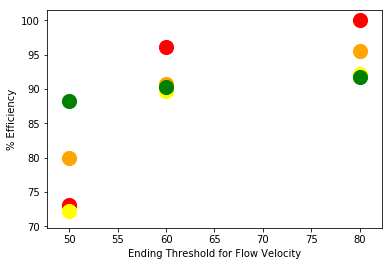

In [21]:
plt.scatter([50,60,80],[tresh50[0],thresh60[0],thresh80[0]],color="red",s=200)
plt.scatter([50,60,80],[tresh50[1],thresh60[1],thresh80[1]],color="orange",s=200)
plt.scatter([50,60,80],[tresh50[2],thresh60[2],thresh80[2]],color="yellow",s=200)
plt.scatter([50,60,80],[tresh50[3],thresh60[3],thresh80[3]],color="green",s=200)

plt.xlabel("Ending Threshold for Flow Velocity")
plt.ylabel("% Efficiency")

Text(0, 0.5, '% Efficiency')

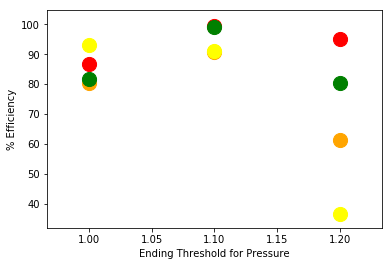

In [22]:
plt.scatter([1,1.1,1.2],[thresh1[0],thresh1_1[0],thresh1_2[0]],color="red",s=200)
plt.scatter([1,1.1,1.2],[thresh1[1],thresh1_1[1],thresh1_2[1]],color="orange",s=200)
plt.scatter([1,1.1,1.2],[thresh1[2],thresh1_1[2],thresh1_2[2]],color="yellow",s=200)
plt.scatter([1,1.1,1.2],[thresh1[3],thresh1_1[3],thresh1_2[3]],color="green",s=200)

plt.xlabel("Ending Threshold for Pressure")
plt.ylabel("% Efficiency")